# Function for Plotting

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from opfunu import cec_based
from ipywidgets import interact

In [2]:
def Plot_Min50Max(Dataset_Results,Y_Scale='linear'):
    fig , axes = plt.subplots(subplot_kw={'yscale':Y_Scale})

    plot = sns.scatterplot(Dataset_Results.describe().loc[['min','50%','max']].T,ax=axes)
    
    plot.set_title(Dataset_Results.__name__)
    plot.set_xlabel('Generation')
    plot.set_ylabel('Function Value')

In [3]:
def Plot_Generation_FunctionValues(Dataset_Results,Y_Scale='linear'):
    fig , axes = plt.subplots(figsize=(10,6),subplot_kw={'yscale':Y_Scale})

    for generation in Dataset_Results.columns:
        sns.scatterplot(x=generation,y=Dataset_Results[generation],color='red',alpha=0.005,ax=axes)
        
    axes.set_title(Dataset_Results.__name__)
    axes.set_xlabel('Generation')
    axes.set_ylabel('Function Value')

In [4]:
def InteractivePlot(Dataset_Results,X_Scale='linear'):

    def PlotFunctionValue(generation):
        fig , axes = plt.subplots(subplot_kw={'xscale':X_Scale})

        sns.histplot(x=Dataset_Results[generation],bins=50,color='gray',ax=axes)
        axes.axvline(Dataset_Results[generation].mean(),ls=':',color='red',label='Mean')
        axes.axvline(Dataset_Results[generation].median(),ls=':',color='blue',label='Median')

        axes.set_title(Dataset_Results.__name__)
        axes.set_xlabel('Function Value')
        fig.legend()

    interact(PlotFunctionValue,generation=(0,len(Dataset_Results.columns)-1,1))

# Time Execution

In [135]:
TimeExecution = pd.read_csv('./Dim_2/TimeExecution_Results.csv',index_col=0)

In [136]:
TimeExecution # Time in seconds

Base  RandomSample  Agglomerative  RandomParameters
F1   12.146414     18.868851       9.645253          9.153826
F2    9.860910     17.219354      11.541068         11.180574
F3   13.242429     20.453842      13.246447         12.905626
F4   11.343526     18.102936      11.492209         11.680597
F5    9.559351     15.580622      10.078485          9.434922
F6   16.615558     25.729958      18.791724         17.767607
F7   34.656600     39.287127      32.476375         31.886522
F8   19.373604     25.571104      18.655575         17.908729
F9   28.447329     35.343001      28.649424         27.512666
F20  40.467459     47.631056      41.488745         41.404047
F21  54.930771     62.064837      55.985522         55.769464
F22  65.994904     73.375263      67.264355         65.584519
F23  50.147516     59.449775      50.412275         50.123899
F24  59.528865     69.403730      60.601852         59.327540
F25  88.561666     97.619904      90.576211         88.830409
F26  93.828094    101.397078      94.167488         93.323910
F27  84.254286     90.306553      83.541613         83.107019

In [137]:
TimeExecution.T.describe().loc[['mean','std','50%']]

F1         F2         F3         F4         F5         F6  \
mean  12.453586  12.450477  14.962086  13.154817  11.163345  19.726212   
std    4.473072   3.260252   3.664653   3.301628   2.958012   4.100021   
50%   10.895833  11.360821  13.244438  11.586403   9.818918  18.279665   

             F7         F8         F9        F20        F21       F22  \
mean  34.576656  20.377253  29.988105  42.747827  57.187649  68.05476   
std    3.358717   3.513838   3.604107   3.288213   3.283130   3.61836   
50%   33.566487  19.014589  28.548377  41.446396  55.877493  66.62963   

            F23        F24        F25        F26        F27  
mean  52.533366  62.215497  91.397048  95.679142  85.302368  
std    4.612792   4.824688   4.243612   3.827679   3.369479  
50%   50.279896  60.065358  89.703310  93.997791  83.897949

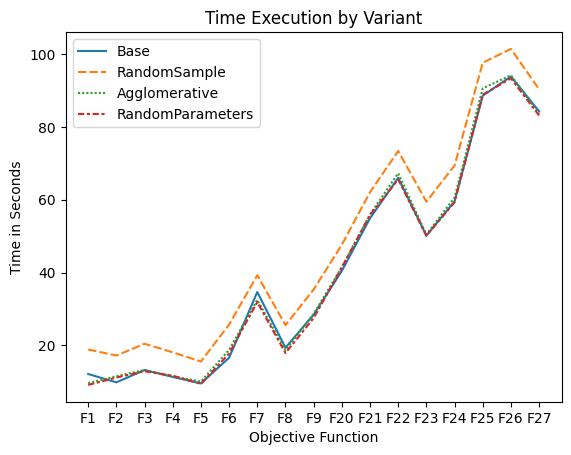

In [149]:
plot = sns.lineplot(data=TimeExecution)
plot.set_title('Time Execution by Variant')
plot.set_xlabel('Objective Function')
plot.set_ylabel('Time in Seconds');

In [154]:
TimeExecution[['Base','Agglomerative','RandomParameters']].T.describe().loc[['mean','std','50%']]

F1         F2         F3         F4        F5         F6  \
mean  10.315164  10.860851  13.131501  11.505444  9.690919  17.724963   
std    1.604831   0.884534   0.195624   0.168925  0.341359   1.088709   
50%    9.645253  11.180574  13.242429  11.492209  9.559351  17.767607   

             F7         F8         F9        F20        F21        F22  \
mean  33.006499  18.645969  28.203140  41.120084  55.561919  66.281260   
std    1.459146   0.732484   0.606446   0.566774   0.557164   0.875763   
50%   32.476375  18.655575  28.447329  41.404047  55.769464  65.994904   

            F23        F24        F25        F26        F27  
mean  50.227897  59.819419  89.322762  93.773164  83.634306  
std    0.160112   0.685043   1.093804   0.424463   0.579223  
50%   50.147516  59.528865  88.830409  93.828094  83.541613

# Function 1

In [86]:
NumberFunction = '1'
Scale = 'log'

## Function Plot

In [46]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

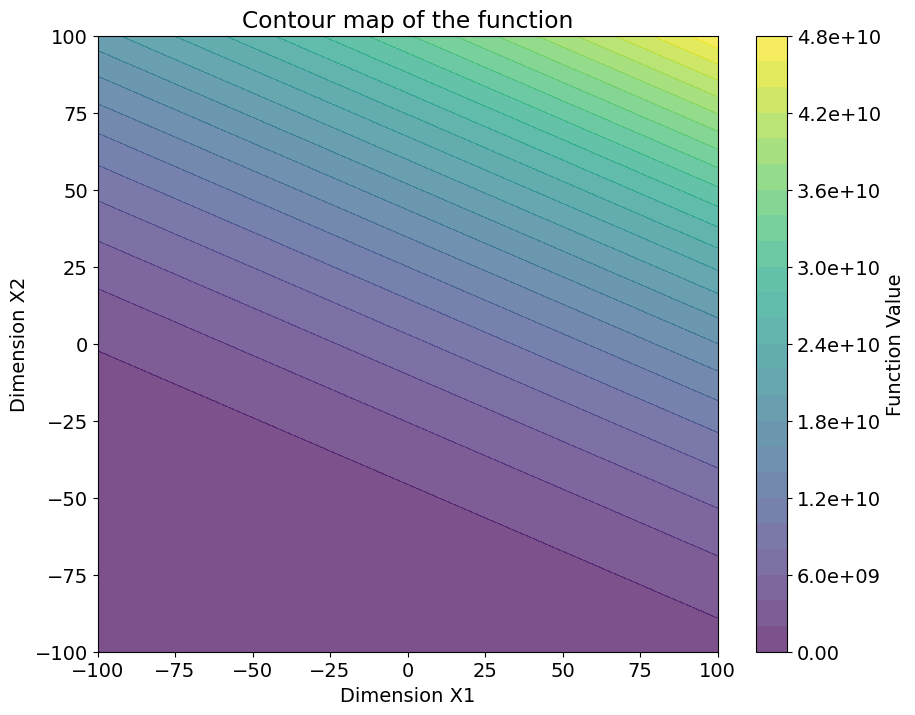

In [47]:
ObjectiveFunction(ndim=2).plot_2d(500)

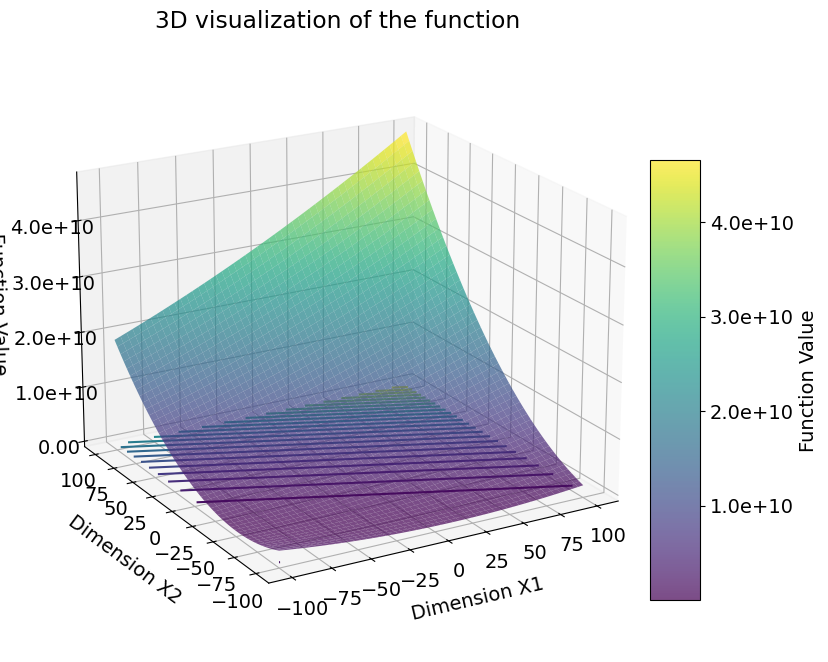

In [48]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [49]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0             1              2              3              4   \
0  2.835441e+04  2.835441e+04   28354.412664   28354.412664   28354.412664   
1  1.098963e+06  1.098963e+06  279347.815894  279347.815894  279347.815894   
2  4.851165e+06  3.775833e+06  307175.990121  307175.990121   23712.522084   
3  1.056089e+07  6.615904e+04   66159.036574   66159.036574   66159.036574   
4  7.857425e+05  7.857425e+05  439955.686731  270339.653106   47255.643937   
5  3.677853e+06  1.766051e+05   36245.578778   36245.578778   31288.096254   
6  1.826847e+07  2.940700e+06  151753.334183  151753.334183  151753.334183   
7  9.552451e+05  9.552451e+05  912871.954339  107603.287764  107603.287764   
8  3.822357e+06  7.287502e+05   52862.384686   52862.384686   52862.384686   
9  7.174827e+04  7.174827e+04   71748.265695    2238.470943    2238.470943   

              5              6             7             8             9   \
0   28354.412664   28354.412664  28354.412664  28354.412664  20405.393516   
1   25260.877690    6500.320196   2589.843841   2589.843841   2589.843841   
2   23712.522084   15289.953775   7182.961151   7182.961151   7182.961151   
3   21287.621140   21287.621140  13851.664809  13851.664809   1070.954232   
4   47255.643937   22921.408654  22921.408654  14840.811784  14840.811784   
5   14222.395053   14222.395053  14222.395053    287.751216    287.751216   
6    1420.543355    1420.543355   1420.543355   1420.543355   1420.543355   
7  107603.287764  107603.287764   4916.184049   4916.184049    162.994641   
8   52862.384686   13061.192417   4503.916029    292.318563    292.318563   
9    2238.470943    2238.470943   2238.470943   2238.470943   2238.470943   

   ...          41          42          43          44          45  \
0  ...  100.501319  100.498532  100.498532  100.498532  100.498532   
1  ...  100.721552  100.721552  100.028936  100.028936  100.028936   
2  ...  101.274497  101.274497  100.025546  100.025546  100.025546   
3  ...  100.945955  100.163606  100.163606  100.163606  100.163606   
4  ...  101.342129  101.342129  101.342129  101.342129  101.342129   
5  ...  100.065880  100.065880  100.065880  100.065880  100.065880   
6  ...  100.109798  100.109798  100.017499  100.017499  100.017499   
7  ...  100.359593  100.359593  100.359593  100.359593  100.341864   
8  ...  100.267101  100.267101  100.026052  100.026052  100.026052   
9  ...  100.271416  100.271416  100.200829  100.171120  100.171120   

           46          47          48          49          50  
0  100.498532  100.498532  100.449390  100.002744  100.002744  
1  100.028936  100.028936  100.028936  100.028936  100.023788  
2  100.025546  100.025546  100.025546  100.025546  100.006560  
3  100.163606  100.057069  100.057069  100.057069  100.057069  
4  101.342129  101.342129  100.358332  100.358332  100.358332  
5  100.054269  100.054269  100.054269  100.054269  100.054269  
6  100.017499  100.017499  100.017499  100.017499  100.017499  
7  100.324152  100.324152  100.020609  100.020609  100.020609  
8  100.026052  100.026052  100.026052  100.026052  100.026052  
9  100.009203  100.002241  100.002241  100.002241  100.002241  

[10 rows x 51 columns]

In [50]:
Base.describe()

0             1             2             3             4   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   5.189068e+06  1.141162e+06  3.497970e+05  1.384104e+05  5.339561e+04   
std    1.224550e+07  2.403553e+06  8.671743e+05  3.366315e+05  1.027806e+05   
min    1.799928e+02  1.799928e+02  1.799928e+02  1.013494e+02  1.013494e+02   
25%    2.665121e+05  4.725185e+04  1.938853e+04  9.770362e+03  5.917380e+03   
50%    1.382932e+06  2.746596e+05  7.921784e+04  3.726145e+04  2.002307e+04   
75%    5.075581e+06  1.022496e+06  2.977551e+05  1.258733e+05  5.220373e+04   
max    1.761925e+08  3.186959e+07  1.305460e+07  4.447999e+06  1.253203e+06   

                  5              6              7             8   \
count    1000.000000    1000.000000    1000.000000   1000.000000   
mean    27979.681975   15761.101280   10903.658050   7226.273893   
std     48419.058413   21784.830386   15322.909298   8415.943158   
min       101.349448     101.349448     101.349448    101.349448   
25%      4495.299109    3078.508493    2237.403404   1635.227158   
50%     12159.608627    7999.619352    5860.885236   4349.301832   
75%     31435.419887   20965.995899   13857.893055   9513.838471   
max    737818.692064  178000.231728  178000.231728  67218.510562   

                 9   ...           41           42           43           44  \
count   1000.000000  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean    5522.452030  ...   100.760824   100.549469   100.400898   100.294576   
std     6370.943009  ...     1.114730     0.821291     0.620256     0.410917   
min      101.349448  ...   100.000003   100.000003   100.000003   100.000003   
25%     1275.296232  ...   100.147097   100.103484   100.073402   100.055236   
50%     3452.928138  ...   100.391698   100.291294   100.213915   100.156931   
75%     7355.069389  ...   100.933273   100.681559   100.506691   100.368130   
max    53692.625664  ...   111.725655   111.725655   111.260461   105.195645   

                45           46           47           48           49  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    100.221029   100.172378   100.132215   100.098296   100.073515   
std       0.281130     0.237837     0.195504     0.157537     0.126043   
min     100.000003   100.000003   100.000003   100.000003   100.000003   
25%     100.043875   100.033280   100.023447   100.019066   100.013829   
50%     100.119378   100.090482   100.062193   100.046607   100.035145   
75%     100.279474   100.215147   100.157578   100.112439   100.081716   
max     102.279871   102.216595   102.216595   102.216595   102.216595   

                50  
count  1000.000000  
mean    100.053222  
std       0.084245  
min     100.000003  
25%     100.010396  
50%     100.025500  
75%     100.060623  
max     100.939305  

[8 rows x 51 columns]

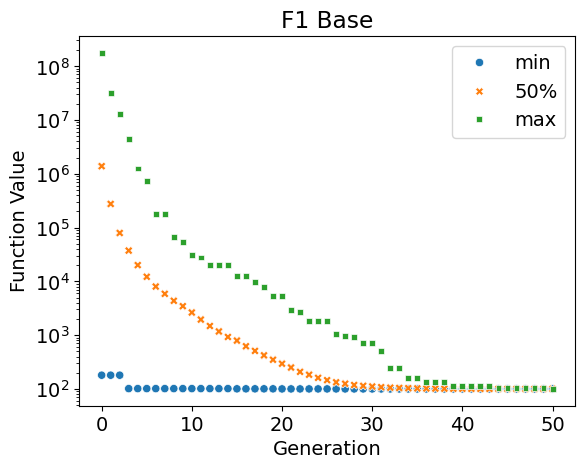

In [71]:
Plot_Min50Max(Base,Scale)

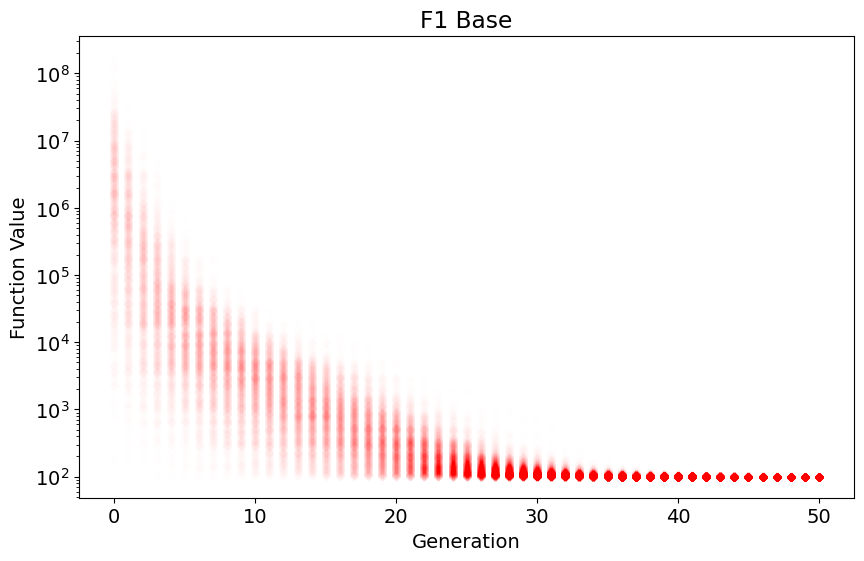

In [ ]:
Plot_Generation_FunctionValues(Base,Scale)

In [79]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [54]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0             1              2              3             4    \
0  1.841936e+05  1.841936e+05  184193.596958  184193.596958  37821.798604   
1  1.127296e+06  3.045359e+05  304535.894049    5643.027179   5643.027179   
2  5.298753e+07  2.441414e+04   17922.028015   17922.028015  17922.028015   
3  7.068635e+06  1.214525e+06   65573.544979   14761.819079  14761.819079   
4  2.411039e+04  2.411039e+04   24110.390924   24110.390924  24110.390924   
5  1.182266e+06  1.182266e+06     973.554011     973.554011    973.554011   
6  1.090599e+07  2.499368e+05  249936.793493   70476.942525  70476.942525   
7  2.903265e+06  1.515573e+06   62036.738581   62036.738581  28454.116147   
8  3.511333e+05  9.385543e+03    9385.542769    9385.542769   9385.542769   
9  9.787375e+05  9.787375e+05  488847.174226  488847.174226  33212.941575   

            5             6             7             8             9    ...  \
0  15536.405889  15536.405889  15536.405889  10858.992494  10858.992494  ...   
1   5643.027179   5643.027179   5643.027179   5643.027179   5643.027179  ...   
2  17922.028015  17922.028015  17922.028015  17922.028015   7318.205486  ...   
3  14761.819079   6153.336613   6153.336613   3803.542234   3803.542234  ...   
4   7651.881272   7651.881272   7651.881272   7651.881272   7651.881272  ...   
5    973.554011    973.554011    973.554011    973.554011    973.554011  ...   
6  70476.942525   9788.996145   4956.218312   4956.218312   4956.218312  ...   
7  28454.116147  28454.116147   5170.259127   5170.259127   5170.259127  ...   
8   9385.542769   9260.419873   9260.419873   9260.419873   9260.419873  ...   
9   5210.669123   5210.669123   5210.669123   5210.669123   2755.094323  ...   

   141  142  143  144  145  146  147  148  149  150  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 151 columns]

In [55]:
RandomSample.describe()

0             1             2             3             4    \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   4.818902e+06  1.207129e+06  3.563671e+05  1.266031e+05  5.442277e+04   
std    9.454341e+06  2.516925e+06  9.003931e+05  2.621882e+05  1.126985e+05   
min    1.579990e+02  1.579990e+02  1.579990e+02  1.579990e+02  1.579990e+02   
25%    2.367749e+05  4.760471e+04  1.883282e+04  8.439565e+03  5.123330e+03   
50%    1.386844e+06  3.050994e+05  7.200956e+04  3.399707e+04  1.871781e+04   
75%    5.512024e+06  1.106136e+06  3.469998e+05  1.142622e+05  4.913419e+04   
max    9.295156e+07  2.667091e+07  1.702352e+07  2.491278e+06  1.080413e+06   

                 5              6              7              8    \
count    1000.000000    1000.000000    1000.000000    1000.000000   
mean    27575.326604   15586.054922   10130.478164    6803.737154   
std     52477.074332   25732.109556   15374.534701    9209.443296   
min       114.776539     111.791753     104.421939     104.421939   
25%      3664.057137    2717.129340    2163.795999    1577.698643   
50%     11231.942307    7481.230113    5292.039644    3847.908259   
75%     29147.844694   18402.800148   12314.658682    8396.443809   
max    618912.307311  381763.931250  163667.702685  118087.561328   

                9    ...           141           142           143  \
count   1000.000000  ...  2.900000e+01  2.900000e+01  2.900000e+01   
mean    4970.762489  ...  1.000000e+02  1.000000e+02  1.000000e+02   
std     5847.701357  ...  3.912996e-11  3.919239e-11  3.743328e-11   
min      104.421939  ...  1.000000e+02  1.000000e+02  1.000000e+02   
25%     1320.450004  ...  1.000000e+02  1.000000e+02  1.000000e+02   
50%     2973.615846  ...  1.000000e+02  1.000000e+02  1.000000e+02   
75%     6382.680569  ...  1.000000e+02  1.000000e+02  1.000000e+02   
max    59808.646542  ...  1.000000e+02  1.000000e+02  1.000000e+02   

                144           145           146           147           148  \
count  2.900000e+01  2.900000e+01  1.200000e+01  1.200000e+01  1.200000e+01   
mean   1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
std    3.435944e-11  3.440298e-11  5.245370e-11  1.936688e-11  1.937701e-11   
min    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
25%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
50%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
75%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
max    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   

                149           150  
count  1.200000e+01  1.200000e+01  
mean   1.000000e+02  1.000000e+02  
std    8.041429e-12  8.070853e-12  
min    1.000000e+02  1.000000e+02  
25%    1.000000e+02  1.000000e+02  
50%    1.000000e+02  1.000000e+02  
75%    1.000000e+02  1.000000e+02  
max    1.000000e+02  1.000000e+02  

[8 rows x 151 columns]

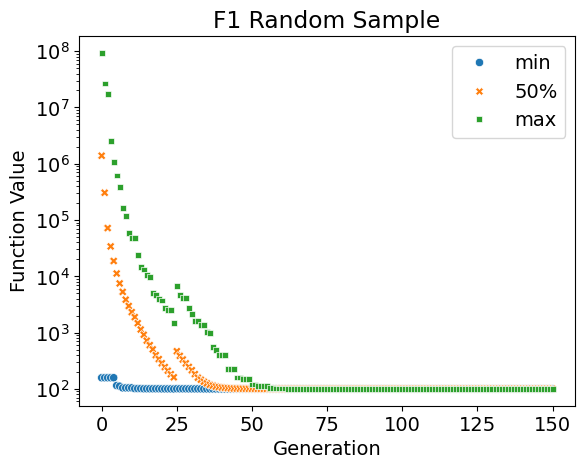

In [81]:
Plot_Min50Max(RandomSample,Scale)

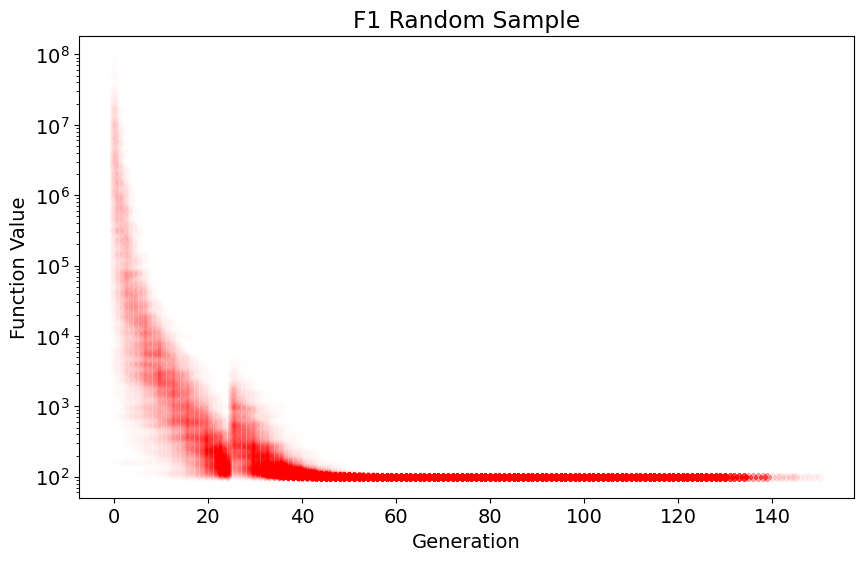

In [ ]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [83]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=75, description='generation', max=150), Output()), _dom_classes=('widget…

## Agglomerative

In [59]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0             1              2              3             4    \
0  1.583740e+04  1.583740e+04   15837.404473   15837.404473  15837.404473   
1  2.698218e+07  9.627231e+04   96272.312126   84803.657015  22130.792701   
2  4.637851e+06  1.892662e+06   26861.355845   26861.355845   4913.086027   
3  3.506393e+04  3.506393e+04   35063.930534   35063.930534  35063.930534   
4  9.681505e+03  9.681505e+03    9681.505426    9681.505426   9681.505426   
5  1.843905e+06  1.843905e+06  341579.765431  141889.786276   2451.908239   
6  3.389133e+05  3.389133e+05  338913.265782  338913.265782   9550.460826   
7  5.955877e+05  5.224804e+02     522.480369     522.480369    522.480369   
8  9.679684e+04  9.679684e+04   27881.525830   27881.525830  26468.746232   
9  1.284440e+06  4.138879e+05  239984.469546     990.236329    990.236329   

            5            6            7            8            9    ...  \
0  15837.404473  9223.784905  9223.784905  9223.784905  9223.784905  ...   
1  22130.792701  3365.337335  3365.337335  3365.337335  3365.337335  ...   
2   4913.086027  4913.086027  4913.086027  4913.086027  4913.086027  ...   
3  35063.930534   555.173211   555.173211   555.173211   555.173211  ...   
4   9681.505426  9681.505426  9681.505426  9681.505426  9681.505426  ...   
5   2451.908239  2451.908239  2451.908239  2451.908239  2451.908239  ...   
6   9550.460826  9550.460826  9550.460826  9550.460826  9550.460826  ...   
7    522.480369   522.480369   522.480369   522.480369   522.480369  ...   
8  26468.746232  5551.480744  1585.561041  1585.561041   168.035082  ...   
9    990.236329   990.236329   990.236329   990.236329   990.236329  ...   

     184    185    186    187    188    189    190    191    192    193  
0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
1  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
2  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
3  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
4  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
5  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
6  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
7  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
8  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
9  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  

[10 rows x 194 columns]

In [60]:
Agglomerative.describe()

0             1             2             3             4    \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   5.560433e+06  1.112491e+06  3.318422e+05  1.316292e+05  6.036668e+04   
std    1.197230e+07  2.714844e+06  8.250031e+05  3.016065e+05  1.336991e+05   
min    2.576526e+02  2.054521e+02  2.054521e+02  1.496875e+02  1.297290e+02   
25%    1.916927e+05  4.111146e+04  1.798674e+04  9.480178e+03  5.928858e+03   
50%    1.253257e+06  2.428525e+05  7.732746e+04  3.626244e+04  1.942732e+04   
75%    5.462529e+06  9.680267e+05  2.965696e+05  1.191005e+05  5.491460e+04   
max    1.783439e+08  4.205792e+07  1.314588e+07  4.535842e+06  2.035967e+06   

                5              6              7             8             9    \
count  1.000000e+03    1000.000000    1000.000000   1000.000000   1000.000000   
mean   2.924082e+04   16294.390054   10516.574822   6817.060259   5093.146230   
std    6.840989e+04   26839.741387   16307.550359   8453.329146   6102.488787   
min    1.297290e+02     129.728963     106.148557    106.148557    100.294422   
25%    4.267428e+03    3075.538547    2199.995017   1593.947956   1248.489177   
50%    1.149027e+04    7320.332756    5325.809412   3944.568870   3209.456304   
75%    3.061946e+04   18497.043428   12222.828795   8524.648763   6378.888596   
max    1.440592e+06  254260.698649  204600.675951  61028.548186  56502.393483   

       ...           184           185           186           187  \
count  ...  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
std    ...  6.088226e-08  6.088025e-08  6.087918e-08  6.086658e-08   
min    ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
25%    ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
50%    ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
75%    ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
max    ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   

                188           189           190           191           192  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
std    6.079226e-08  6.031374e-08  6.030954e-08  6.030377e-08  6.030317e-08   
min    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
25%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
50%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
75%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
max    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   

                193  
count  1.000000e+03  
mean   1.000000e+02  
std    6.030317e-08  
min    1.000000e+02  
25%    1.000000e+02  
50%    1.000000e+02  
75%    1.000000e+02  
max    1.000000e+02  

[8 rows x 194 columns]

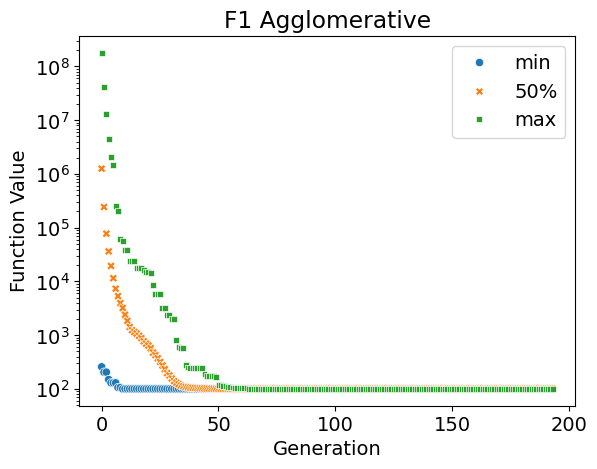

In [87]:
Plot_Min50Max(Agglomerative,Scale)

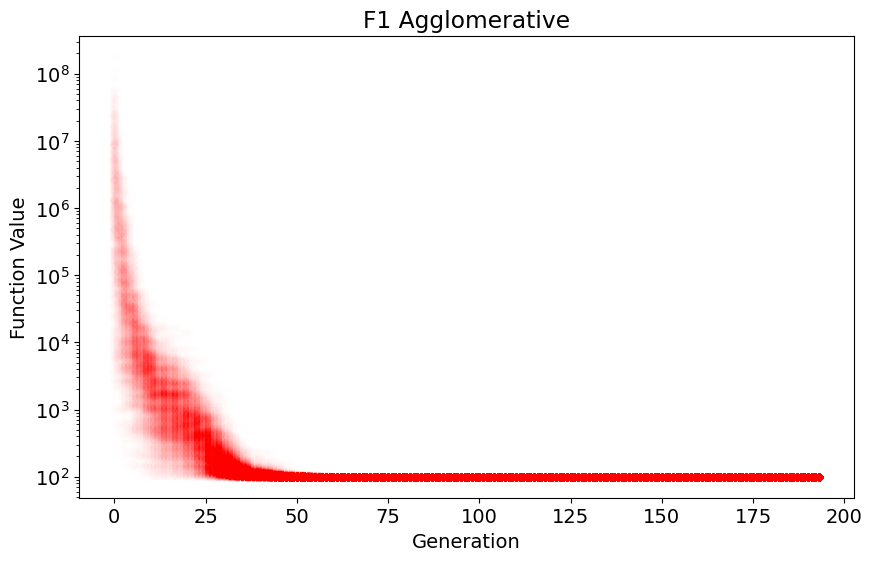

In [88]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [89]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [64]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0             1             2              3              4   \
0  3.626186e+05  3.626186e+05  3.626186e+05   13324.905050   13324.905050   
1  1.775978e+06  7.082250e+05  3.841998e+05  293589.445589  112997.517448   
2  7.772451e+06  1.335699e+06  1.335699e+06  383352.920054   25394.960261   
3  9.139212e+06  2.959885e+05  2.959885e+05  279291.924050  133564.995201   
4  1.542151e+05  1.542151e+05  1.280929e+05   17335.861345   17335.861345   
5  5.304240e+05  5.304240e+05  5.304240e+05  530424.047594    4056.347511   
6  1.489702e+08  1.579516e+06  6.998972e+05  210690.255509  146212.415145   
7  6.530406e+06  1.247134e+06  1.774648e+05   44489.964996   21908.982055   
8  1.448355e+05  1.448355e+05  1.070989e+04   10709.889461   10709.889461   
9  1.639684e+06  4.092583e+05  1.824543e+05   30170.312296    5401.995700   

              5              6             7             8            9   ...  \
0   13324.905050   13324.905050    158.418044    158.418044   158.418044  ...   
1  112997.517448  112997.517448   9105.739943   9105.739943  9105.739943  ...   
2   25394.960261   25394.960261  25394.960261    906.804848   906.804848  ...   
3  113005.832957    5310.939826   3788.647402   3788.647402  3788.647402  ...   
4    6105.375718    6105.375718   6105.375718   6105.375718   528.406782  ...   
5    4056.347511    4056.347511   3094.777332   3094.777332  1960.679146  ...   
6   63074.917385   23765.293101  12920.850529  12920.850529  1847.350057  ...   
7   21908.982055   21908.982055   7248.502284   7248.502284  7248.502284  ...   
8     718.465850     718.465850    718.465850    718.465850   718.465850  ...   
9    5401.995700    5401.995700   5401.995700   5401.995700  5401.995700  ...   

           41          42          43          44          45          46  \
0  100.063898  100.063898  100.063898  100.063898  100.063898  100.063898   
1  101.319740  101.319740  101.319740  100.017909  100.017909  100.017909   
2  100.029700  100.029700  100.029700  100.029700  100.029700  100.029700   
3  100.342628  100.342628  100.342628  100.197714  100.197714  100.115233   
4  100.067928  100.067928  100.067928  100.067928  100.067928  100.067928   
5  100.487082  100.487082  100.487082  100.112030  100.112030  100.032768   
6  100.693939  100.693939  100.244324  100.186404  100.186404  100.186404   
7  100.193983  100.193983  100.142718  100.142718  100.142718  100.142718   
8  102.253794  102.253794  100.486136  100.486136  100.486136  100.290829   
9  100.325068  100.325068  100.325068  100.325068  100.325068  100.325068   

           47          48          49          50  
0  100.063898  100.063898  100.063898  100.002771  
1  100.017909  100.017909  100.017909  100.017909  
2  100.029700  100.029700  100.029700  100.029700  
3  100.115233  100.047889  100.032984  100.032984  
4  100.067928  100.067928  100.040887  100.040887  
5  100.032768  100.032768  100.020950  100.020950  
6  100.186404  100.005387  100.005387  100.000578  
7  100.047531  100.031828  100.001917  100.001917  
8  100.290829  100.033104  100.033104  100.033104  
9  100.325068  100.154910  100.154910  100.154910  

[10 rows x 51 columns]

In [65]:
RandomParameters.describe()

0             1             2             3             4   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   6.095314e+06  1.145597e+06  3.514265e+05  1.324419e+05  5.575258e+04   
std    1.689491e+07  2.459156e+06  8.722853e+05  3.581917e+05  1.178621e+05   
min    2.051694e+02  2.051694e+02  1.771074e+02  1.064507e+02  1.064507e+02   
25%    2.426560e+05  5.214009e+04  2.102353e+04  1.107187e+04  6.321247e+03   
50%    1.395678e+06  2.519473e+05  8.213265e+04  3.663180e+04  1.824014e+04   
75%    5.212767e+06  1.051536e+06  2.945088e+05  1.099771e+05  5.110603e+04   
max    3.373243e+08  2.563567e+07  1.129099e+07  7.565004e+06  1.421917e+06   

                 5              6              7              8   \
count  1.000000e+03    1000.000000    1000.000000    1000.000000   
mean   2.997011e+04   16276.461174   10169.087550    7190.674348   
std    6.770440e+04   26178.993532   14325.898467   10136.159364   
min    1.064507e+02     106.450660     106.450660     106.450660   
25%    4.048813e+03    2860.207361    2024.389107    1637.119210   
50%    1.160590e+04    7545.093639    5401.697803    3835.229795   
75%    3.100719e+04   18926.220434   12251.785272    9006.946580   
max    1.357085e+06  272108.868157  142954.016198  109071.211437   

                 9   ...           41           42           43           44  \
count   1000.000000  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean    5089.193855  ...   100.732722   100.540043   100.422527   100.309279   
std     6040.663704  ...     1.018327     0.710983     0.618093     0.435400   
min      101.252697  ...   100.000132   100.000132   100.000132   100.000132   
25%     1251.790610  ...   100.139470   100.102565   100.079506   100.060741   
50%     3040.234228  ...   100.379771   100.286592   100.221752   100.149643   
75%     6702.948188  ...   100.921856   100.688427   100.503218   100.373818   
max    55002.677822  ...   113.143701   108.032714   108.032714   104.508560   

                45           46           47           48           49  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    100.235215   100.167353   100.129210   100.096254   100.070958   
std       0.347003     0.233937     0.183163     0.140022     0.104954   
min     100.000132   100.000132   100.000132   100.000132   100.000132   
25%     100.046311   100.036014   100.026387   100.020763   100.014343   
50%     100.115667   100.086155   100.066194   100.047775   100.036167   
75%     100.279132   100.209796   100.160703   100.118525   100.083977   
max     104.508560   102.262728   101.867871   101.562884   101.227662   

                50  
count  1000.000000  
mean    100.053951  
std       0.087606  
min     100.000037  
25%     100.010005  
50%     100.026041  
75%     100.059358  
max     101.123598  

[8 rows x 51 columns]

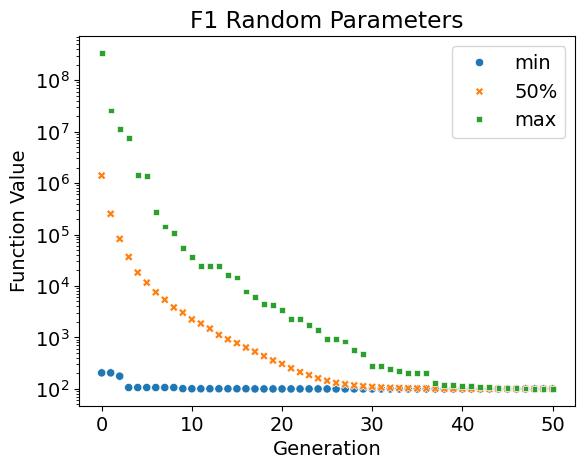

In [90]:
Plot_Min50Max(RandomParameters,Scale)

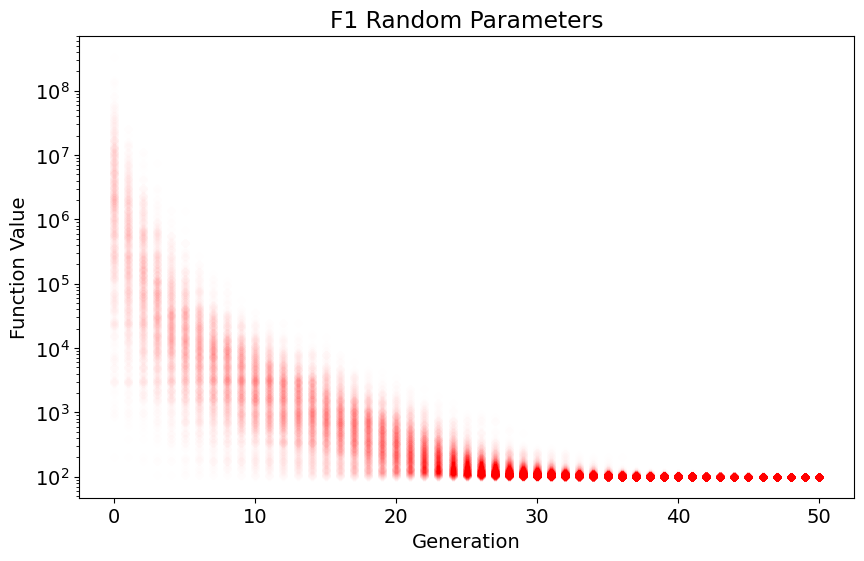

In [91]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [92]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 2

In [54]:
NumberFunction = '2'
Scale = 'log'

## Function Plot

In [6]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

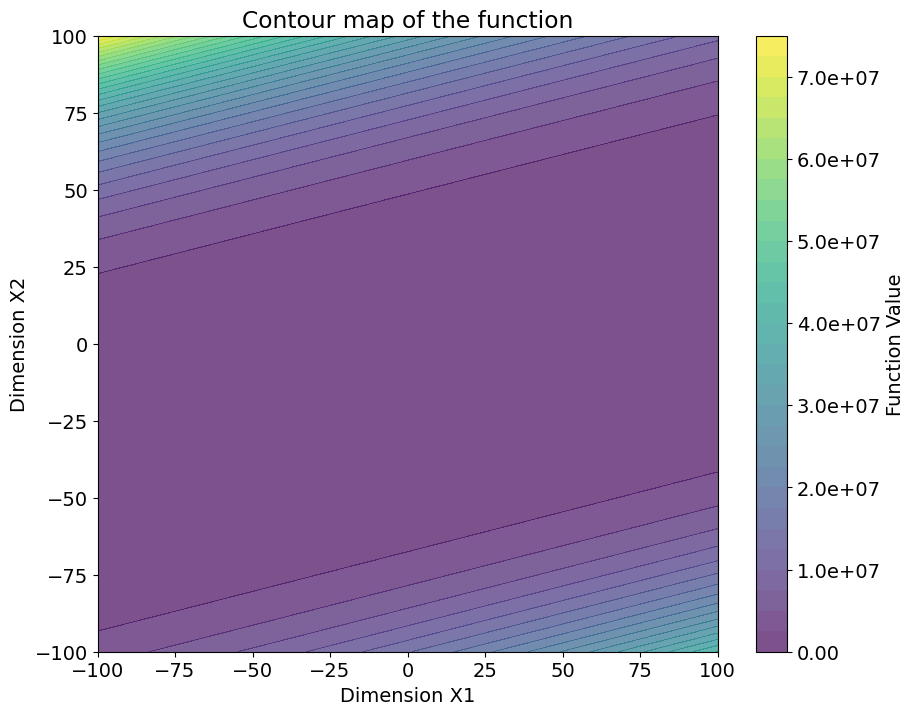

In [7]:
ObjectiveFunction(ndim=2).plot_2d(500)

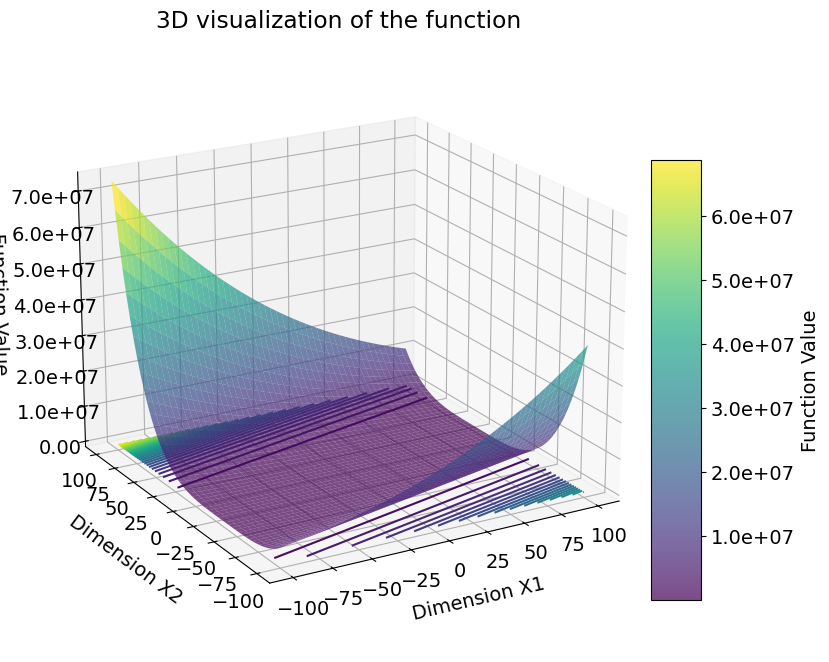

In [8]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [21]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0           1           2           3           4           5   \
0   427.344608  249.633299  249.633299  249.633299  244.677780  239.204583   
1   556.389308  441.842259  441.842259  200.687122  200.687122  200.687122   
2  1818.773683  301.729933  215.097702  215.097702  215.097702  215.097702   
3   331.878752  209.486873  209.486873  209.486873  209.486873  209.486873   
4  2669.744799  202.864380  202.864380  202.864380  202.864380  202.864380   
5   208.594103  208.594103  208.594103  208.594103  208.594103  208.594103   
6   914.351619  258.165515  258.165515  215.627807  215.627807  215.627807   
7   434.024200  226.303225  226.303225  226.303225  226.303225  220.879494   
8   225.931118  225.931118  225.931118  225.931118  225.931118  225.931118   
9  1802.839228  915.314567  312.882594  225.509711  225.509711  225.509711   

           6           7           8           9   ...          41     42  \
0  239.204583  207.272308  204.185371  204.185371  ...  200.000000  200.0   
1  200.687122  200.687122  200.687122  200.687122  ...  200.000000  200.0   
2  204.625983  204.625983  201.944515  201.944515  ...  200.000000  200.0   
3  200.707378  200.707378  200.707378  200.707378  ...  200.000000  200.0   
4  202.864380  202.864380  202.864380  201.351511  ...  200.000000  200.0   
5  208.594103  204.616693  204.616693  202.892380  ...  200.000001  200.0   
6  205.463058  205.463058  202.988929  202.988929  ...  200.000000  200.0   
7  220.879494  220.879494  214.356698  206.486232  ...  200.000001  200.0   
8  222.235226  208.020433  208.020433  201.709023  ...  200.000000  200.0   
9  205.831983  200.994858  200.994858  200.076540  ...  200.000000  200.0   

      43     44     45     46     47     48     49     50  
0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
1  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
2  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
3  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
4  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
5  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
6  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
7  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
8  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
9  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  

[10 rows x 51 columns]

In [22]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    644.404445   385.884993   298.585642   253.674657   231.256721   
std     568.503684   229.273070   121.381798    75.157595    41.396617   
min     200.043557   200.043557   200.043557   200.012617   200.003018   
25%     287.956068   239.457866   221.579735   209.459748   205.874110   
50%     459.652053   307.804890   256.274509   228.905619   216.462657   
75%     801.651138   441.941940   334.135547   266.836727   239.049750   
max    6293.823158  2100.292626  1332.429333  1188.577370   530.232184   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    219.319625   210.879325   206.764454   204.358915   202.723875  ...   
std      28.340248    14.582246     9.031252     6.328239     3.918862  ...   
min     200.003018   200.003018   200.003018   200.003018   200.003018  ...   
25%     203.834092   202.089072   201.233667   200.901686   200.583716  ...   
50%     209.670356   206.005360   204.026572   202.446514   201.411500  ...   
75%     223.084758   214.106008   208.456307   205.479119   203.556612  ...   
max     432.110379   318.169651   284.856911   274.934556   246.191054  ...   

                 41            42            43            44            45  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
std    2.482676e-07  1.226367e-07  6.086542e-08  4.095928e-08  2.531785e-08   
min    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
25%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
50%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
75%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
max    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   

                 46            47            48            49            50  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean   2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
std    1.382504e-08  7.244100e-09  4.103437e-09  2.396578e-09  1.490579e-09  
min    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
25%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
50%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
75%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
max    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  

[8 rows x 51 columns]

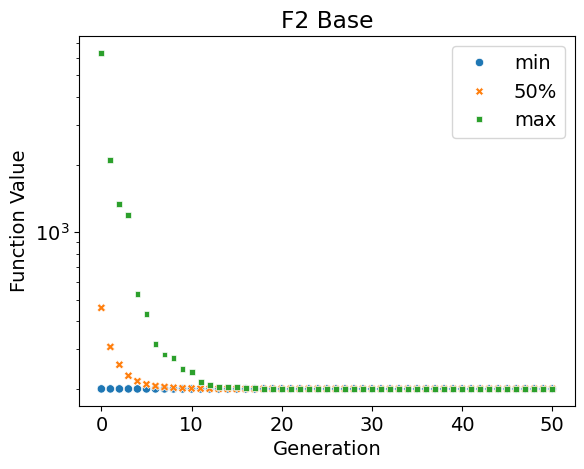

In [29]:
Plot_Min50Max(Base,Scale)

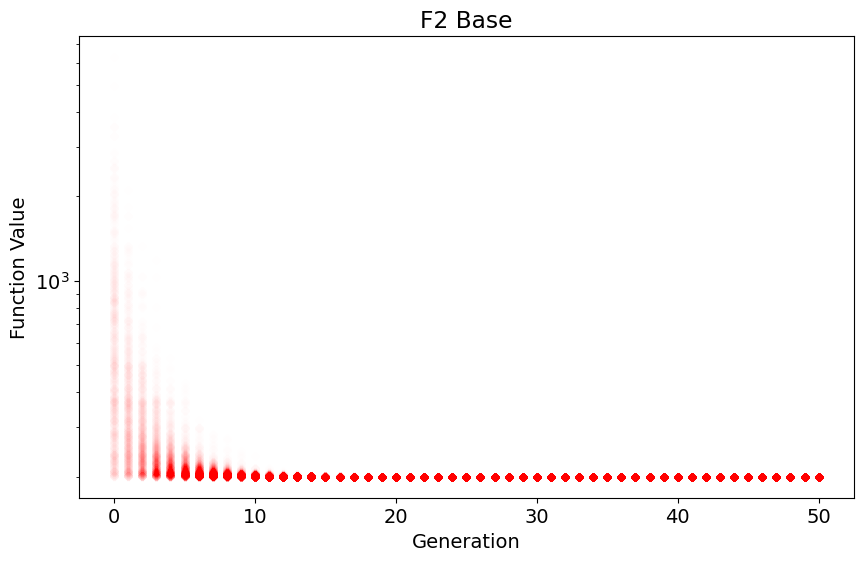

In [30]:
Plot_Generation_FunctionValues(Base,Scale)

In [31]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [32]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0           1           2           3           4           5    \
0   203.391980  203.391980  203.391980  203.391980  203.391980  203.391980   
1   485.475213  253.263482  249.988884  249.988884  211.314107  211.314107   
2   521.144381  211.981638  211.981638  211.981638  211.981638  201.007201   
3   203.835167  203.835167  200.099073  200.099073  200.099073  200.099073   
4  1167.652434  255.001085  255.001085  255.001085  255.001085  213.273744   
5   204.309650  204.309650  204.309650  204.309650  202.217256  202.217256   
6   238.709386  238.709386  238.709386  211.381844  211.381844  211.381844   
7   252.330168  242.700351  225.604559  225.604559  225.604559  225.604559   
8   311.356951  311.356951  311.356951  207.695473  207.695473  207.695473   
9   503.353480  357.549748  357.549748  227.830218  201.410212  201.410212   

          6           7           8           9    ...  130  131  132  133  \
0  203.391980  203.391980  203.391980  203.391980  ...  NaN  NaN  NaN  NaN   
1  211.314107  201.219835  200.036163  200.036163  ...  NaN  NaN  NaN  NaN   
2  201.007201  201.007201  201.007201  201.007201  ...  NaN  NaN  NaN  NaN   
3  200.099073  200.099073  200.099073  200.099073  ...  NaN  NaN  NaN  NaN   
4  213.273744  213.273744  213.273744  201.193929  ...  NaN  NaN  NaN  NaN   
5  202.217256  202.217256  202.217256  201.570970  ...  NaN  NaN  NaN  NaN   
6  211.381844  202.848632  202.848632  200.592630  ...  NaN  NaN  NaN  NaN   
7  225.604559  224.136691  211.209306  211.209306  ...  NaN  NaN  NaN  NaN   
8  206.132468  206.132468  202.453595  202.453595  ...  NaN  NaN  NaN  NaN   
9  201.410212  201.410212  201.410212  201.410212  ...  NaN  NaN  NaN  NaN   

   134  135  136  137  138  139  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 140 columns]

In [33]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    633.151242   367.263518   287.182611   248.343341   230.003194   
std     606.847482   226.673469   116.382230    66.297331    40.607901   
min     200.007518   200.007518   200.007518   200.007518   200.007518   
25%     267.952682   231.315559   216.969890   210.043576   206.185653   
50%     410.571856   284.811270   247.141960   226.800575   216.724054   
75%     753.946472   414.118037   310.147686   262.274544   239.841816   
max    5451.331278  2031.047089  1187.144600   951.233530   846.813140   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    218.529348   211.538965   207.086324   204.423033   202.779679  ...   
std      23.530216    15.370421     8.822241     5.457810     3.545225  ...   
min     200.007518   200.007518   200.007518   200.002217   200.002217  ...   
25%     203.793326   202.489736   201.616455   201.029619   200.680435  ...   
50%     209.844982   206.262952   204.076428   202.692974   201.751905  ...   
75%     223.657193   214.581200   209.256534   205.545957   203.627282  ...   
max     386.459682   352.590498   279.077977   247.601826   244.136611  ...   

         130    131    132    133    134    135    136    137    138    139  
count   95.0   28.0   28.0   28.0   28.0   13.0   13.0   13.0   13.0   13.0  
mean   200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
min    200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
25%    200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
50%    200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
75%    200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
max    200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  

[8 rows x 140 columns]

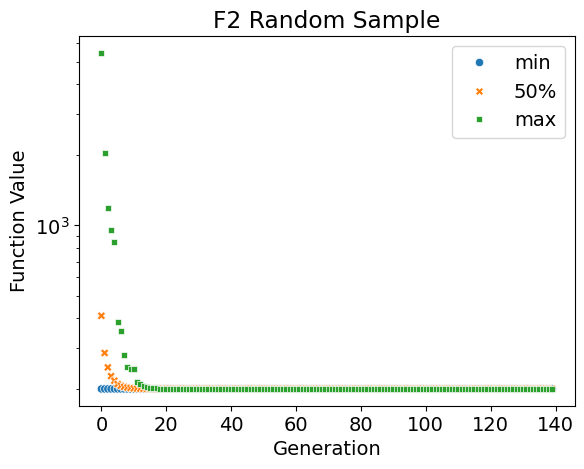

In [40]:
Plot_Min50Max(RandomSample,Scale)

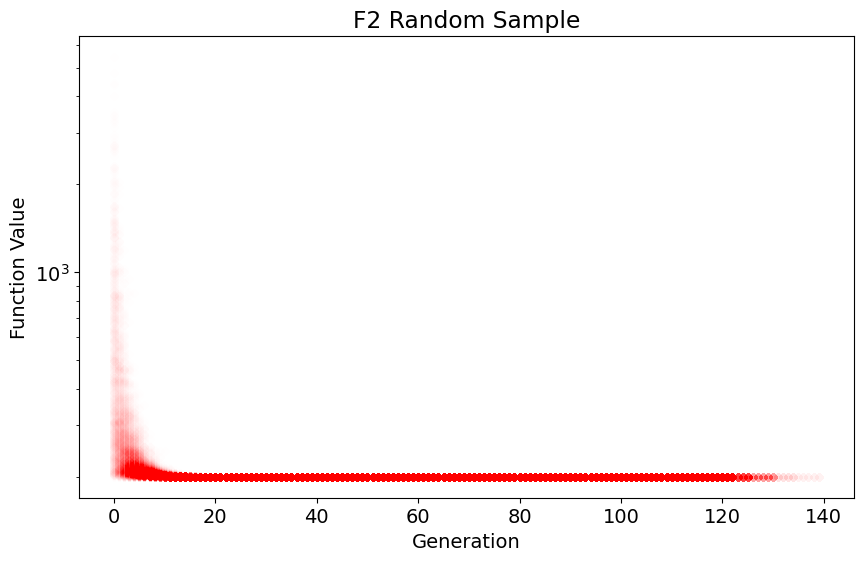

In [41]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [42]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=69, description='generation', max=139), Output()), _dom_classes=('widget…

## Agglomerative

In [43]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0           1           2           3           4           5    \
0   739.064251  204.977271  204.977271  204.977271  203.505752  203.505752   
1  1531.081124  219.954276  219.954276  219.954276  219.954276  219.954276   
2   522.539665  276.650489  276.650489  276.650489  276.650489  233.685684   
3  1881.229024  673.088816  673.088816  240.483517  240.483517  217.782749   
4   200.175622  200.175622  200.175622  200.175622  200.175622  200.175622   
5   257.446509  257.446509  205.265944  205.265944  205.265944  205.265944   
6  1131.618345  257.978009  257.978009  257.978009  206.284352  206.284352   
7   212.804640  206.893575  206.893575  206.893575  206.893575  206.893575   
8   228.082101  228.082101  204.906608  204.906608  204.906608  204.906608   
9   232.079769  227.675162  227.675162  227.675162  204.889419  204.889419   

          6           7           8           9    ...    184    185    186  \
0  203.505752  202.773752  202.773752  202.773752  ...  200.0  200.0  200.0   
1  205.249204  203.148079  203.148079  203.148079  ...  200.0  200.0  200.0   
2  233.685684  212.605063  212.605063  212.605063  ...  200.0  200.0  200.0   
3  213.425722  213.425722  213.425722  202.727779  ...  200.0  200.0  200.0   
4  200.175622  200.175622  200.175622  200.175622  ...  200.0  200.0  200.0   
5  205.265944  205.265944  205.265944  205.265944  ...  200.0  200.0  200.0   
6  205.725069  203.683602  203.683602  203.683602  ...  200.0  200.0  200.0   
7  206.893575  203.818394  203.818394  203.818394  ...  200.0  200.0  200.0   
8  204.906608  203.639298  202.163384  201.686283  ...  200.0  200.0  200.0   
9  204.889419  200.222237  200.222237  200.222237  ...  200.0  200.0  200.0   

     187    188    189    190    191    192    193  
0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
1  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
2  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
3  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
4  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
5  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
6  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
7  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
8  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
9  200.0  200.0  200.0  200.0  200.0  200.0  200.0  

[10 rows x 194 columns]

In [44]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    626.363487   380.214577   291.662139   249.567723   228.568741   
std     541.161319   240.257049   121.457996    64.070577    36.668267   
min     200.113818   200.008911   200.008911   200.008911   200.008911   
25%     272.548114   229.474072   217.086388   209.877454   205.685683   
50%     432.546453   294.238025   247.244031   226.054832   216.240921   
75%     766.099985   433.664006   317.665435   265.607027   236.523353   
max    5125.232088  2485.384262  1190.631588   687.440808   544.281127   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    217.240751   210.988058   206.474943   204.270904   202.859224  ...   
std      22.983718    14.858989     7.675255     5.150753     3.497263  ...   
min     200.008911   200.008911   200.008911   200.005724   200.000376  ...   
25%     203.605796   202.398036   201.533123   200.950941   200.704834  ...   
50%     209.969585   206.553925   203.888161   202.466963   201.680901  ...   
75%     221.175559   213.547533   208.606920   205.601837   203.563688  ...   
max     410.190949   380.799794   262.902593   240.526639   231.253700  ...   

          184     185     186     187     188     189     190     191     192  \
count  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean    200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min     200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   
25%     200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   
50%     200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   
75%     200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   
max     200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   200.0   

          193  
count  1000.0  
mean    200.0  
std       0.0  
min     200.0  
25%     200.0  
50%     200.0  
75%     200.0  
max     200.0  

[8 rows x 194 columns]

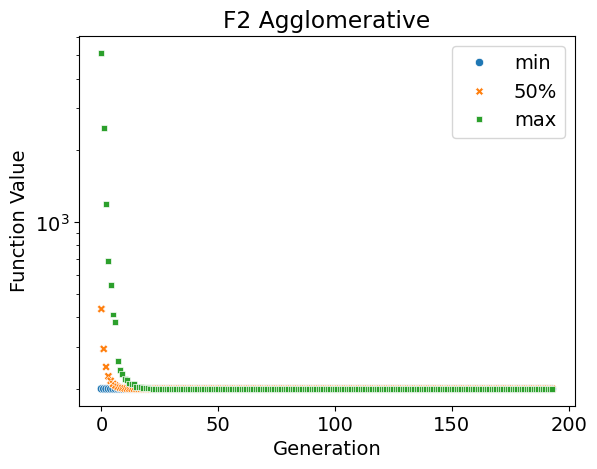

In [45]:
Plot_Min50Max(Agglomerative,Scale)

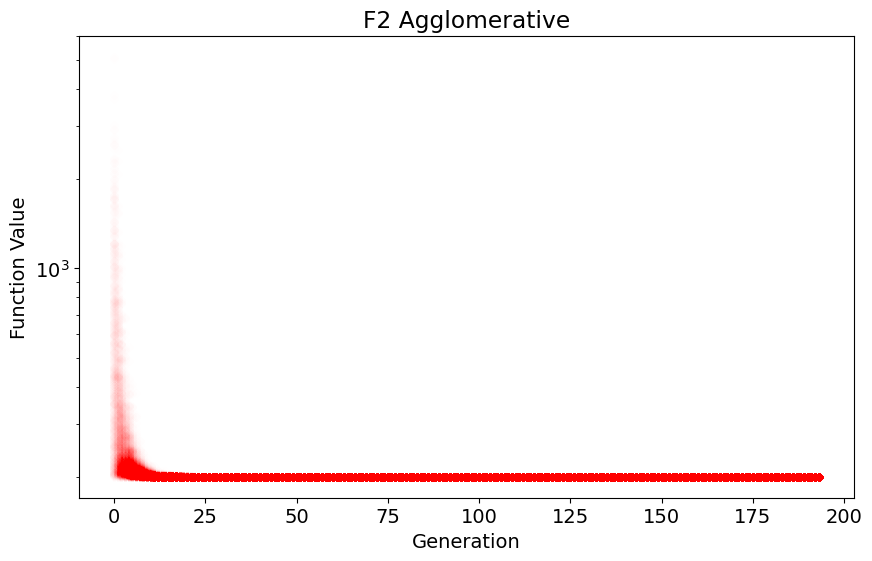

In [46]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [47]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [49]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0            1           2           3           4           5   \
0  1646.755150  1050.420138  994.659820  233.063859  233.063859  233.063859   
1   976.358619   204.095477  204.095477  204.095477  204.095477  204.095477   
2  1330.587707   348.317926  348.317926  348.317926  242.333819  217.927648   
3   378.768468   378.768468  378.768468  258.537026  258.537026  258.537026   
4   738.016548   267.975269  204.356575  204.356575  204.356575  204.356575   
5   510.172929   241.921041  236.226197  236.226197  236.226197  226.825664   
6   652.142831   652.142831  652.142831  652.142831  331.916465  331.916465   
7   445.098177   445.098177  215.862853  208.378316  204.378315  204.378315   
8   741.094581   243.225783  243.225783  243.225783  243.225783  235.908016   
9   219.700533   219.700533  219.700533  219.700533  219.700533  219.700533   

           6           7           8           9   ...          41  \
0  220.040013  215.516178  203.122668  202.792892  ...  200.000000   
1  203.749137  203.749137  203.749137  203.749137  ...  200.000000   
2  217.927648  200.030706  200.030706  200.030706  ...  200.000000   
3  231.088747  231.088747  231.088747  204.642663  ...  200.000000   
4  204.356575  204.356575  204.356575  201.290000  ...  200.000001   
5  219.053495  207.938553  202.528830  202.528830  ...  200.000000   
6  201.777225  201.777225  201.777225  201.777225  ...  200.000000   
7  203.166310  202.070539  202.070539  200.290923  ...  200.000000   
8  227.816869  209.198589  201.765465  201.765465  ...  200.000000   
9  219.700533  209.788832  209.358879  209.358879  ...  200.000000   

           42     43     44     45     46     47     48     49     50  
0  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
1  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
2  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
3  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
4  200.000001  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
5  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
6  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
7  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
8  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  
9  200.000000  200.0  200.0  200.0  200.0  200.0  200.0  200.0  200.0  

[10 rows x 51 columns]

In [50]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    654.002406   396.679194   298.476507   257.192683   232.005154   
std     586.694794   261.671299   139.341245    75.561720    39.536317   
min     200.031694   200.031694   200.031694   200.031694   200.021343   
25%     276.839427   237.875084   219.699683   210.153248   206.050537   
50%     447.470548   301.045674   252.766613   229.394559   216.991540   
75%     808.150705   447.051946   316.659474   276.898446   242.864331   
max    5142.993485  1985.633567  1984.231347   824.586710   514.243932   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    220.030698   211.890848   207.524972   204.719992   203.081309  ...   
std      27.077508    18.103011    11.129579     6.432059     4.278440  ...   
min     200.000554   200.000554   200.000248   200.000248   200.000248  ...   
25%     203.848130   202.426720   201.667046   200.933521   200.631629  ...   
50%     210.366470   206.658368   204.383492   202.579240   201.782230  ...   
75%     224.572230   214.949805   209.455773   205.897832   204.026460  ...   
max     436.818073   436.818073   416.944280   263.443900   260.956760  ...   

                 41            42            43            44            45  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
std    2.063338e-07  1.449185e-07  8.110332e-08  4.718471e-08  2.835739e-08   
min    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
25%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
50%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
75%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   
max    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02   

                 46            47            48            49            50  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean   2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
std    1.833736e-08  7.825562e-09  4.785221e-09  2.916592e-09  1.766622e-09  
min    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
25%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
50%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
75%    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  
max    2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  

[8 rows x 51 columns]

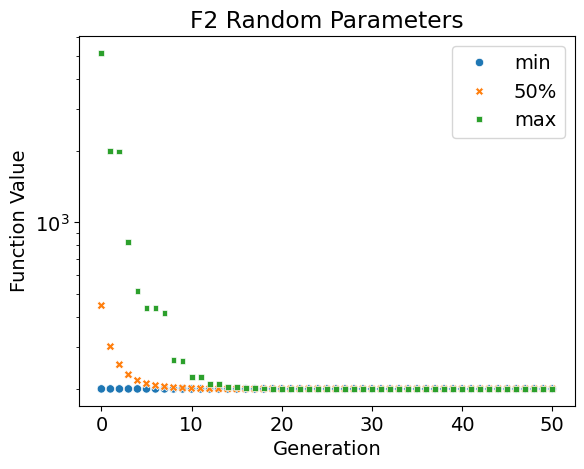

In [51]:
Plot_Min50Max(RandomParameters,Scale)

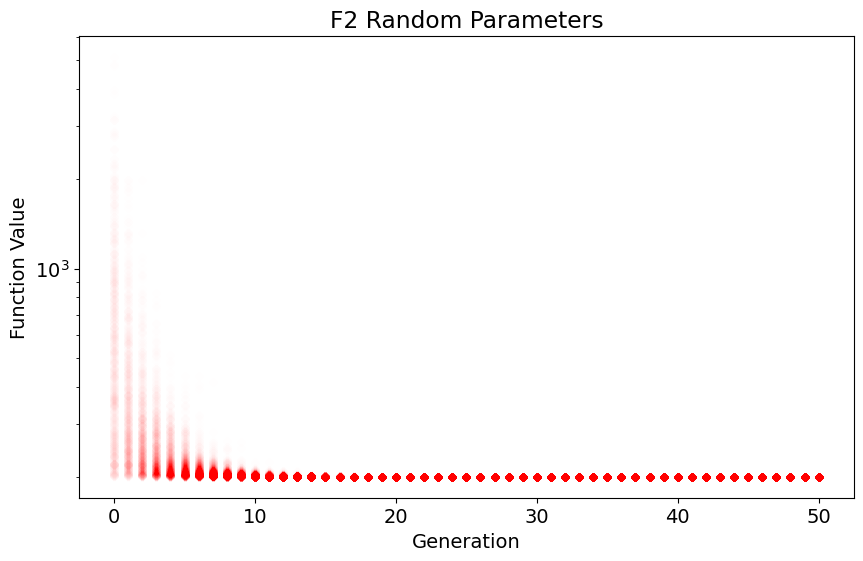

In [52]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [53]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 3

In [55]:
NumberFunction = '3'
Scale = 'linear'

## Function Plot

In [56]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

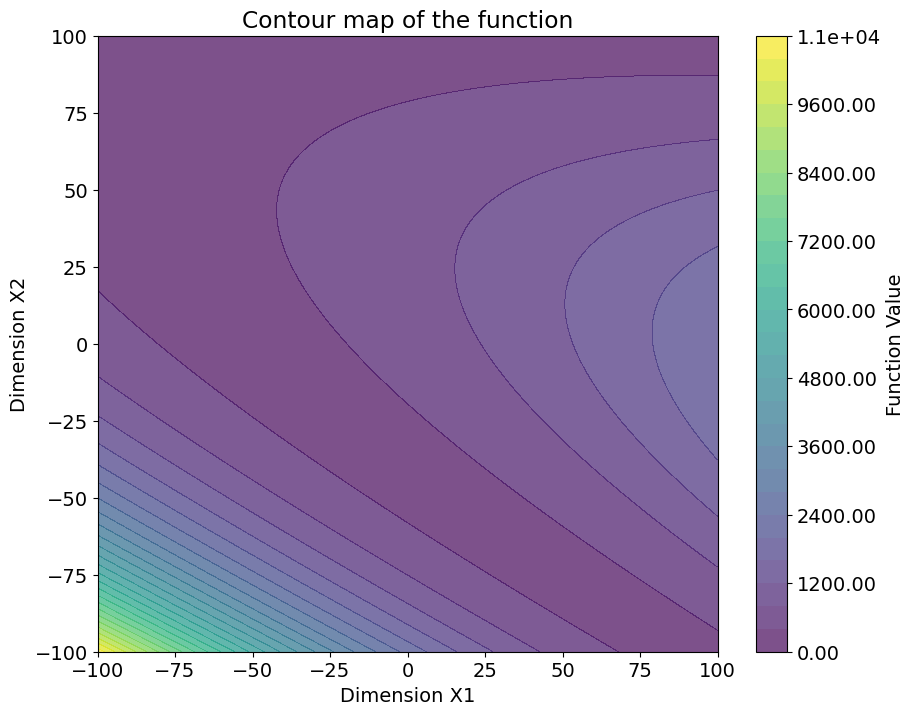

In [57]:
ObjectiveFunction(ndim=2).plot_2d(500)

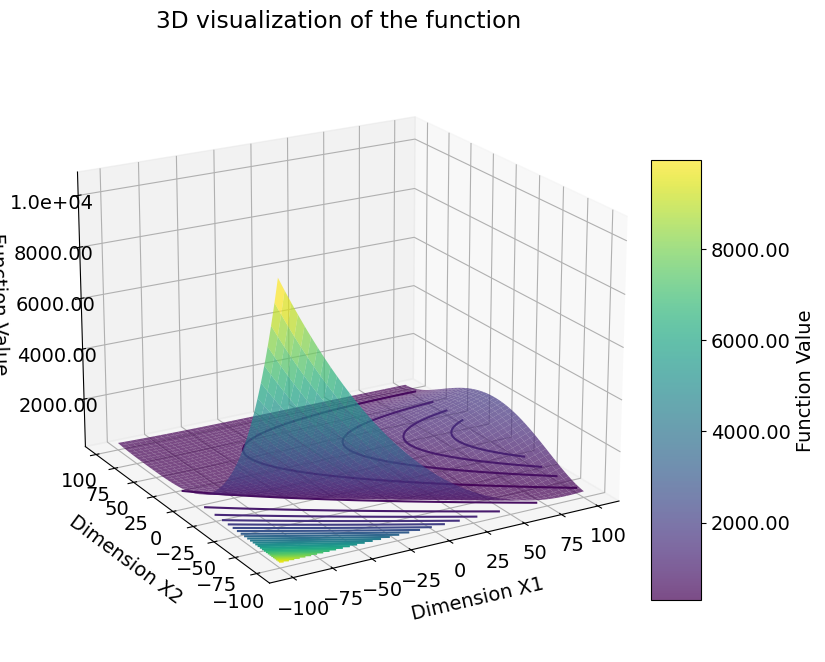

In [58]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [59]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0           1           2           3           4           5   \
0  300.763488  300.763488  300.064207  300.064207  300.064207  300.064207   
1  300.866888  300.484952  300.484952  300.484952  300.058751  300.058751   
2  300.212363  300.212363  300.212363  300.212363  300.212363  300.136913   
3  300.111371  300.111371  300.111371  300.038838  300.038838  300.038838   
4  300.027091  300.010888  300.010888  300.010888  300.010888  300.010888   
5  300.121236  300.121236  300.074368  300.074368  300.060770  300.060770   
6  300.232581  300.206120  300.018711  300.018711  300.018711  300.018711   
7  300.583201  300.304941  300.304941  300.243932  300.243932  300.035821   
8  300.808600  300.669561  300.669561  300.576724  300.274850  300.179540   
9  300.341119  300.224009  300.222903  300.222903  300.123388  300.008736   

           6           7           8           9   ...          41  \
0  300.064207  300.064207  300.064207  300.063163  ...  300.000058   
1  300.058751  300.058751  300.058751  300.058751  ...  300.000002   
2  300.136913  300.034389  300.034389  300.034389  ...  300.000032   
3  300.038838  300.038838  300.038838  300.038838  ...  300.000004   
4  300.010888  300.010888  300.010888  300.010888  ...  300.000002   
5  300.060770  300.060770  300.060770  300.021208  ...  300.000036   
6  300.018711  300.018711  300.018711  300.018711  ...  300.000002   
7  300.035821  300.035821  300.035821  300.010852  ...  300.000011   
8  300.179540  300.179540  300.179540  300.179540  ...  300.000012   
9  300.008736  300.008736  300.008736  300.008736  ...  300.000026   

           42          43          44          45          46          47  \
0  300.000013  300.000013  300.000013  300.000002  300.000001  300.000001   
1  300.000002  300.000000  300.000000  300.000000  300.000000  300.000000   
2  300.000032  300.000032  300.000008  300.000005  300.000002  300.000002   
3  300.000004  300.000004  300.000004  300.000004  300.000004  300.000004   
4  300.000002  300.000002  300.000002  300.000002  300.000002  300.000002   
5  300.000036  300.000036  300.000036  300.000036  300.000036  300.000010   
6  300.000002  300.000002  300.000002  300.000002  300.000000  300.000000   
7  300.000011  300.000011  300.000003  300.000002  300.000002  300.000000   
8  300.000012  300.000012  300.000012  300.000001  300.000001  300.000000   
9  300.000001  300.000001  300.000001  300.000001  300.000001  300.000001   

           48          49          50  
0  300.000001  300.000001  300.000001  
1  300.000000  300.000000  300.000000  
2  300.000001  300.000001  300.000001  
3  300.000000  300.000000  300.000000  
4  300.000002  300.000002  300.000002  
5  300.000010  300.000010  300.000002  
6  300.000000  300.000000  300.000000  
7  300.000000  300.000000  300.000000  
8  300.000000  300.000000  300.000000  
9  300.000001  300.000001  300.000001  

[10 rows x 51 columns]

In [60]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.525494   300.284129   300.177794   300.128099   300.097446   
std       0.550311     0.299791     0.183891     0.132423     0.107736   
min     300.001475   300.001345   300.000079   300.000079   300.000079   
25%     300.138510   300.076767   300.051770   300.034151   300.025026   
50%     300.357282   300.188172   300.117918   300.087017   300.062767   
75%     300.706043   300.377619   300.240143   300.175321   300.129310   
max     304.316470   301.931374   301.166384   300.907912   300.743556   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    300.075931   300.062097   300.049559   300.040632   300.034995  ...   
std       0.084845     0.072582     0.056004     0.047025     0.040904  ...   
min     300.000079   300.000079   300.000079   300.000079   300.000079  ...   
25%     300.020147   300.014822   300.012044   300.009927   300.008550  ...   
50%     300.049857   300.039688   300.033143   300.026324   300.022052  ...   
75%     300.100461   300.078463   300.063884   300.055058   300.047904  ...   
max     300.706896   300.706896   300.486427   300.486427   300.340341  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.000055   300.000044   300.000031   300.000024   300.000018   
std       0.000108     0.000091     0.000060     0.000051     0.000041   
min     300.000000   300.000000   300.000000   300.000000   300.000000   
25%     300.000007   300.000005   300.000003   300.000002   300.000002   
50%     300.000019   300.000015   300.000011   300.000008   300.000006   
75%     300.000053   300.000043   300.000032   300.000024   300.000016   
max     300.001080   300.001080   300.000868   300.000868   300.000656   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    300.000014   300.000011   300.000008   300.000006   300.000005  
std       0.000033     0.000030     0.000026     0.000024     0.000023  
min     300.000000   300.000000   300.000000   300.000000   300.000000  
25%     300.000001   300.000001   300.000001   300.000001   300.000000  
50%     300.000004   300.000003   300.000002   300.000002   300.000001  
75%     300.000012   300.000009   300.000007   300.000005   300.000004  
max     300.000656   300.000656   300.000656   300.000656   300.000656  

[8 rows x 51 columns]

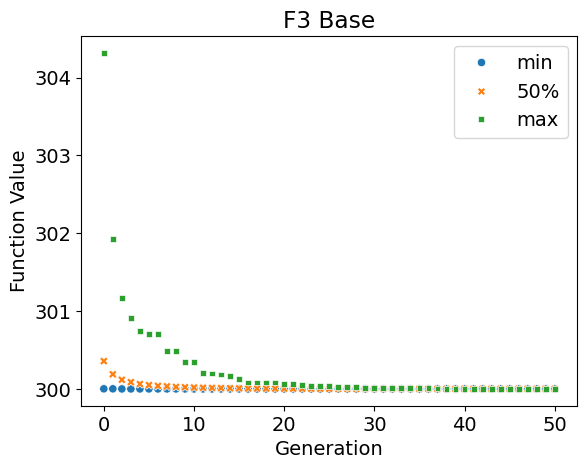

In [61]:
Plot_Min50Max(Base,Scale)

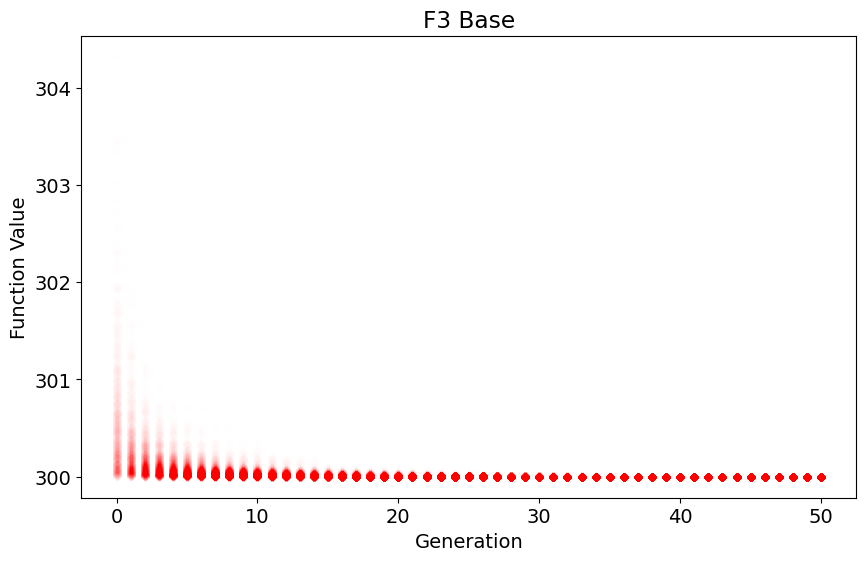

In [62]:
Plot_Generation_FunctionValues(Base,Scale)

In [63]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [64]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0           1           2           3           4           5    \
0  300.087792  300.087792  300.087792  300.087792  300.087792  300.087792   
1  300.151187  300.003959  300.003959  300.003959  300.003959  300.003959   
2  300.161556  300.048806  300.048806  300.048806  300.048806  300.048806   
3  300.507760  300.167856  300.167856  300.167856  300.167856  300.167856   
4  301.966146  300.578868  300.578868  300.091272  300.091272  300.091272   
5  300.270212  300.270212  300.046574  300.046574  300.046574  300.046574   
6  300.691839  300.349797  300.349797  300.349797  300.349797  300.349797   
7  300.868225  300.435003  300.435003  300.172399  300.074179  300.074179   
8  300.511788  300.511788  300.125738  300.125738  300.125738  300.125738   
9  300.029971  300.029971  300.029971  300.029971  300.029971  300.029971   

          6           7           8           9    ...  136  137  138  139  \
0  300.087792  300.039999  300.039999  300.039999  ...  NaN  NaN  NaN  NaN   
1  300.003959  300.003959  300.003959  300.003959  ...  NaN  NaN  NaN  NaN   
2  300.032075  300.000929  300.000929  300.000929  ...  NaN  NaN  NaN  NaN   
3  300.167856  300.022107  300.022107  300.022107  ...  NaN  NaN  NaN  NaN   
4  300.011980  300.003136  300.003136  300.003136  ...  NaN  NaN  NaN  NaN   
5  300.046574  300.046574  300.046574  300.046574  ...  NaN  NaN  NaN  NaN   
6  300.349797  300.240550  300.240550  300.066512  ...  NaN  NaN  NaN  NaN   
7  300.074179  300.074179  300.074179  300.074179  ...  NaN  NaN  NaN  NaN   
8  300.038534  300.038534  300.038534  300.038534  ...  NaN  NaN  NaN  NaN   
9  300.029971  300.029971  300.029971  300.029971  ...  NaN  NaN  NaN  NaN   

   140  141  142  143  144  145  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 146 columns]

In [65]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.496684   300.273106   300.188158   300.130223   300.096394   
std       0.505987     0.263839     0.190171     0.134598     0.101053   
min     300.000039   300.000039   300.000039   300.000039   300.000039   
25%     300.140165   300.080900   300.050579   300.035220   300.024745   
50%     300.361873   300.200211   300.125206   300.091241   300.062488   
75%     300.667439   300.384418   300.260825   300.181854   300.131804   
max     303.744300   301.894138   301.257858   300.994225   300.725166   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    300.074235   300.060072   300.049165   300.040305   300.033503  ...   
std       0.079773     0.067148     0.054078     0.041917     0.034685  ...   
min     300.000039   300.000039   300.000039   300.000039   300.000039  ...   
25%     300.018653   300.015321   300.012640   300.010246   300.008829  ...   
50%     300.048625   300.042226   300.034182   300.028032   300.021796  ...   
75%     300.101628   300.085002   300.069846   300.054805   300.046346  ...   
max     300.725166   300.725166   300.657334   300.362562   300.222517  ...   

         136    137    138    139    140    141    142    143    144    145  
count    5.0    5.0    5.0    5.0    1.0    1.0    1.0    1.0    1.0    1.0  
mean   300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
std      0.0    0.0    0.0    0.0    NaN    NaN    NaN    NaN    NaN    NaN  
min    300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
25%    300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
50%    300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
75%    300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
max    300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  

[8 rows x 146 columns]

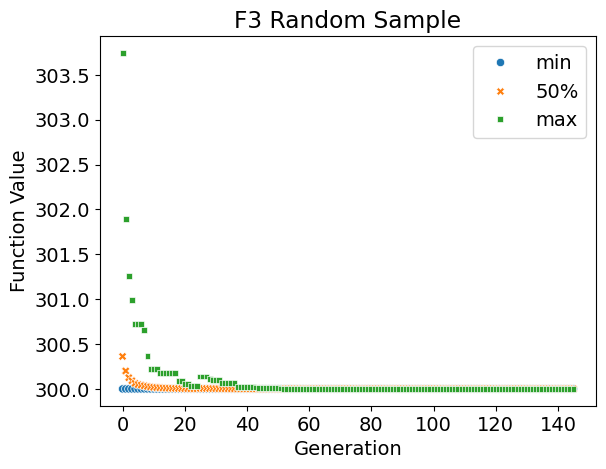

In [66]:
Plot_Min50Max(RandomSample,Scale)

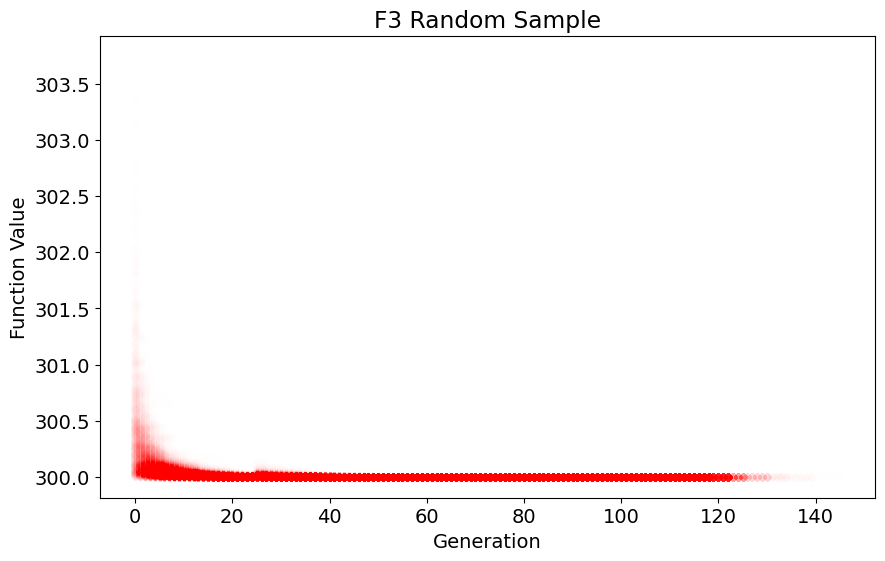

In [67]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [68]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=72, description='generation', max=145), Output()), _dom_classes=('widget…

## Agglomerative

In [69]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0           1           2           3           4           5    \
0  300.952853  300.952853  300.199816  300.199816  300.199816  300.120706   
1  300.135904  300.135904  300.135904  300.135904  300.135904  300.135904   
2  301.040036  300.008377  300.008377  300.008377  300.008377  300.008377   
3  300.103266  300.103266  300.103266  300.103266  300.103266  300.103266   
4  300.351144  300.235962  300.235962  300.130810  300.077613  300.077613   
5  300.274388  300.274388  300.030379  300.030379  300.030379  300.030379   
6  301.586979  300.029472  300.029472  300.029472  300.029472  300.029472   
7  300.974409  300.883850  300.200706  300.062183  300.062183  300.062183   
8  300.224595  300.224595  300.046390  300.046390  300.046390  300.046390   
9  300.341756  300.114305  300.114305  300.014281  300.014281  300.014281   

          6           7           8           9    ...    184    185    186  \
0  300.120706  300.120706  300.029768  300.029768  ...  300.0  300.0  300.0   
1  300.135904  300.097490  300.010500  300.010500  ...  300.0  300.0  300.0   
2  300.008377  300.008377  300.008377  300.008377  ...  300.0  300.0  300.0   
3  300.103266  300.103266  300.103266  300.103266  ...  300.0  300.0  300.0   
4  300.077613  300.054907  300.054907  300.054907  ...  300.0  300.0  300.0   
5  300.030379  300.030379  300.030379  300.028821  ...  300.0  300.0  300.0   
6  300.029472  300.029472  300.029472  300.029472  ...  300.0  300.0  300.0   
7  300.062183  300.062183  300.062183  300.062183  ...  300.0  300.0  300.0   
8  300.046390  300.046390  300.046390  300.046390  ...  300.0  300.0  300.0   
9  300.014281  300.014281  300.014281  300.014281  ...  300.0  300.0  300.0   

     187    188    189    190    191    192    193  
0  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
1  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
2  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
3  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
4  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
5  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
6  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
7  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
8  300.0  300.0  300.0  300.0  300.0  300.0  300.0  
9  300.0  300.0  300.0  300.0  300.0  300.0  300.0  

[10 rows x 194 columns]

In [70]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.541117   300.284229   300.187315   300.127678   300.095348   
std       0.567419     0.318692     0.204082     0.137773     0.098358   
min     300.000728   300.000317   300.000317   300.000126   300.000022   
25%     300.133737   300.073097   300.049447   300.034757   300.025340   
50%     300.361386   300.179258   300.122414   300.083708   300.065556   
75%     300.761534   300.371032   300.247952   300.176884   300.135463   
max     304.633087   302.458107   301.610852   301.188253   300.865659   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    300.072125   300.057363   300.045594   300.039243   300.032869  ...   
std       0.079337     0.062165     0.047174     0.042360     0.035843  ...   
min     300.000022   300.000022   300.000022   300.000022   300.000022  ...   
25%     300.019910   300.015056   300.011589   300.009154   300.007760  ...   
50%     300.049571   300.039332   300.030137   300.026074   300.021477  ...   
75%     300.099268   300.077400   300.062789   300.053199   300.045260  ...   
max     300.865659   300.629762   300.375643   300.361115   300.273300  ...   

                184           185           186           187           188  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
std    4.053492e-14  4.053492e-14  3.927866e-14  3.927866e-14  3.927866e-14   
min    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
25%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
50%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
75%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
max    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   

                189           190           191           192           193  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean   3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  
std    3.923746e-14  3.923746e-14  3.923746e-14  3.923746e-14  3.923746e-14  
min    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  
25%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  
50%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  
75%    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  
max    3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  

[8 rows x 194 columns]

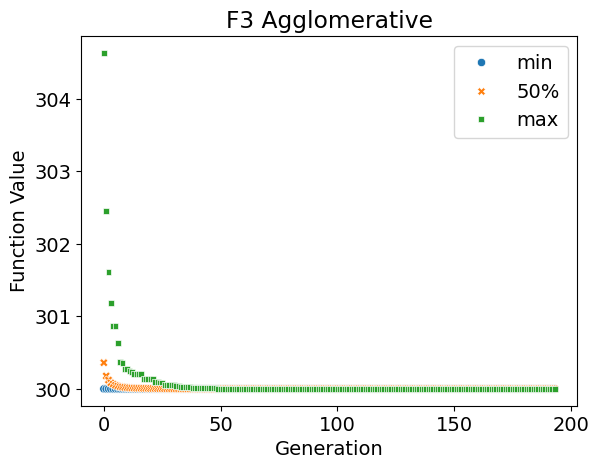

In [71]:
Plot_Min50Max(Agglomerative,Scale)

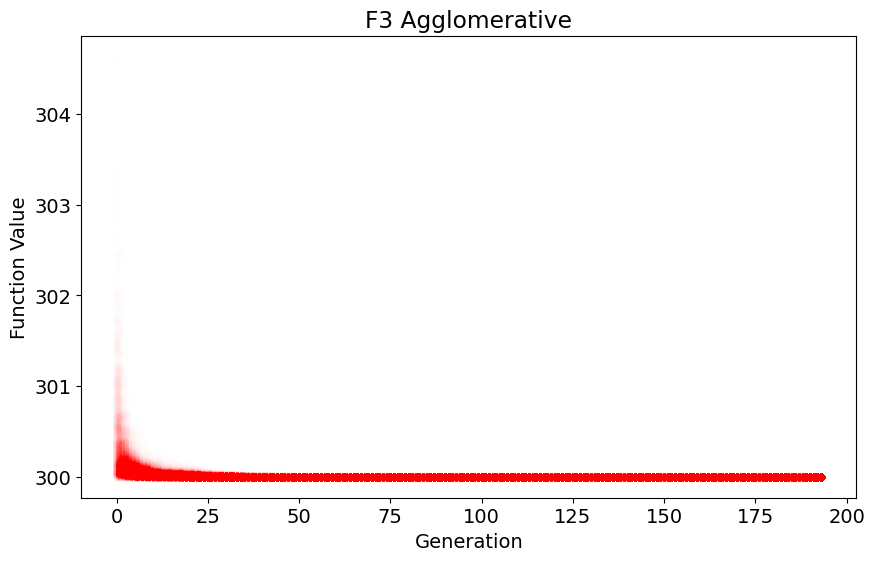

In [72]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [73]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [74]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0           1           2           3           4           5   \
0  300.479667  300.236759  300.236759  300.236759  300.077851  300.077851   
1  300.010570  300.010570  300.010570  300.010570  300.010570  300.010570   
2  300.075363  300.049934  300.049934  300.049934  300.049934  300.049934   
3  300.987177  300.821039  300.087027  300.087027  300.036630  300.036630   
4  300.029501  300.029501  300.029501  300.029501  300.029501  300.029501   
5  300.094867  300.094867  300.038551  300.038551  300.038551  300.018132   
6  301.259261  300.177994  300.177994  300.177994  300.177994  300.087259   
7  300.369536  300.352523  300.352523  300.352523  300.220673  300.220673   
8  301.677804  300.196249  300.196249  300.196249  300.196249  300.149166   
9  300.102761  300.102761  300.102761  300.102761  300.001946  300.001946   

           6           7           8           9   ...          41  \
0  300.077851  300.077851  300.015135  300.015135  ...  300.000063   
1  300.010570  300.010570  300.010570  300.010570  ...  300.000007   
2  300.049934  300.049934  300.049934  300.049934  ...  300.000006   
3  300.036630  300.032781  300.002882  300.002882  ...  300.000002   
4  300.029501  300.027596  300.027596  300.027596  ...  300.000003   
5  300.018132  300.018132  300.018132  300.018132  ...  300.000008   
6  300.087259  300.087259  300.087259  300.010005  ...  300.000089   
7  300.046029  300.046029  300.003306  300.003306  ...  300.000033   
8  300.102088  300.102088  300.102088  300.053989  ...  300.000020   
9  300.001946  300.001946  300.001946  300.001946  ...  300.000012   

           42          43          44          45          46          47  \
0  300.000063  300.000063  300.000063  300.000018  300.000018  300.000004   
1  300.000007  300.000007  300.000007  300.000001  300.000001  300.000001   
2  300.000006  300.000001  300.000001  300.000001  300.000001  300.000001   
3  300.000002  300.000002  300.000002  300.000002  300.000001  300.000001   
4  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
5  300.000008  300.000008  300.000008  300.000001  300.000001  300.000001   
6  300.000038  300.000038  300.000038  300.000038  300.000038  300.000038   
7  300.000024  300.000024  300.000022  300.000004  300.000004  300.000004   
8  300.000020  300.000020  300.000003  300.000003  300.000003  300.000002   
9  300.000012  300.000008  300.000008  300.000008  300.000008  300.000001   

           48          49          50  
0  300.000004  300.000004  300.000004  
1  300.000001  300.000001  300.000001  
2  300.000001  300.000000  300.000000  
3  300.000001  300.000001  300.000000  
4  300.000000  300.000000  300.000000  
5  300.000001  300.000001  300.000001  
6  300.000038  300.000038  300.000023  
7  300.000000  300.000000  300.000000  
8  300.000002  300.000002  300.000002  
9  300.000001  300.000001  300.000001  

[10 rows x 51 columns]

In [75]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.548848   300.276193   300.182527   300.130084   300.099052   
std       0.597946     0.274624     0.177616     0.131919     0.101660   
min     300.000059   300.000059   300.000059   300.000059   300.000059   
25%     300.144875   300.081465   300.054993   300.035542   300.027813   
50%     300.364364   300.192746   300.128827   300.087594   300.066902   
75%     300.756293   300.384663   300.255069   300.182723   300.136799   
max     305.386004   302.270969   301.420655   300.969440   300.883690   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    300.078730   300.062733   300.050418   300.042015   300.034698  ...   
std       0.080855     0.064525     0.051456     0.043028     0.037497  ...   
min     300.000059   300.000059   300.000059   300.000059   300.000059  ...   
25%     300.023009   300.017772   300.014807   300.012100   300.009649  ...   
50%     300.053125   300.043368   300.034650   300.029209   300.023198  ...   
75%     300.109391   300.086195   300.069584   300.056741   300.045484  ...   
max     300.584423   300.520800   300.421498   300.309828   300.301059  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    300.000069   300.000055   300.000039   300.000030   300.000021   
std       0.000232     0.000173     0.000100     0.000080     0.000068   
min     300.000000   300.000000   300.000000   300.000000   300.000000   
25%     300.000006   300.000005   300.000003   300.000002   300.000002   
50%     300.000020   300.000015   300.000011   300.000009   300.000006   
75%     300.000065   300.000048   300.000035   300.000025   300.000019   
max     300.005956   300.004157   300.001613   300.001613   300.001613   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    300.000015   300.000012   300.000009   300.000007   300.000005  
std       0.000046     0.000043     0.000041     0.000018     0.000016  
min     300.000000   300.000000   300.000000   300.000000   300.000000  
25%     300.000001   300.000001   300.000001   300.000001   300.000000  
50%     300.000005   300.000004   300.000003   300.000002   300.000001  
75%     300.000014   300.000010   300.000008   300.000006   300.000004  
max     300.001163   300.001163   300.001163   300.000290   300.000290  

[8 rows x 51 columns]

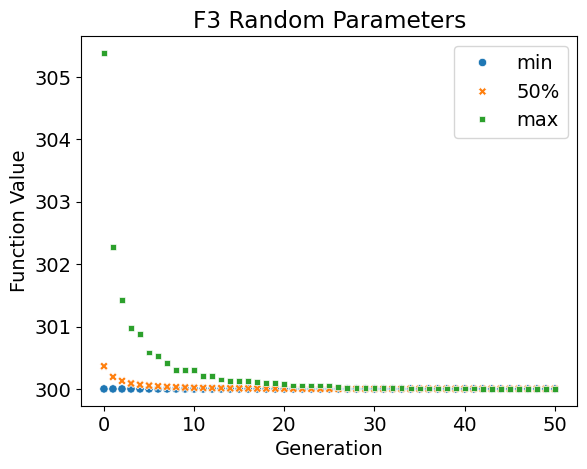

In [76]:
Plot_Min50Max(RandomParameters,Scale)

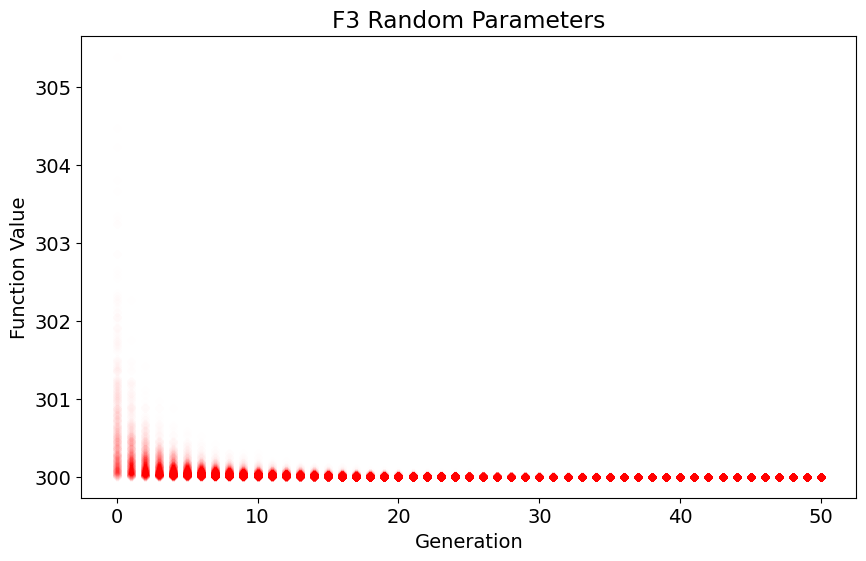

In [77]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [78]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 4

In [79]:
NumberFunction = '4'
Scale = 'linear'

## Function Plot

In [80]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

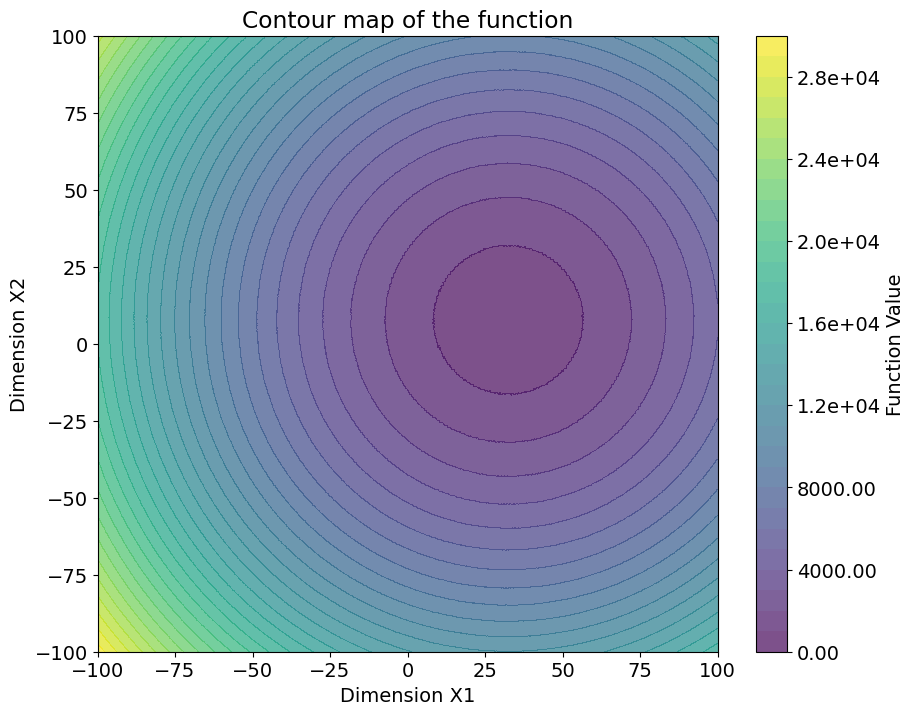

In [81]:
ObjectiveFunction(ndim=2).plot_2d(500)

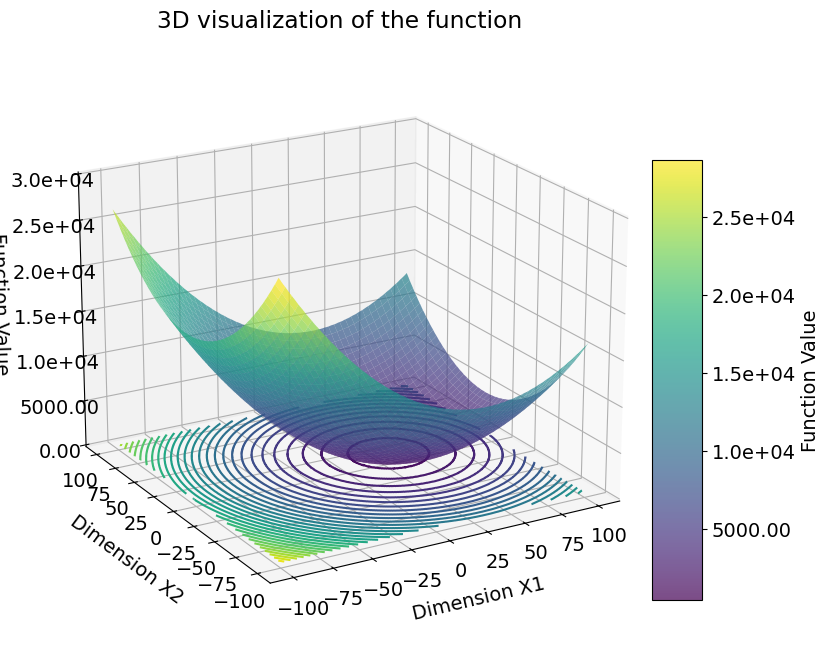

In [82]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [83]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0           1           2           3           4           5   \
0  512.408676  441.202026  424.130786  424.130786  424.130786  419.206062   
1  432.067465  432.067465  432.067465  421.368566  411.078074  411.078074   
2  802.367272  491.661444  491.661444  457.730048  431.732054  415.938959   
3  405.259391  405.259391  405.259391  405.259391  405.259391  405.259391   
4  453.708625  423.773217  423.773217  423.773217  423.773217  423.773217   
5  469.549995  447.066742  420.881529  420.881529  404.922190  404.922190   
6  487.290060  487.290060  422.241187  422.241187  419.865978  416.628007   
7  442.798443  442.798443  442.798443  432.655481  432.655481  432.655481   
8  427.710321  427.710321  427.710321  415.602478  415.602478  415.602478   
9  558.009317  497.665697  445.746917  439.004373  422.508220  420.030543   

           6           7           8           9   ...          41  \
0  403.145452  403.145452  403.145452  403.145452  ...  400.197988   
1  411.078074  402.129400  402.129400  402.129400  ...  400.049836   
2  415.938959  415.938959  415.938959  413.310011  ...  400.360277   
3  405.259391  405.259391  405.259391  405.259391  ...  400.403203   
4  423.773217  414.821089  414.821089  411.930988  ...  400.289451   
5  404.922190  404.922190  404.922190  403.625957  ...  400.224665   
6  416.628007  416.111830  414.610559  408.785710  ...  400.262078   
7  419.211543  419.211543  418.937025  404.909446  ...  400.012102   
8  415.602478  410.285522  410.285522  406.388374  ...  400.137847   
9  418.196354  408.388426  408.388426  407.144722  ...  400.118115   

           42          43          44          45          46          47  \
0  400.197988  400.197988  400.197988  400.197988  400.197988  400.197988   
1  400.049836  400.049836  400.049836  400.049836  400.049836  400.049836   
2  400.360277  400.360277  400.360277  400.360277  400.360277  400.360277   
3  400.403203  400.403203  400.403203  400.009061  400.009061  400.009061   
4  400.289451  400.012984  400.012984  400.012984  400.012984  400.012984   
5  400.224665  400.224665  400.224665  400.224665  400.224665  400.063271   
6  400.262078  400.119115  400.119115  400.119115  400.119115  400.119115   
7  400.012102  400.012102  400.012102  400.012102  400.012102  400.012102   
8  400.137847  400.137847  400.058291  400.058291  400.058291  400.058291   
9  400.118115  400.118115  400.118115  400.118115  400.118115  400.118115   

           48          49          50  
0  400.165425  400.105043  400.105043  
1  400.049836  400.049836  400.022998  
2  400.360277  400.360277  400.360277  
3  400.009061  400.009061  400.009061  
4  400.012984  400.012984  400.012984  
5  400.063271  400.063271  400.060620  
6  400.119115  400.119115  400.119115  
7  400.012102  400.012102  400.012102  
8  400.058291  400.058291  400.058291  
9  400.118115  400.118115  400.118115  

[10 rows x 51 columns]

In [84]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    542.692616   481.634674   449.862968   434.181214   425.676578   
std     128.762365    68.389077    33.817740    20.144454    13.643257   
min     401.658037   401.658037   401.658037   401.658037   401.658037   
25%     453.442436   435.479988   426.245281   421.366937   416.551574   
50%     505.308688   462.723068   440.817337   429.826244   423.871600   
75%     589.128962   507.656559   463.688329   443.528885   432.199929   
max    1741.931944  1249.371121   651.059615   544.730755   494.361705   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    419.668621   415.616124   412.017420   409.289669   407.283030  ...   
std       9.585633     7.379746     6.049188     4.747229     3.788971  ...   
min     400.247307   400.247307   400.247307   400.185971   400.185971  ...   
25%     412.910624   410.319662   407.408662   405.627761   404.732488  ...   
50%     419.251863   415.137777   411.358905   408.681623   406.819851  ...   
75%     425.628109   420.471457   416.120234   412.393908   409.574543  ...   
max     474.196360   441.569397   434.754970   429.336281   420.924571  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    400.199966   400.183551   400.165760   400.152648   400.138794   
std       0.215824     0.200726     0.183474     0.167429     0.151958   
min     400.000114   400.000114   400.000114   400.000114   400.000114   
25%     400.050008   400.045971   400.042719   400.037649   400.035887   
50%     400.127311   400.115285   400.102515   400.097083   400.087197   
75%     400.276122   400.248816   400.225159   400.203321   400.186060   
max     401.173672   401.080023   401.045684   400.995608   400.978563   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    400.128041   400.119272   400.108569   400.099123   400.092214  
std       0.143140     0.134419     0.122482     0.113889     0.107835  
min     400.000114   400.000114   400.000114   400.000114   400.000114  
25%     400.033674   400.030542   400.027880   400.024124   400.022322  
50%     400.080381   400.074712   400.067029   400.061538   400.056553  
75%     400.167660   400.157804   400.143459   400.133149   400.119820  
max     400.958231   400.958231   400.883391   400.883391   400.883391  

[8 rows x 51 columns]

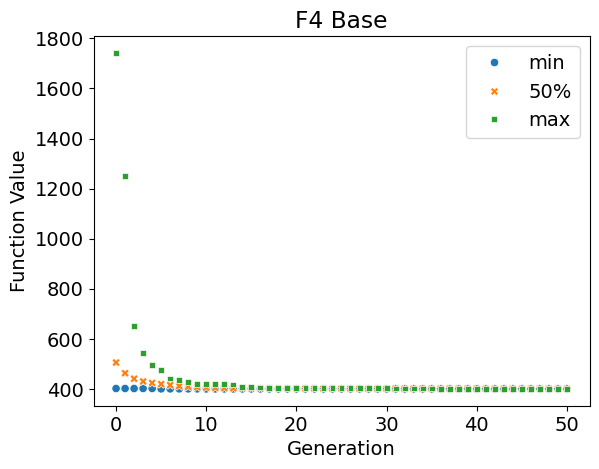

In [85]:
Plot_Min50Max(Base,Scale)

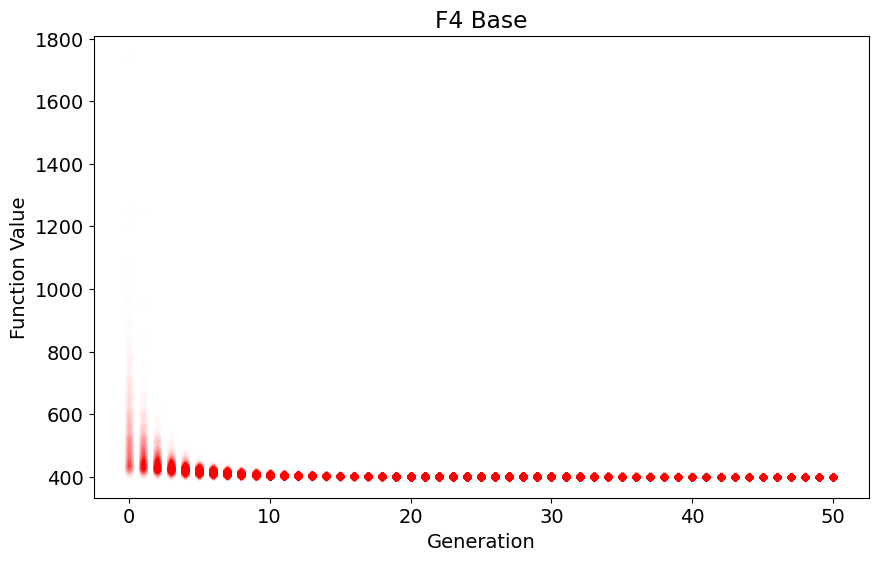

In [86]:
Plot_Generation_FunctionValues(Base,Scale)

In [87]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [88]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0           1           2           3           4           5    \
0  502.908711  502.908711  426.262640  426.262640  426.262640  426.262640   
1  508.991486  434.225742  434.225742  427.897250  427.897250  427.897250   
2  430.090169  430.090169  430.090169  430.090169  430.090169  430.090169   
3  448.475801  448.475801  448.475801  448.475801  431.517528  431.517528   
4  613.462654  585.824535  472.429244  440.127085  424.474967  419.173367   
5  486.935578  486.935578  486.935578  409.439459  409.439459  409.439459   
6  442.589821  440.720693  440.720693  440.720693  426.821255  425.498830   
7  806.431057  469.693664  444.846987  444.846987  444.846987  430.549724   
8  712.891431  458.628096  422.274032  422.274032  422.274032  422.274032   
9  591.450670  549.414104  428.541994  428.541994  428.541994  428.541994   

          6           7           8           9    ...    121    122  123  \
0  426.262640  423.787047  410.954501  410.954501  ...  400.0  400.0  NaN   
1  427.897250  424.971368  424.971368  421.777390  ...    NaN    NaN  NaN   
2  408.558261  408.558261  406.708836  406.708836  ...    NaN    NaN  NaN   
3  426.238836  415.873503  409.047488  409.047488  ...    NaN    NaN  NaN   
4  417.248034  417.248034  417.248034  402.623221  ...    NaN    NaN  NaN   
5  409.439459  409.439459  409.439459  406.786251  ...    NaN    NaN  NaN   
6  412.411336  412.411336  412.411336  412.411336  ...    NaN    NaN  NaN   
7  417.417568  417.417568  417.417568  401.415412  ...    NaN    NaN  NaN   
8  412.004791  412.004791  407.832568  407.832568  ...    NaN    NaN  NaN   
9  417.464323  408.149679  408.149679  408.149679  ...    NaN    NaN  NaN   

   124  125  126  127  128  129  130  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 131 columns]

In [89]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    546.173211   479.273393   449.359549   434.242397   425.294541   
std     120.690082    62.531343    33.903851    19.961960    12.950629   
min     406.194330   402.958115   402.031394   401.965533   401.965533   
25%     455.691120   436.110243   427.183672   420.719496   416.082613   
50%     510.085951   460.179320   440.455247   430.417789   423.542173   
75%     602.994990   503.007607   461.727398   442.333308   431.990484   
max    1195.314087   861.972350   704.523720   582.722792   506.254231   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    419.712788   415.210717   411.898011   409.377945   407.288912  ...   
std       9.233527     7.290042     5.764863     4.850760     3.913629  ...   
min     400.511433   400.339067   400.339067   400.133422   400.133422  ...   
25%     413.311723   409.802764   407.701883   405.641815   404.387924  ...   
50%     418.688611   414.515997   411.324765   408.745596   406.606381  ...   
75%     425.394280   420.113872   415.729530   412.484779   409.815988  ...   
max     459.818838   437.227534   436.915212   425.830583   423.597996  ...   

              121         122    123    124    125    126    127    128  \
count   20.000000   20.000000    1.0    1.0    1.0    1.0    1.0    1.0   
mean   400.000001  400.000001  400.0  400.0  400.0  400.0  400.0  400.0   
std      0.000003    0.000003    NaN    NaN    NaN    NaN    NaN    NaN   
min    400.000000  400.000000  400.0  400.0  400.0  400.0  400.0  400.0   
25%    400.000000  400.000000  400.0  400.0  400.0  400.0  400.0  400.0   
50%    400.000000  400.000000  400.0  400.0  400.0  400.0  400.0  400.0   
75%    400.000000  400.000000  400.0  400.0  400.0  400.0  400.0  400.0   
max    400.000012  400.000012  400.0  400.0  400.0  400.0  400.0  400.0   

         129    130  
count    1.0    1.0  
mean   400.0  400.0  
std      NaN    NaN  
min    400.0  400.0  
25%    400.0  400.0  
50%    400.0  400.0  
75%    400.0  400.0  
max    400.0  400.0  

[8 rows x 131 columns]

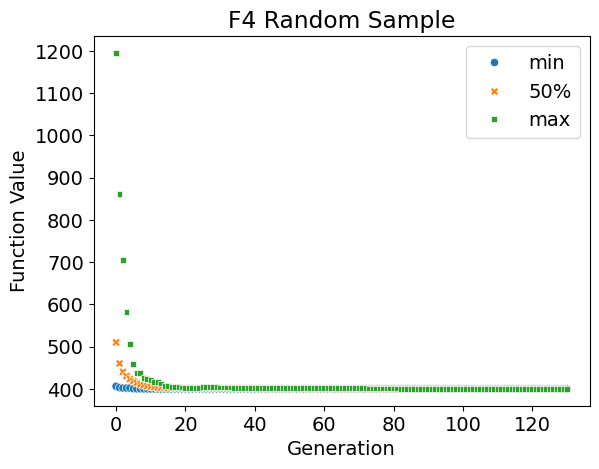

In [90]:
Plot_Min50Max(RandomSample,Scale)

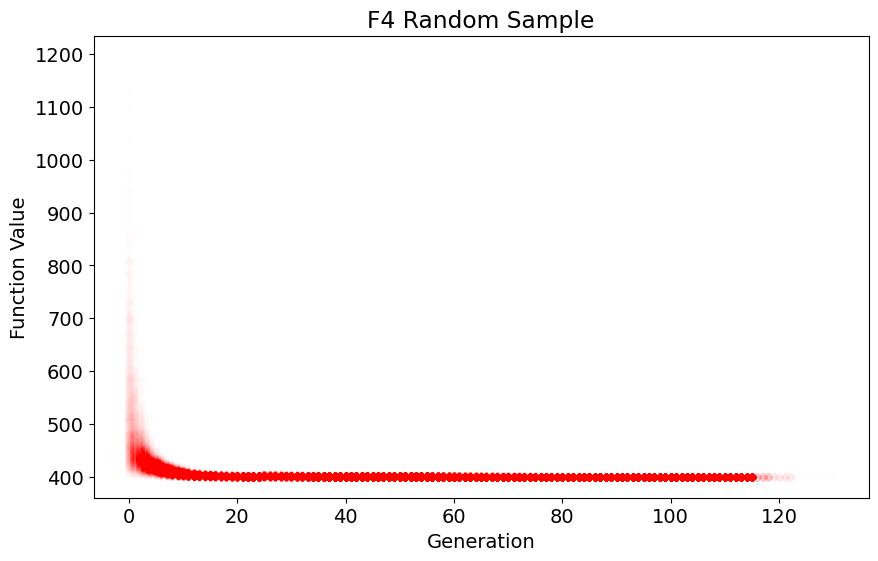

In [91]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [92]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=65, description='generation', max=130), Output()), _dom_classes=('widget…

## Agglomerative

In [98]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0           1           2           3           4           5    \
0  542.171576  431.415883  421.295604  421.295604  409.392907  409.392907   
1  518.899814  467.247853  467.247853  421.136577  418.555228  418.555228   
2  543.815269  543.815269  470.111623  453.640076  443.315530  440.387385   
3  576.238347  537.085077  466.973537  447.747702  418.967313  418.967313   
4  469.507356  469.507356  425.054938  425.054938  425.054938  425.054938   
5  511.552642  482.920726  470.475793  436.652766  436.652766  424.524048   
6  627.876434  532.743294  451.106709  451.106709  451.106709  434.865762   
7  481.195659  481.195659  460.952787  460.952787  428.711358  428.711358   
8  438.994990  438.994990  438.994990  438.994990  438.994990  422.263319   
9  555.705163  423.257907  422.332692  422.332692  409.789331  409.789331   

          6           7           8           9    ...    184    185    186  \
0  409.392907  409.392907  405.521566  405.521566  ...  400.0  400.0  400.0   
1  407.843947  405.360397  405.360397  405.360397  ...  400.0  400.0  400.0   
2  421.401035  411.350409  404.048897  404.048897  ...  400.0  400.0  400.0   
3  413.249164  412.737610  412.737610  410.197071  ...  400.0  400.0  400.0   
4  421.314093  405.117389  405.117389  405.117389  ...  400.0  400.0  400.0   
5  419.021457  411.611008  411.611008  405.787741  ...  400.0  400.0  400.0   
6  407.685931  407.685931  407.685931  407.685931  ...  400.0  400.0  400.0   
7  423.201684  402.150275  402.150275  402.150275  ...  400.0  400.0  400.0   
8  417.705356  417.705356  417.705356  417.262357  ...  400.0  400.0  400.0   
9  409.789331  409.789331  409.789331  409.789331  ...  400.0  400.0  400.0   

     187    188    189    190    191    192    193  
0  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
1  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
2  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
3  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
4  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
5  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
6  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
7  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
8  400.0  400.0  400.0  400.0  400.0  400.0  400.0  
9  400.0  400.0  400.0  400.0  400.0  400.0  400.0  

[10 rows x 194 columns]

In [99]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    547.795247   479.230362   449.945174   434.654344   426.277638   
std     127.132388    60.748290    32.249577    19.487204    13.394310   
min     403.703709   403.703709   402.625449   401.964618   401.443876   
25%     459.076907   437.983828   427.213644   420.894668   416.880948   
50%     510.401146   463.584965   441.493929   430.891257   424.708659   
75%     587.937545   503.822211   464.357276   443.490475   433.766045   
max    1304.360455  1199.941601   642.093153   555.609618   500.085802   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    420.038027   415.184814   411.640051   409.140751   407.111487  ...   
std       9.283704     7.336099     5.938649     4.813044     3.733516  ...   
min     401.443876   400.231116   400.231116   400.087224   400.087224  ...   
25%     413.412714   409.777921   407.313995   405.377032   404.363232  ...   
50%     419.361314   414.553485   410.863819   408.617368   406.646036  ...   
75%     426.014871   420.091729   415.225008   412.516936   409.460865  ...   
max     456.068314   443.222292   437.049654   425.304731   420.147573  ...   

               184          185          186          187          188  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    400.001014   400.001014   400.001014   400.001014   400.001014   
std       0.031468     0.031468     0.031468     0.031468     0.031468   
min     400.000000   400.000000   400.000000   400.000000   400.000000   
25%     400.000000   400.000000   400.000000   400.000000   400.000000   
50%     400.000000   400.000000   400.000000   400.000000   400.000000   
75%     400.000000   400.000000   400.000000   400.000000   400.000000   
max     400.994959   400.994959   400.994959   400.994959   400.994959   

               189          190          191          192          193  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    400.001014   400.001014   400.001014   400.001014   400.001014  
std       0.031468     0.031468     0.031468     0.031468     0.031468  
min     400.000000   400.000000   400.000000   400.000000   400.000000  
25%     400.000000   400.000000   400.000000   400.000000   400.000000  
50%     400.000000   400.000000   400.000000   400.000000   400.000000  
75%     400.000000   400.000000   400.000000   400.000000   400.000000  
max     400.994959   400.994959   400.994959   400.994959   400.994959  

[8 rows x 194 columns]

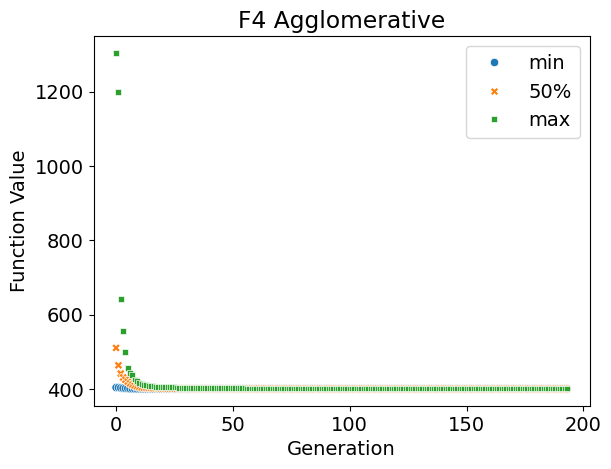

In [100]:
Plot_Min50Max(Agglomerative,Scale)

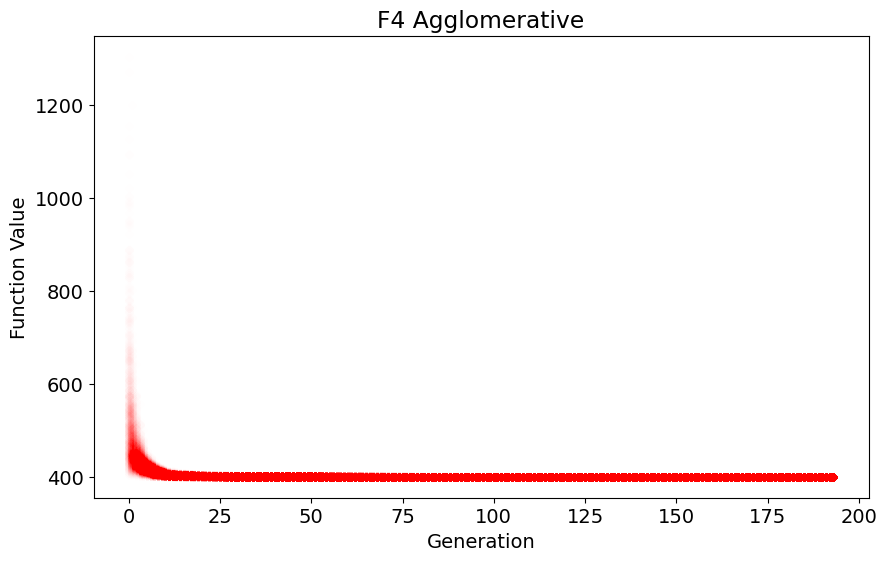

In [101]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [102]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [93]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0           1           2           3           4           5   \
0  553.365926  467.164882  413.320116  413.320116  413.320116  413.320116   
1  556.102737  556.102737  440.989517  440.989517  440.989517  440.989517   
2  522.774190  522.774190  440.216432  431.971719  431.971719  430.396878   
3  645.573938  632.463149  451.284747  425.828880  425.828880  420.582891   
4  587.267320  465.774044  428.141717  408.989506  408.989506  408.989506   
5  540.716613  432.984041  432.984041  432.984041  432.984041  422.876322   
6  840.452236  459.193945  459.193945  431.288489  431.288489  401.965932   
7  676.985309  573.912671  458.423674  458.423674  414.381746  414.381746   
8  411.334317  411.334317  411.334317  411.334317  411.334317  411.334317   
9  564.197326  493.678351  489.737372  457.433277  428.100208  428.100208   

           6           7           8           9   ...          41  \
0  412.170851  408.745926  408.745926  403.486208  ...  400.040517   
1  431.287529  424.449142  420.085309  406.329188  ...  400.332046   
2  430.396878  405.320400  405.320400  405.320400  ...  401.043317   
3  415.548265  405.171237  405.171237  405.171237  ...  400.400233   
4  408.989506  408.989506  408.989506  408.989506  ...  400.220787   
5  422.876322  422.181362  417.677851  409.867616  ...  400.283561   
6  401.965932  401.965932  401.965932  401.965932  ...  400.706463   
7  414.381746  414.381746  414.359152  402.278291  ...  400.035647   
8  411.334317  410.277671  405.464784  405.464784  ...  400.076512   
9  428.100208  424.116951  409.560457  409.560457  ...  400.096695   

           42          43          44          45          46          47  \
0  400.040517  400.040517  400.040517  400.040517  400.040517  400.040517   
1  400.332046  400.332046  400.332046  400.332046  400.332046  400.332046   
2  400.489176  400.094144  400.094144  400.094144  400.094144  400.094144   
3  400.400233  400.400233  400.400233  400.400233  400.400233  400.400233   
4  400.220787  400.220787  400.220787  400.220787  400.220787  400.220787   
5  400.283561  400.283561  400.283561  400.283561  400.283561  400.283561   
6  400.706463  400.706463  400.706463  400.706463  400.706463  400.706463   
7  400.035647  400.035647  400.035647  400.035647  400.035647  400.035647   
8  400.076512  400.076512  400.076512  400.076512  400.076512  400.076512   
9  400.096695  400.096695  400.096695  400.096695  400.096695  400.038290   

           48          49          50  
0  400.040517  400.040517  400.040517  
1  400.332046  400.332046  400.255106  
2  400.094144  400.094144  400.094144  
3  400.400233  400.400233  400.400233  
4  400.220787  400.220787  400.220787  
5  400.283561  400.283561  400.283561  
6  400.022191  400.022191  400.022191  
7  400.035647  400.035647  400.035647  
8  400.076512  400.076512  400.076512  
9  400.022302  400.022302  400.022302  

[10 rows x 51 columns]

In [94]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    541.739839   480.090879   449.782085   434.066818   424.994487   
std     118.940926    60.249246    35.985673    20.551970    13.785238   
min     403.844571   403.844571   401.292562   401.292562   400.879528   
25%     458.072299   436.657469   426.066332   420.741825   415.377455   
50%     507.573665   464.042355   440.120335   430.203262   423.396192   
75%     587.253895   504.702084   461.723547   441.899569   431.990503   
max    1262.321021   781.785654   756.537340   534.938330   525.418683   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    418.984373   414.999448   411.908833   409.174523   407.118797  ...   
std       9.506872     7.412786     6.039067     4.808783     3.880356  ...   
min     400.362907   400.362907   400.362907   400.362907   400.129067  ...   
25%     411.827174   409.435622   407.222090   405.504940   404.335807  ...   
50%     418.272457   414.262803   411.279895   408.583388   406.528941  ...   
75%     424.785470   419.935512   415.876436   412.305537   409.499090  ...   
max     459.539303   450.011136   433.353169   425.947267   422.341684  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    400.255785   400.238247   400.219951   400.207963   400.194584   
std       0.266918     0.249934     0.233441     0.227480     0.211063   
min     400.000007   400.000007   400.000007   400.000007   400.000007   
25%     400.066612   400.061534   400.057940   400.052013   400.050559   
50%     400.163386   400.153117   400.139500   400.128059   400.120505   
75%     400.332560   400.315465   400.296040   400.279159   400.261445   
max     401.185108   401.185108   401.138497   401.138497   401.128138   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    400.177451   400.167344   400.150825   400.140099   400.130063  
std       0.192911     0.184190     0.168383     0.156684     0.145528  
min     400.000007   400.000007   400.000007   400.000007   400.000007  
25%     400.049060   400.044415   400.040257   400.037686   400.034049  
50%     400.112334   400.105433   400.094253   400.091023   400.085404  
75%     400.227682   400.218402   400.201599   400.185669   400.168923  
max     401.074766   401.074766   401.040194   401.040194   401.040194  

[8 rows x 51 columns]

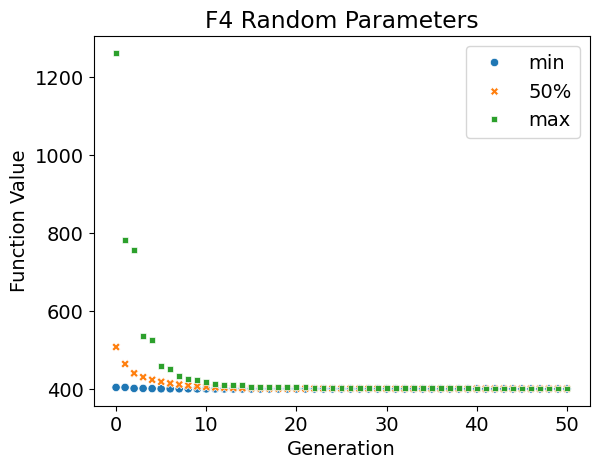

In [95]:
Plot_Min50Max(RandomParameters,Scale)

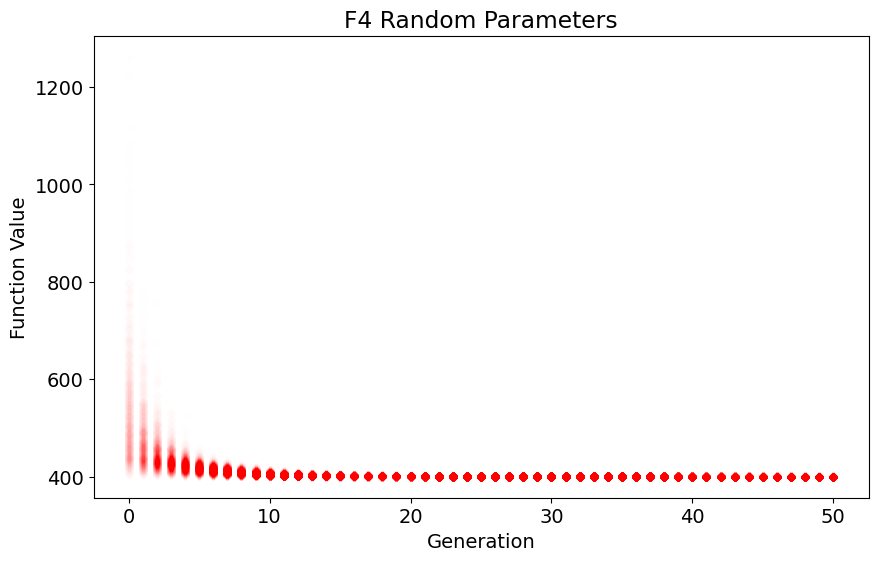

In [96]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [97]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 8

In [103]:
NumberFunction = '8'
Scale = 'linear'

## Function Plot

In [94]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

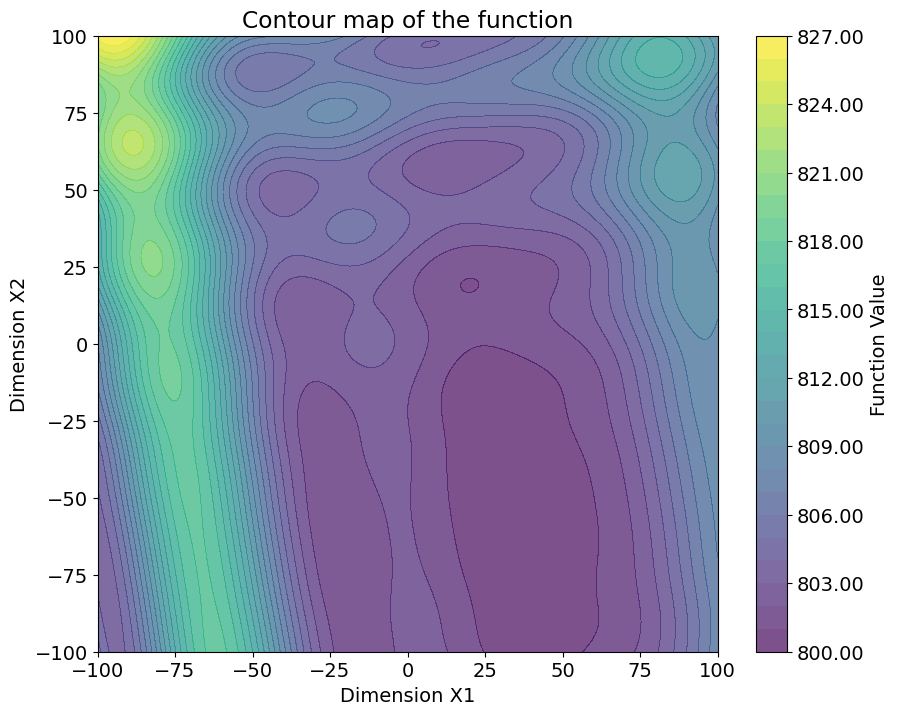

In [95]:
ObjectiveFunction(ndim=2).plot_2d(500)

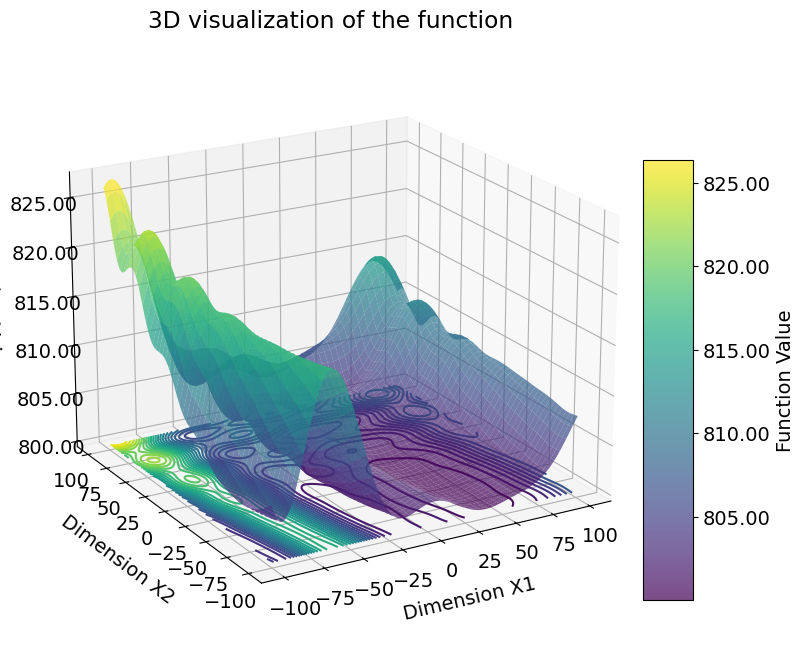

In [96]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [104]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0           1           2           3           4           5   \
0  800.006051  800.004262  800.004262  800.004262  800.004262  800.003794   
1  800.238488  800.122569  800.096728  800.042077  800.004167  800.000452   
2  800.111772  800.062649  800.011019  800.011019  800.004862  800.004862   
3  800.007917  800.007917  800.007917  800.007917  800.007917  800.007917   
4  800.202064  800.114402  800.083376  800.025258  800.025258  800.003740   
5  800.082751  800.082751  800.071672  800.071672  800.071672  800.003665   
6  800.108525  800.068720  800.008461  800.008461  800.008461  800.008461   
7  800.144060  800.144060  800.062533  800.019193  800.019193  800.000916   
8  800.146963  800.129957  800.022517  800.022517  800.010224  800.009472   
9  800.033559  800.033559  800.033559  800.021038  800.000426  800.000426   

           6           7           8           9   ...     41     42     43  \
0  800.003794  800.002601  800.000223  800.000223  ...  800.0  800.0  800.0   
1  800.000452  800.000452  800.000452  800.000452  ...  800.0  800.0  800.0   
2  800.000400  800.000400  800.000400  800.000098  ...  800.0  800.0  800.0   
3  800.007917  800.005071  800.000573  800.000573  ...  800.0  800.0  800.0   
4  800.001857  800.001356  800.001356  800.000476  ...  800.0  800.0  800.0   
5  800.003665  800.003665  800.000933  800.000153  ...  800.0  800.0  800.0   
6  800.004352  800.003405  800.003405  800.002078  ...  800.0  800.0  800.0   
7  800.000916  800.000420  800.000420  800.000420  ...  800.0  800.0  800.0   
8  800.007553  800.000599  800.000599  800.000599  ...  800.0  800.0  800.0   
9  800.000426  800.000426  800.000426  800.000426  ...  800.0  800.0  800.0   

      44     45     46     47     48     49     50  
0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
1  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
2  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
3  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
4  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
5  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
6  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
7  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
8  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
9  800.0  800.0  800.0  800.0  800.0  800.0  800.0  

[10 rows x 51 columns]

In [105]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    800.102242   800.055976   800.031438   800.017939   800.010428   
std       0.092208     0.058569     0.034394     0.020966     0.012894   
min     800.000056   800.000003   800.000003   800.000003   800.000003   
25%     800.029777   800.013783   800.007739   800.003900   800.002325   
50%     800.073741   800.035312   800.019556   800.011202   800.006085   
75%     800.155547   800.079243   800.043284   800.022898   800.013900   
max     800.702548   800.350968   800.222158   800.177034   800.133095   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    800.005652   800.003446   800.002056   800.001285   800.000768  ...   
std       0.006578     0.004364     0.002486     0.001555     0.000871  ...   
min     800.000002   800.000002   800.000002   800.000002   800.000000  ...   
25%     800.001394   800.000847   800.000523   800.000346   800.000198  ...   
50%     800.003427   800.002101   800.001304   800.000821   800.000478  ...   
75%     800.007315   800.004387   800.002604   800.001593   800.001063  ...   
max     800.041249   800.040493   800.025988   800.014558   800.007673  ...   

                 41            42            43            44            45  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
std    2.578893e-10  1.925799e-10  1.059157e-10  6.397433e-11  4.278555e-11   
min    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
25%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
50%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
75%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
max    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   

                 46            47            48            49            50  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean   8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
std    2.226712e-11  1.415613e-11  7.814584e-12  5.805029e-12  3.911977e-12  
min    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
25%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
50%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
75%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
max    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  

[8 rows x 51 columns]

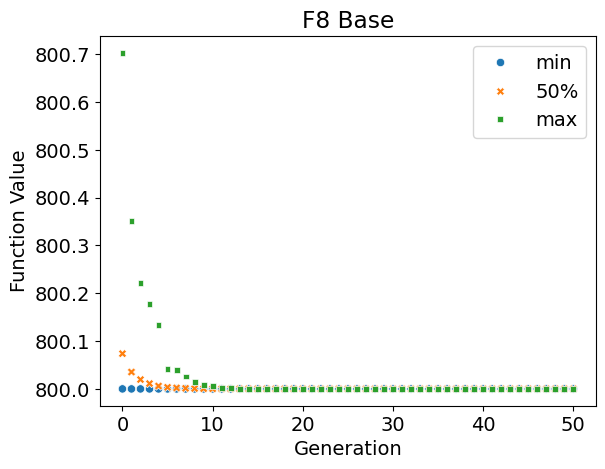

In [109]:
Plot_Min50Max(Base,Scale)

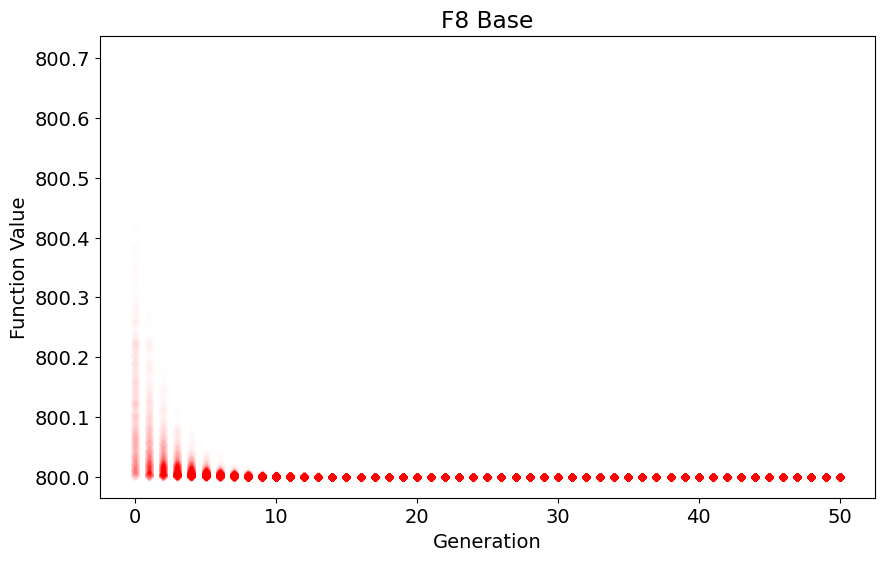

In [110]:
Plot_Generation_FunctionValues(Base,Scale)

In [111]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [122]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0           1           2           3           4           5    \
0  800.054653  800.054653  800.023376  800.023376  800.023376  800.003513   
1  800.203012  800.203012  800.203012  800.027357  800.007554  800.007554   
2  800.009401  800.009401  800.009401  800.009401  800.004152  800.000834   
3  800.268634  800.143115  800.024515  800.004678  800.004678  800.002031   
4  800.021085  800.021085  800.021085  800.021085  800.021085  800.008405   
5  800.166734  800.000472  800.000472  800.000472  800.000472  800.000472   
6  800.113801  800.113801  800.096628  800.069543  800.018920  800.018920   
7  800.103249  800.103249  800.064939  800.012080  800.012080  800.012080   
8  800.295026  800.093211  800.093211  800.093211  800.093211  800.066177   
9  800.087991  800.087991  800.035603  800.035603  800.035603  800.010597   

          6           7           8           9    ...  136  137  138  139  \
0  800.003513  800.000405  800.000405  800.000089  ...  NaN  NaN  NaN  NaN   
1  800.007554  800.000871  800.000871  800.000871  ...  NaN  NaN  NaN  NaN   
2  800.000834  800.000492  800.000492  800.000492  ...  NaN  NaN  NaN  NaN   
3  800.002031  800.001069  800.001069  800.001069  ...  NaN  NaN  NaN  NaN   
4  800.001213  800.001213  800.000840  800.000588  ...  NaN  NaN  NaN  NaN   
5  800.000472  800.000472  800.000472  800.000111  ...  NaN  NaN  NaN  NaN   
6  800.006449  800.006449  800.001357  800.001357  ...  NaN  NaN  NaN  NaN   
7  800.012080  800.000248  800.000248  800.000248  ...  NaN  NaN  NaN  NaN   
8  800.006074  800.002089  800.002089  800.000542  ...  NaN  NaN  NaN  NaN   
9  800.010597  800.008066  800.001894  800.001553  ...  NaN  NaN  NaN  NaN   

   140  141  142  143  144  145  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 146 columns]

In [123]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    800.105873   800.058957   800.034791   800.019098   800.010841   
std       0.093118     0.059695     0.037278     0.022733     0.012648   
min     800.000177   800.000177   800.000010   800.000007   800.000007   
25%     800.029237   800.015146   800.008425   800.004301   800.002596   
50%     800.079455   800.039580   800.023206   800.011530   800.006361   
75%     800.165974   800.080182   800.048298   800.025045   800.014860   
max     800.500362   800.500362   800.249682   800.216757   800.104122   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    800.006208   800.003564   800.002207   800.001300   800.000788  ...   
std       0.007270     0.004115     0.002725     0.001417     0.000854  ...   
min     800.000000   800.000000   800.000000   800.000000   800.000000  ...   
25%     800.001477   800.000875   800.000566   800.000322   800.000203  ...   
50%     800.003709   800.002252   800.001377   800.000821   800.000509  ...   
75%     800.008373   800.004672   800.002899   800.001806   800.001044  ...   
max     800.066177   800.038029   800.030901   800.008636   800.007563  ...   

         136    137    138    139    140    141    142    143    144    145  
count    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
mean   800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
std      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
min    800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
25%    800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
50%    800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
75%    800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
max    800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  

[8 rows x 146 columns]

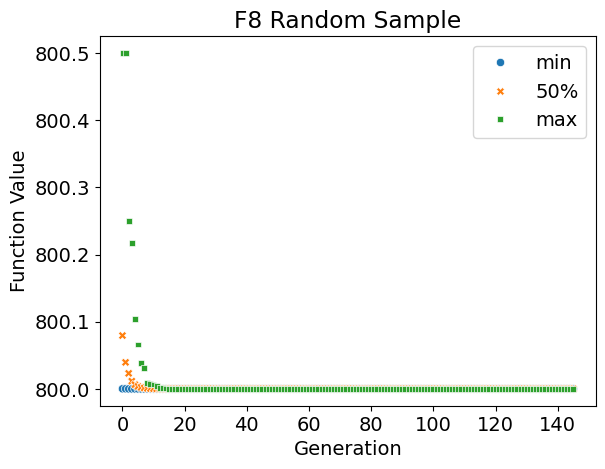

In [124]:
Plot_Min50Max(RandomSample,Scale)

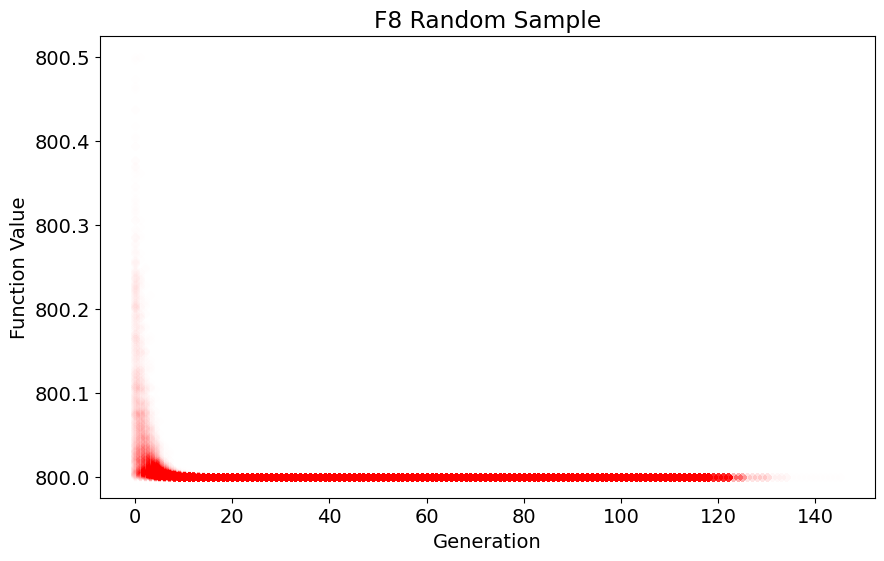

In [125]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [ ]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=72, description='generation', max=145), Output()), _dom_classes=('widget…

## Agglomerative

In [117]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0           1           2           3           4           5    \
0  800.224952  800.224952  800.015365  800.015365  800.007424  800.006528   
1  800.030671  800.030671  800.030671  800.030671  800.030671  800.008966   
2  800.170891  800.000890  800.000890  800.000890  800.000890  800.000890   
3  800.000981  800.000981  800.000981  800.000981  800.000981  800.000981   
4  800.074539  800.074539  800.050900  800.050900  800.019203  800.008335   
5  800.042398  800.042398  800.002882  800.002882  800.002882  800.002882   
6  800.006775  800.006775  800.006775  800.006775  800.006775  800.006775   
7  800.163265  800.060358  800.005380  800.005380  800.005380  800.001491   
8  800.061724  800.061724  800.010355  800.007016  800.007016  800.002325   
9  800.032417  800.032417  800.004949  800.004949  800.004949  800.004949   

          6           7           8           9    ...    184    185    186  \
0  800.006144  800.003594  800.001856  800.001579  ...  800.0  800.0  800.0   
1  800.002207  800.000438  800.000438  800.000126  ...  800.0  800.0  800.0   
2  800.000890  800.000890  800.000890  800.000890  ...  800.0  800.0  800.0   
3  800.000981  800.000981  800.000981  800.000654  ...  800.0  800.0  800.0   
4  800.008335  800.004907  800.003131  800.000135  ...  800.0  800.0  800.0   
5  800.002882  800.002882  800.002882  800.000021  ...  800.0  800.0  800.0   
6  800.001102  800.001102  800.000359  800.000359  ...  800.0  800.0  800.0   
7  800.001491  800.000825  800.000375  800.000375  ...  800.0  800.0  800.0   
8  800.000918  800.000918  800.000584  800.000159  ...  800.0  800.0  800.0   
9  800.002055  800.000756  800.000756  800.000756  ...  800.0  800.0  800.0   

     187    188    189    190    191    192    193  
0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
1  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
2  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
3  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
4  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
5  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
6  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
7  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
8  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
9  800.0  800.0  800.0  800.0  800.0  800.0  800.0  

[10 rows x 194 columns]

In [118]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    800.106020   800.058372   800.032725   800.018763   800.011139   
std       0.096525     0.058761     0.036386     0.022187     0.013616   
min     800.000084   800.000033   800.000033   800.000006   800.000006   
25%     800.028900   800.013493   800.007457   800.004333   800.002789   
50%     800.077375   800.039456   800.020764   800.011438   800.006937   
75%     800.164438   800.083743   800.044296   800.025165   800.014248   
max     800.699245   800.351865   800.240237   800.231718   800.166287   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    800.006320   800.003699   800.002214   800.001362   800.000825  ...   
std       0.007098     0.004054     0.002581     0.001542     0.000962  ...   
min     800.000006   800.000000   800.000000   800.000000   800.000000  ...   
25%     800.001754   800.000921   800.000580   800.000363   800.000212  ...   
50%     800.004150   800.002322   800.001424   800.000829   800.000537  ...   
75%     800.008576   800.004964   800.002882   800.001833   800.001044  ...   
max     800.075213   800.030183   800.023862   800.012152   800.008516  ...   

          184     185     186     187     188     189     190     191     192  \
count  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean    800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min     800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   
25%     800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   
50%     800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   
75%     800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   
max     800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   800.0   

          193  
count  1000.0  
mean    800.0  
std       0.0  
min     800.0  
25%     800.0  
50%     800.0  
75%     800.0  
max     800.0  

[8 rows x 194 columns]

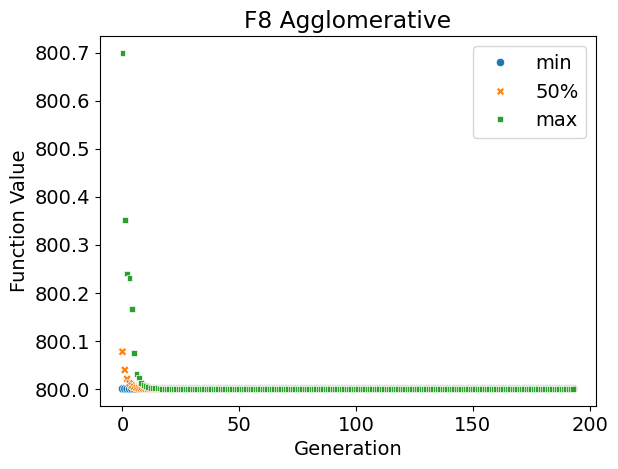

In [ ]:
Plot_Min50Max(Agglomerative,Scale)

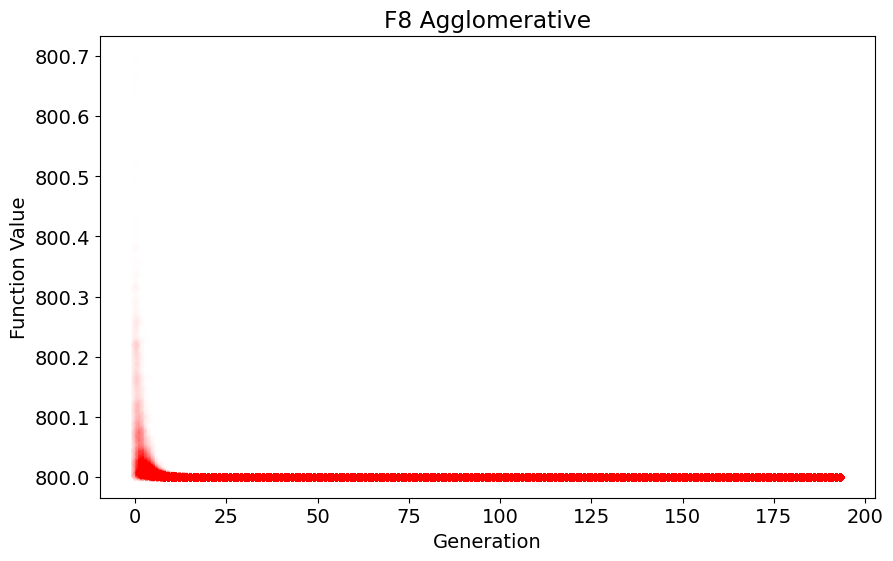

In [ ]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [ ]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [112]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0           1           2           3           4           5   \
0  800.053573  800.053573  800.024193  800.019849  800.006250  800.006250   
1  800.133007  800.010535  800.010535  800.010535  800.010535  800.000867   
2  800.244231  800.018403  800.013959  800.013959  800.006600  800.000754   
3  800.044874  800.044874  800.011995  800.011995  800.011995  800.008269   
4  800.178831  800.178831  800.044919  800.044919  800.010364  800.010364   
5  800.188156  800.104594  800.036538  800.004307  800.002350  800.000682   
6  800.054876  800.054876  800.054876  800.054876  800.007285  800.000442   
7  800.055828  800.055828  800.027919  800.027919  800.012615  800.003602   
8  800.097986  800.071765  800.049838  800.034709  800.003733  800.003733   
9  800.106866  800.042756  800.042756  800.005985  800.005985  800.002264   

           6           7           8           9   ...     41     42     43  \
0  800.001409  800.001409  800.001206  800.001206  ...  800.0  800.0  800.0   
1  800.000867  800.000105  800.000105  800.000105  ...  800.0  800.0  800.0   
2  800.000754  800.000754  800.000754  800.000754  ...  800.0  800.0  800.0   
3  800.003122  800.001369  800.000204  800.000204  ...  800.0  800.0  800.0   
4  800.010364  800.010364  800.001618  800.001618  ...  800.0  800.0  800.0   
5  800.000682  800.000682  800.000682  800.000682  ...  800.0  800.0  800.0   
6  800.000442  800.000442  800.000442  800.000069  ...  800.0  800.0  800.0   
7  800.002087  800.002087  800.001057  800.001057  ...  800.0  800.0  800.0   
8  800.000193  800.000193  800.000116  800.000116  ...  800.0  800.0  800.0   
9  800.002264  800.002264  800.000707  800.000135  ...  800.0  800.0  800.0   

      44     45     46     47     48     49     50  
0  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
1  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
2  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
3  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
4  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
5  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
6  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
7  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
8  800.0  800.0  800.0  800.0  800.0  800.0  800.0  
9  800.0  800.0  800.0  800.0  800.0  800.0  800.0  

[10 rows x 51 columns]

In [113]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    800.100503   800.054998   800.030530   800.017613   800.009937   
std       0.086554     0.056092     0.035280     0.021330     0.011638   
min     800.000137   800.000047   800.000006   800.000006   800.000006   
25%     800.031074   800.013407   800.007089   800.003972   800.002546   
50%     800.074640   800.036041   800.018340   800.010622   800.006155   
75%     800.155748   800.077901   800.041627   800.022476   800.012868   
max     800.530829   800.318774   800.259033   800.196045   800.103943   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    800.005724   800.003293   800.002006   800.001266   800.000802  ...   
std       0.006771     0.004139     0.002157     0.001372     0.000945  ...   
min     800.000006   800.000004   800.000004   800.000002   800.000001  ...   
25%     800.001295   800.000742   800.000510   800.000328   800.000181  ...   
50%     800.003537   800.002025   800.001295   800.000773   800.000498  ...   
75%     800.007427   800.004248   800.002842   800.001747   800.001032  ...   
max     800.049230   800.043477   800.020770   800.009483   800.008508  ...   

                 41            42            43            44            45  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
std    2.697594e-10  1.731358e-10  1.246505e-10  8.851678e-11  4.144863e-11   
min    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
25%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
50%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
75%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
max    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   

                 46            47            48            49            50  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean   8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
std    2.787446e-11  1.873949e-11  1.102956e-11  6.567719e-12  4.569711e-12  
min    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
25%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
50%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
75%    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  
max    8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  

[8 rows x 51 columns]

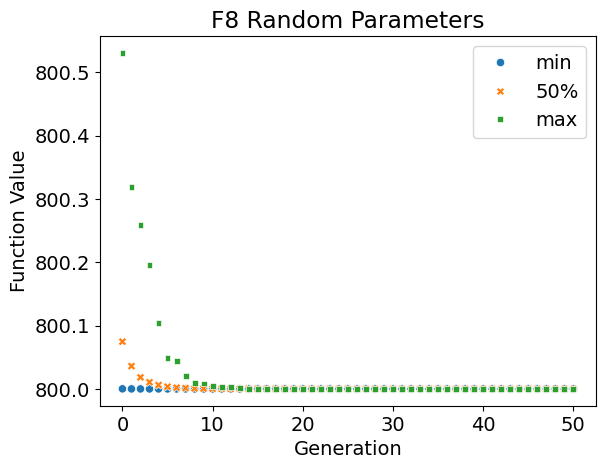

In [ ]:
Plot_Min50Max(RandomParameters,Scale)

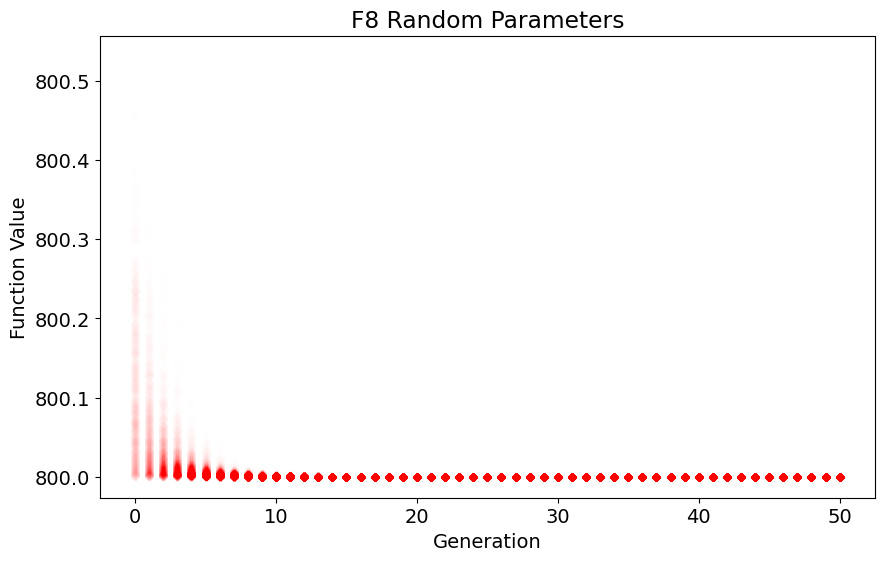

In [ ]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [ ]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 9

In [127]:
NumberFunction = '9'
Scale = 'linear'

## Function Plot

In [9]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

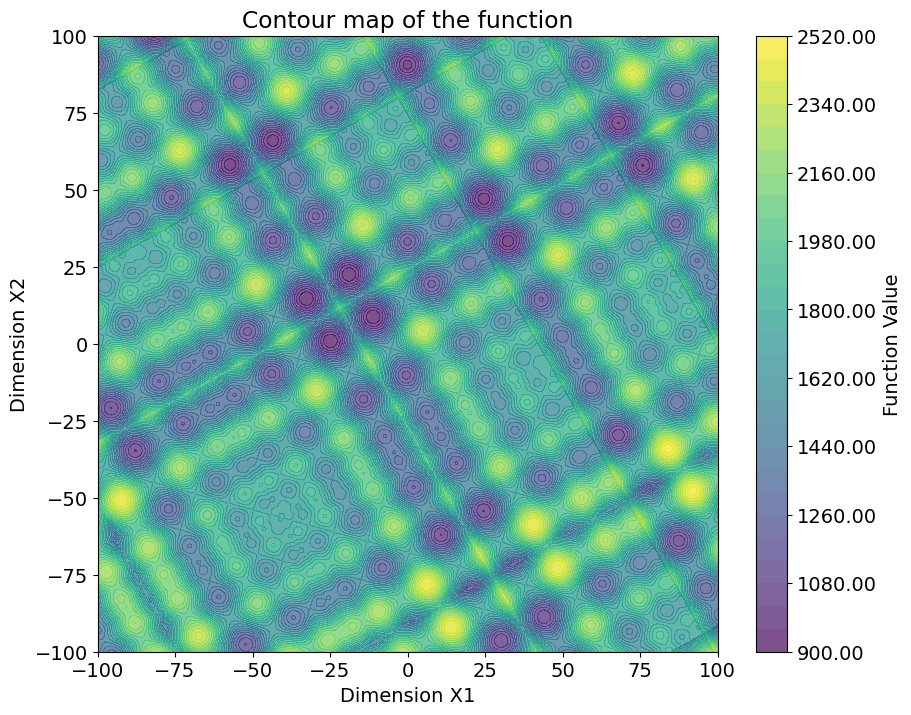

In [10]:
ObjectiveFunction(ndim=2).plot_2d(500)

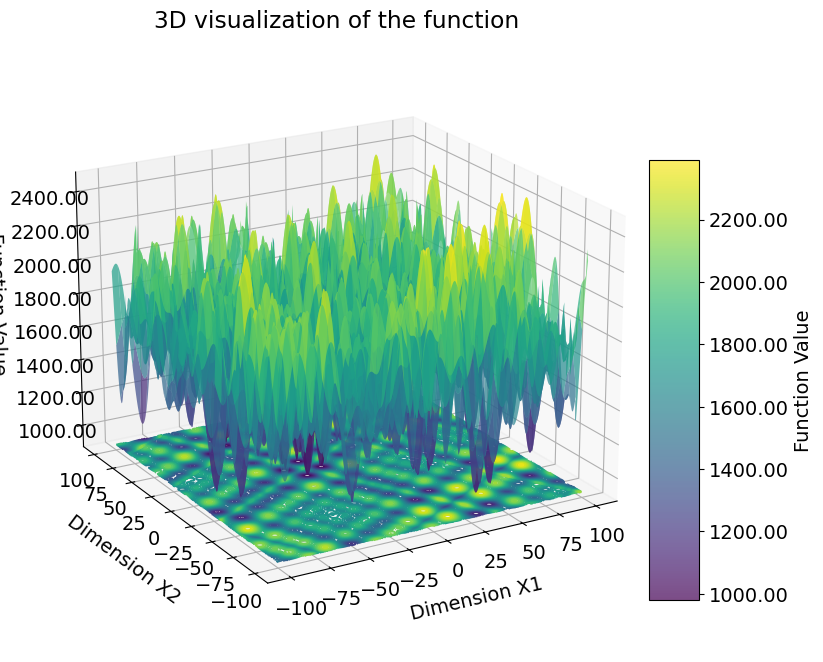

In [11]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [25]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0            1            2            3            4   \
0  1132.505601   933.774637   933.774637   933.774637   933.774637   
1   948.840393   948.840393   948.840393   948.840393   948.840393   
2  1125.011391  1125.011391  1100.315202  1030.499116  1030.499116   
3   998.117018   998.117018   998.117018   973.210627   973.210627   
4   961.987637   961.987637   961.987637   961.987637   961.987637   
5   955.968214   912.285688   912.285688   912.285688   912.285688   
6  1043.658112  1043.658112   918.487992   918.487992   918.487992   
7  1101.495819  1101.495819   984.360244   984.360244   984.360244   
8   988.898689   988.898689   988.898689   971.787642   971.787642   
9  1012.542622   980.787206   980.787206   980.215462   980.215462   

            5           6           7           8           9   ...  \
0   933.774637  933.774637  933.774637  933.774637  933.774637  ...   
1   947.888463  947.888463  947.888463  947.888463  947.888463  ...   
2  1029.827303  929.442612  929.442612  929.442612  929.442612  ...   
3   973.210627  973.210627  973.210627  973.210627  973.210627  ...   
4   961.987637  920.667239  920.667239  920.667239  920.667239  ...   
5   912.285688  912.285688  912.285688  912.285688  912.285688  ...   
6   918.487992  918.487992  918.487992  918.487992  905.074452  ...   
7   984.360244  984.360244  984.360244  984.360244  966.075688  ...   
8   948.069809  948.069809  948.069809  909.100872  909.100872  ...   
9   980.215462  980.215462  980.215462  920.325061  920.325061  ...   

           41          42          43          44          45          46  \
0  903.819502  903.819502  903.819502  903.819502  903.819502  903.819502   
1  902.403941  902.403941  902.403941  902.403941  902.403941  902.403941   
2  910.317473  910.317473  910.317473  910.317473  910.317473  910.317473   
3  903.529482  903.529482  903.529482  903.529482  903.529482  903.529482   
4  903.755899  903.755899  903.755899  903.755899  903.755899  903.755899   
5  911.113142  911.113142  911.113142  911.113142  911.113142  911.113142   
6  905.074452  905.074452  905.074452  905.074452  905.074452  905.074452   
7  902.066367  902.066367  902.066367  902.066367  902.066367  902.066367   
8  903.598687  903.598687  903.598687  903.598687  903.598687  903.598687   
9  901.796273  901.796273  901.796273  901.796273  901.796273  901.796273   

           47          48          49          50  
0  903.819502  903.819502  903.819502  903.819502  
1  902.403941  902.403941  902.403941  902.403941  
2  910.317473  910.317473  910.317473  910.317473  
3  903.529482  903.529482  903.529482  903.529482  
4  903.755899  903.755899  903.755899  901.762082  
5  911.039504  911.039504  911.039504  911.039504  
6  905.074452  905.074452  905.074452  905.074452  
7  902.066367  902.066367  902.066367  902.066367  
8  903.598687  903.598687  903.598687  903.598687  
9  901.796273  901.796273  901.796273  901.796273  

[10 rows x 51 columns]

In [13]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1026.280862   981.980077   964.994683   953.510327   946.697389   
std      76.215663    55.114888    44.413507    37.581466    34.021471   
min     901.143757   900.026393   900.026393   900.026393   900.026393   
25%     963.169855   938.094634   931.253683   924.730188   921.569546   
50%    1019.127120   970.198103   957.398595   945.565675   939.364754   
75%    1080.025452  1017.998807   992.309151   974.290910   964.296573   
max    1262.846689  1192.549790  1118.947703  1106.380649  1084.679216   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    940.986519   936.678705   931.836842   929.312947   926.733937  ...   
std      30.663658    27.460348    23.820017    21.804465    20.192959  ...   
min     900.026393   900.026393   900.026393   900.026393   900.024816  ...   
25%     918.833111   917.345303   914.940804   913.778027   911.850927  ...   
50%     934.146738   930.144594   926.658748   924.432678   922.596538  ...   
75%     957.591185   950.995958   943.503403   940.040476   936.745298  ...   
max    1084.679216  1053.146085  1053.146085  1026.403981  1026.403981  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    905.543384   905.385201   905.152570   905.001519   904.827975   
std       5.445952     5.304563     5.121166     4.961931     4.875001   
min     900.015037   900.002634   900.002634   900.002634   900.002634   
25%     901.669214   901.634038   901.567652   901.510200   901.445034   
50%     903.582248   903.510777   903.425157   903.336007   903.222098   
75%     907.449238   907.189373   906.694982   906.566959   906.287850   
max     928.536747   928.536747   928.536747   928.536747   928.063859   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    904.657546   904.522066   904.427102   904.258391   904.122577  
std       4.726902     4.622544     4.524896     4.324569     4.250219  
min     900.002634   900.002634   900.002634   900.002634   900.002634  
25%     901.410844   901.387826   901.371103   901.344925   901.307693  
50%     903.093568   902.983760   902.930394   902.848688   902.719816  
75%     905.987214   905.828907   905.725839   905.307202   905.083653  
max     928.023464   928.023464   928.023464   925.504755   925.504755  

[8 rows x 51 columns]

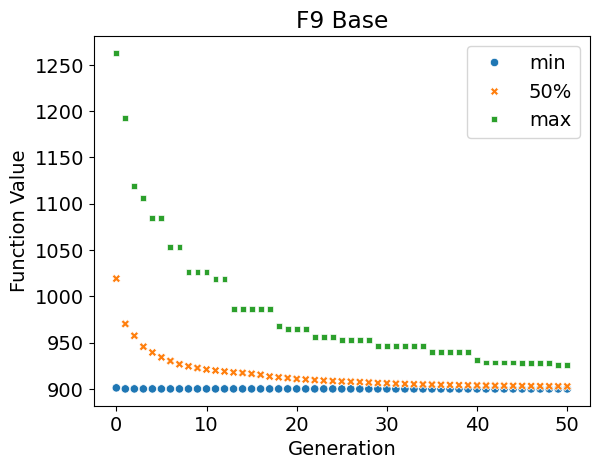

In [27]:
Plot_Min50Max(Base,Scale)

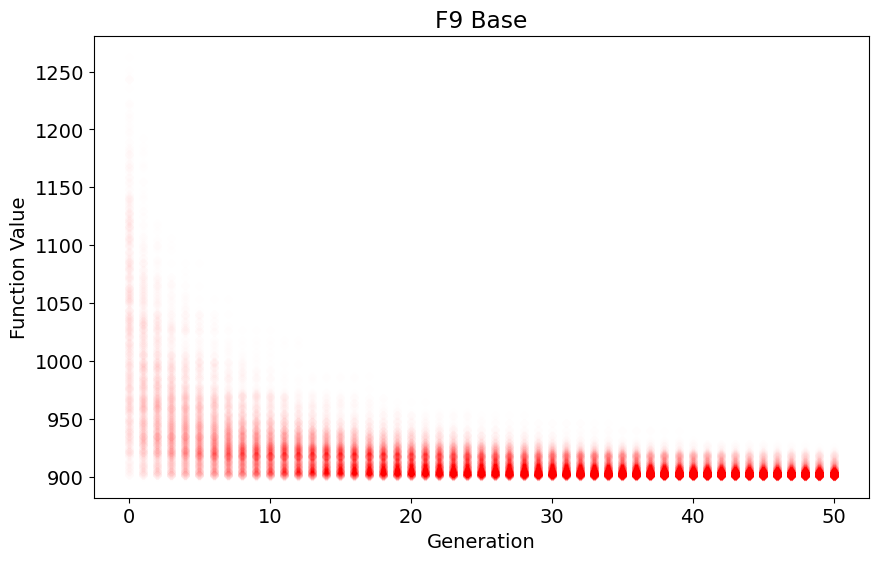

In [28]:
Plot_Generation_FunctionValues(Base,Scale)

In [29]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [30]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0            1           2           3           4           5    \
0  1203.922828  1022.081577  980.464034  980.464034  980.464034  980.464034   
1   972.928684   972.928684  972.928684  972.928684  972.928684  949.159203   
2   927.040012   927.040012  927.040012  927.040012  923.472476  923.472476   
3  1011.810493  1000.091767  981.600672  981.600672  981.600672  939.030042   
4   968.632764   963.063390  911.518520  911.518520  911.518520  911.518520   
5   997.883522   969.307494  969.307494  922.827068  922.827068  922.827068   
6   969.878194   969.878194  969.878194  969.878194  969.878194  969.878194   
7  1053.467248  1053.467248  928.403282  928.403282  928.403282  928.403282   
8   999.845474   936.449992  936.449992  933.877062  933.877062  933.877062   
9  1001.889997   977.336281  977.336281  977.336281  958.699243  958.699243   

          6           7           8           9    ...  116  117  118  119  \
0  980.464034  980.464034  980.464034  939.804597  ...  NaN  NaN  NaN  NaN   
1  949.159203  949.159203  943.134132  943.134132  ...  NaN  NaN  NaN  NaN   
2  923.472476  923.472476  923.472476  923.472476  ...  NaN  NaN  NaN  NaN   
3  920.852262  920.852262  920.852262  920.852262  ...  NaN  NaN  NaN  NaN   
4  911.518520  911.518520  911.518520  911.518520  ...  NaN  NaN  NaN  NaN   
5  922.827068  922.827068  922.827068  922.827068  ...  NaN  NaN  NaN  NaN   
6  969.878194  969.878194  969.878194  969.365429  ...  NaN  NaN  NaN  NaN   
7  928.403282  928.403282  928.403282  928.403282  ...  NaN  NaN  NaN  NaN   
8  933.877062  933.877062  933.877062  933.877062  ...  NaN  NaN  NaN  NaN   
9  920.877198  920.877198  920.877198  920.877198  ...  NaN  NaN  NaN  NaN   

   120  121  122  123  124  125  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 126 columns]

In [31]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1026.997526   986.104627   965.532190   953.752877   946.351680   
std      77.429955    57.083481    45.669540    39.744062    34.579948   
min     900.966567   900.966567   900.828636   900.552662   900.346034   
25%     964.872606   938.889977   928.668074   921.820989   919.491138   
50%    1022.463833   976.811504   956.678802   944.096691   937.549393   
75%    1076.310489  1025.511899   995.028947   978.369088   965.750106   
max    1312.176979  1237.455367  1142.090093  1116.813182  1080.026373   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    940.382721   935.889857   932.154583   929.491401   926.684601  ...   
std      30.807372    27.821530    25.552511    24.009738    21.899922  ...   
min     900.346034   900.346034   900.346034   900.026170   900.026170  ...   
25%     917.402045   915.772677   912.819812   911.617877   910.457862  ...   
50%     933.628740   929.796358   926.228258   923.371904   921.558844  ...   
75%     956.766612   949.398837   943.845479   940.436285   936.663484  ...   
max    1080.026373  1070.032195  1070.032195  1032.306583  1029.592267  ...   

              116         117         118         119         120         121  \
count   32.000000   32.000000   32.000000   10.000000   10.000000   10.000000   
mean   902.048216  901.985371  901.980262  901.285170  901.221147  901.207461   
std      4.182949    4.130714    4.132424    1.507742    1.517944    1.522856   
min    900.000235  900.000152  900.000152  900.108389  900.108389  900.108389   
25%    900.312913  900.312912  900.312912  900.312504  900.312504  900.312186   
50%    900.624348  900.624347  900.598932  900.658383  900.625405  900.625405   
75%    901.508707  901.374389  901.374389  901.294493  901.001688  900.967790   
max    921.405267  921.405267  921.405267  904.466326  904.466326  904.466326   

              122         123         124         125  
count   10.000000    2.000000    2.000000    2.000000  
mean   901.191253  900.377360  900.377360  900.377360  
std      1.530827    0.092188    0.092188    0.092188  
min    900.108389  900.312173  900.312173  900.312173  
25%    900.312186  900.344767  900.344767  900.344767  
50%    900.544366  900.377360  900.377360  900.377360  
75%    900.967790  900.409953  900.409953  900.409953  
max    904.466326  900.442547  900.442547  900.442547  

[8 rows x 126 columns]

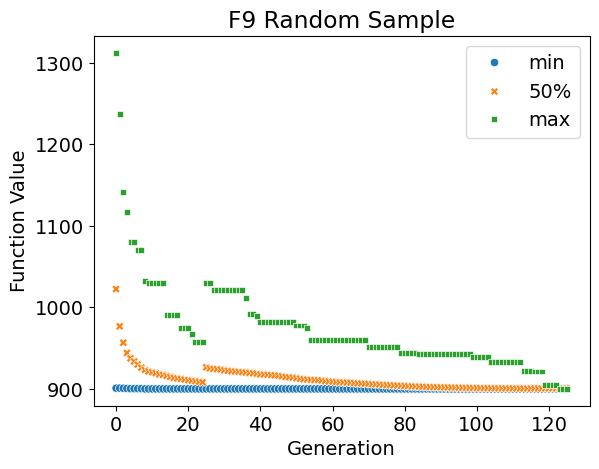

In [32]:
Plot_Min50Max(RandomSample,Scale)

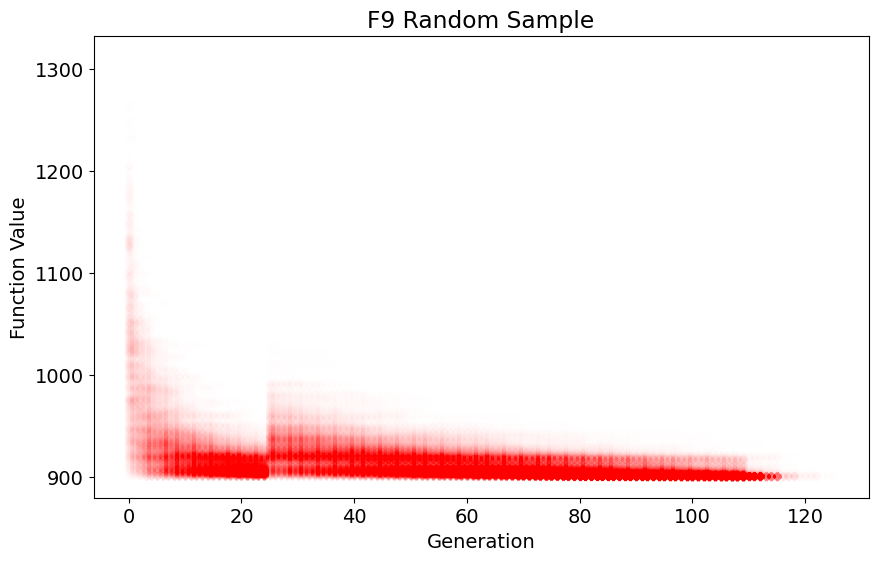

In [33]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [34]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=62, description='generation', max=125), Output()), _dom_classes=('widget…

## Agglomerative

In [35]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0            1            2            3            4    \
0   926.680177   926.680177   926.680177   926.680177   906.761843   
1   922.188932   922.188932   922.188932   922.188932   922.188932   
2  1034.711927  1001.520647  1001.520647  1001.520647   936.887384   
3  1090.599393   906.774061   906.774061   906.774061   906.774061   
4  1012.580856  1012.580856  1012.580856  1012.580856  1012.580856   
5  1007.643604  1007.643604  1007.643604  1002.578186   962.921116   
6  1061.157044   942.628480   942.628480   942.628480   942.628480   
7  1049.595360  1049.595360  1049.595360  1049.595360  1020.426060   
8  1011.567447   976.817134   976.817134   938.623933   938.623933   
9  1018.123903  1018.123903  1018.123903  1016.001146   924.383066   

           5            6            7            8            9    ...  \
0   906.761843   906.761843   906.761843   906.761843   906.761843  ...   
1   922.188932   922.188932   922.188932   922.188932   922.188932  ...   
2   936.887384   936.887384   936.887384   936.887384   936.887384  ...   
3   906.774061   906.774061   906.774061   906.774061   906.774061  ...   
4  1012.580856  1012.580856  1012.580856  1012.580856  1012.580856  ...   
5   962.921116   962.921116   962.921116   962.921116   919.297540  ...   
6   928.363589   928.363589   928.363589   928.363589   909.445207  ...   
7  1020.426060  1003.164201  1003.164201  1003.164201  1003.164201  ...   
8   938.623933   938.623933   938.623933   938.623933   938.623933  ...   
9   924.383066   924.383066   924.383066   924.383066   924.383066  ...   

          184         185         186         187         188         189  \
0  900.000001  900.000001  900.000001  900.000001  900.000001  900.000001   
1  901.137321  901.137321  901.137321  901.137321  901.137321  901.137321   
2  900.000000  900.000000  900.000000  900.000000  900.000000  900.000000   
3  900.312173  900.312173  900.312173  900.312173  900.312173  900.312173   
4  900.898677  900.898677  900.898677  900.779570  900.779570  900.779570   
5  900.333848  900.192484  900.178000  900.178000  900.148453  900.110148   
6  900.312173  900.312173  900.312173  900.312173  900.312173  900.312173   
7  900.329629  900.329571  900.329566  900.329505  900.329505  900.329505   
8  900.624347  900.624347  900.624347  900.624347  900.624347  900.624347   
9  902.557526  902.557526  902.557526  902.557526  902.557526  902.557526   

          190         191         192         193  
0  900.000000  900.000000  900.000000  900.000000  
1  901.137321  901.137321  901.137321  901.137321  
2  900.000000  900.000000  900.000000  900.000000  
3  900.312173  900.312173  900.312173  900.312173  
4  900.754891  900.671902  900.633516  900.633516  
5  900.074743  900.065018  900.065018  900.065018  
6  900.312173  900.312173  900.312173  900.312173  
7  900.329492  900.329492  900.329455  900.329412  
8  900.624347  900.624347  900.624347  900.624347  
9  902.557526  902.557526  902.557526  902.557526  

[10 rows x 194 columns]

In [36]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1025.835859   982.257142   963.322102   952.429344   943.818512   
std      76.665806    55.417608    45.667689    38.703804    32.744766   
min     900.479663   900.479663   900.452135   900.452135   900.409834   
25%     960.922140   937.733589   927.891000   922.767276   919.796056   
50%    1022.179066   972.433856   952.519254   943.627790   936.907719   
75%    1079.023796  1022.469665   988.612057   972.941329   960.895828   
max    1262.855520  1166.786355  1131.692091  1131.692091  1074.953252   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    938.143854   933.871877   930.361601   928.022226   925.738890  ...   
std      28.999126    25.463587    23.272728    21.536094    20.029232  ...   
min     900.409834   900.345435   900.345435   900.345435   900.345435  ...   
25%     917.091941   914.649089   912.534452   911.388520   909.854846  ...   
50%     931.938182   928.694905   926.047793   923.903374   921.921381  ...   
75%     952.300341   947.485566   942.054161   938.888896   935.453572  ...   
max    1071.999414  1041.108206  1032.168024  1032.168024  1018.192839  ...   

               184          185          186          187          188  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    901.384412   901.365952   901.347656   901.331041   901.299519   
std       3.307257     3.262884     3.241355     3.232829     3.153782   
min     900.000000   900.000000   900.000000   900.000000   900.000000   
25%     900.312173   900.312173   900.312173   900.312173   900.312173   
50%     900.312179   900.312177   900.312175   900.312174   900.312174   
75%     900.624351   900.624348   900.624347   900.624347   900.624347   
max     922.948501   922.948501   922.948501   922.948501   921.783253   

               189          190          191          192          193  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    901.291302   901.285108   901.277047   901.264811   901.264317  
std       3.152148     3.145090     3.139810     3.131292     3.131263  
min     900.000000   900.000000   900.000000   900.000000   900.000000  
25%     900.312173   900.312173   900.312173   900.312173   900.312173  
50%     900.312174   900.312173   900.312173   900.312173   900.312173  
75%     900.624347   900.624347   900.624347   900.624347   900.624347  
max     921.783253   921.783253   921.783253   921.783253   921.783253  

[8 rows x 194 columns]

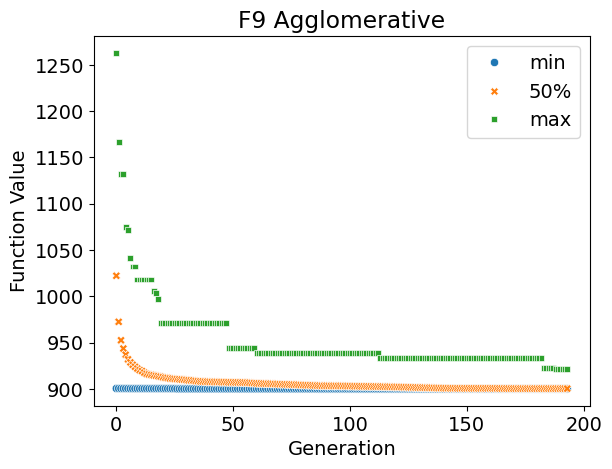

In [37]:
Plot_Min50Max(Agglomerative,Scale)

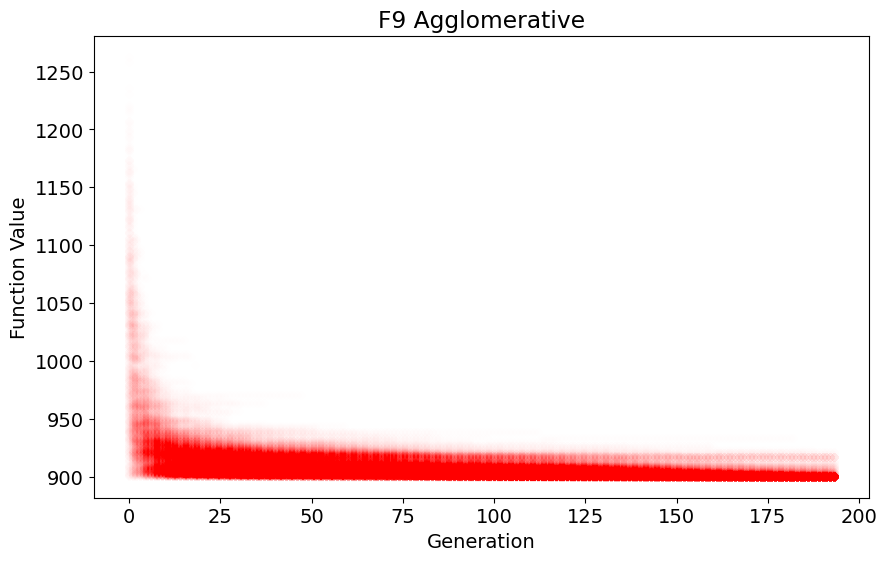

In [38]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [39]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [40]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0            1            2            3           4           5   \
0   997.276127   997.276127   967.138090   967.138090  967.138090  967.138090   
1  1041.133374  1041.133374   970.176234   970.176234  970.176234  970.176234   
2   936.307781   936.307781   936.307781   936.307781  936.307781  936.307781   
3  1140.997027  1140.997027  1046.977788   908.746227  908.746227  908.746227   
4  1055.817988  1055.817988  1015.298281  1015.298281  926.173699  926.173699   
5  1099.719379  1059.549379  1026.347907  1026.347907  926.614295  926.614295   
6   934.543530   934.543530   934.543530   934.543530  934.543530  934.543530   
7   924.640073   924.640073   924.640073   924.640073  924.640073  924.640073   
8  1147.447615   946.981992   946.981992   946.981992  946.981992  946.981992   
9  1148.995742  1086.951514  1030.605885  1030.605885  907.835291  907.835291   

           6           7           8           9   ...          41  \
0  967.138090  967.138090  947.315778  947.315778  ...  901.707050   
1  970.176234  970.176234  970.176234  970.176234  ...  904.915137   
2  936.307781  936.307781  936.307781  936.307781  ...  911.984282   
3  908.746227  908.746227  908.746227  908.746227  ...  908.746227   
4  926.173699  926.173699  926.173699  926.173699  ...  912.317701   
5  926.614295  926.614295  926.614295  926.614295  ...  901.507625   
6  934.543530  934.543530  930.235956  925.759394  ...  900.752372   
7  924.640073  924.640073  924.640073  924.640073  ...  918.052154   
8  946.981992  946.981992  909.936711  909.936711  ...  903.751270   
9  907.835291  907.835291  907.835291  907.835291  ...  906.162520   

           42          43          44          45          46          47  \
0  901.707050  901.707050  901.707050  901.707050  901.707050  901.707050   
1  904.915137  904.851186  904.851186  904.851186  904.851186  904.851186   
2  911.984282  911.984282  911.984282  911.984282  911.984282  911.984282   
3  908.746227  904.857010  904.857010  904.857010  904.857010  904.857010   
4  912.317701  901.068947  901.068947  901.068947  901.068947  901.068947   
5  901.507625  901.507625  901.507625  901.507625  901.507625  901.507625   
6  900.752372  900.752372  900.752372  900.752372  900.752372  900.752372   
7  918.052154  918.052154  918.052154  918.052154  918.052154  918.052154   
8  903.751270  903.751270  903.751270  903.751270  903.751270  903.751270   
9  906.162520  906.162520  906.162520  906.162520  906.162520  906.162520   

           48          49          50  
0  901.707050  901.707050  901.707050  
1  904.851186  904.851186  904.851186  
2  911.984282  911.984282  911.919239  
3  904.857010  904.857010  904.857010  
4  901.068947  901.068947  901.068947  
5  901.507625  901.507625  901.507625  
6  900.752372  900.752372  900.752372  
7  918.052154  918.052154  918.052154  
8  903.751270  903.751270  903.751270  
9  906.162520  906.162520  906.162520  

[10 rows x 51 columns]

In [41]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1023.006119   984.662112   965.712671   954.738740   946.660577   
std      75.830133    57.946911    45.271341    39.523382    34.329985   
min     900.624531   900.256957   900.256957   900.256957   900.256957   
25%     961.428405   938.259191   929.813886   924.223074   920.578198   
50%    1016.482056   972.806888   957.345283   944.994884   938.861193   
75%    1073.403977  1022.025661   993.022816   975.754431   965.279542   
max    1287.540027  1223.486286  1144.452687  1126.300811  1079.040687   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    940.425033   935.431729   931.829667   928.861076   926.237867  ...   
std      29.733011    26.305767    23.595145    22.316251    20.791207  ...   
min     900.256957   900.256957   900.180962   900.180962   900.180962  ...   
25%     918.389439   916.692780   914.368015   911.859513   909.870141  ...   
50%     933.798001   929.533095   926.730410   924.270125   921.961335  ...   
75%     957.788069   950.400204   945.170238   940.179292   936.321534  ...   
max    1051.147616  1051.147616  1029.260303  1014.436440  1009.161297  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    905.096575   904.917462   904.753150   904.543937   904.356079   
std       5.000370     4.836829     4.711451     4.505193     4.302480   
min     900.023970   900.023970   900.023970   900.023970   900.023970   
25%     901.541472   901.462565   901.406068   901.352079   901.296704   
50%     903.416921   903.263369   903.115708   902.985829   902.849577   
75%     906.991274   906.872908   906.448702   906.061380   905.942875   
max     927.249369   927.249369   927.249369   927.249369   926.968803   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    904.273725   904.141864   903.989928   903.892084   903.730767  
std       4.263439     4.097776     4.028827     3.945023     3.818559  
min     900.023970   900.023970   900.023970   900.022090   900.022090  
25%     901.240463   901.221976   901.183331   901.161706   901.121334  
50%     902.745106   902.645257   902.539270   902.473005   902.301435  
75%     905.865931   905.659698   905.399453   905.220047   904.960566  
max     924.418329   924.418329   924.418329   924.418329   924.418329  

[8 rows x 51 columns]

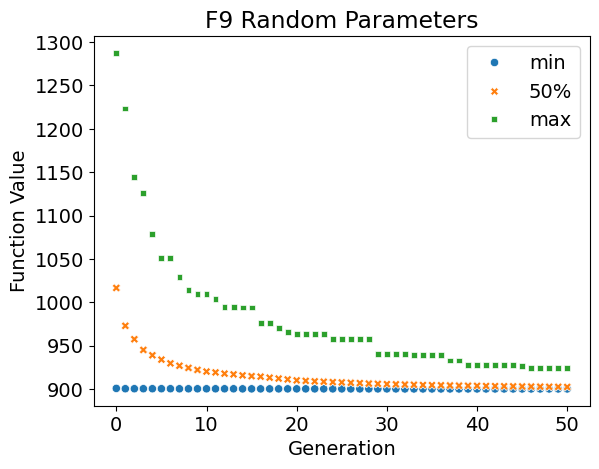

In [42]:
Plot_Min50Max(RandomParameters,Scale)

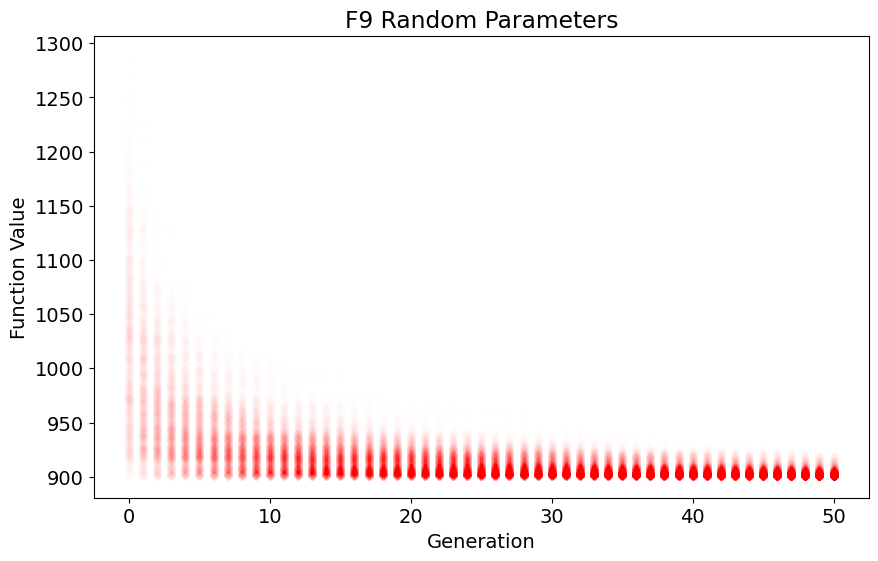

In [43]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [44]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

# Function 26

In [127]:
NumberFunction = '26'
Scale = 'linear'

## Function Plot

In [128]:
ObjectiveFunction = cec_based.__dict__[f'F{NumberFunction}2017']

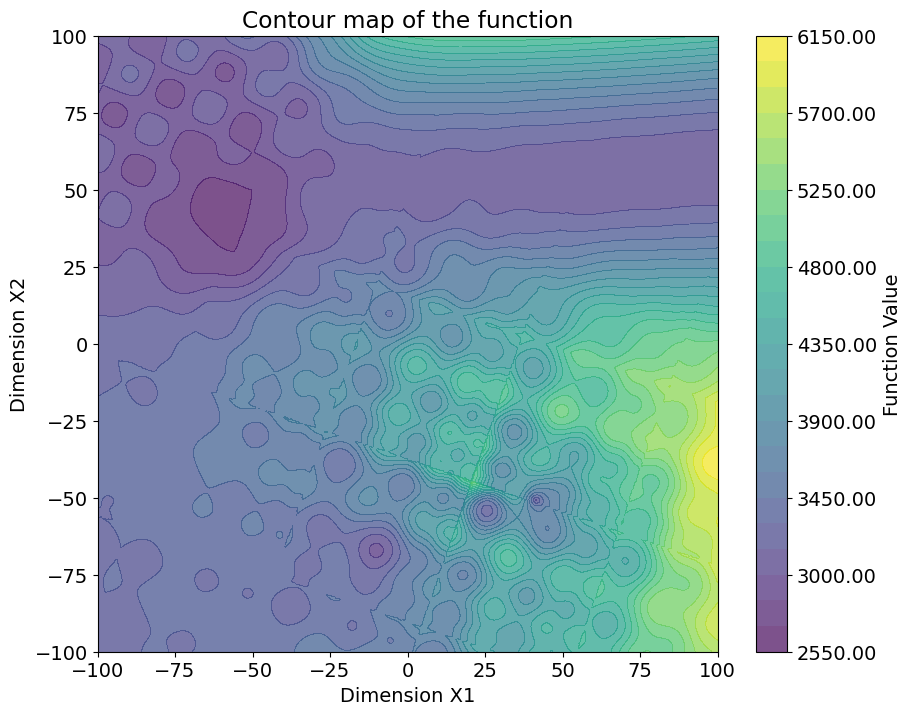

In [129]:
ObjectiveFunction(ndim=2).plot_2d(500)

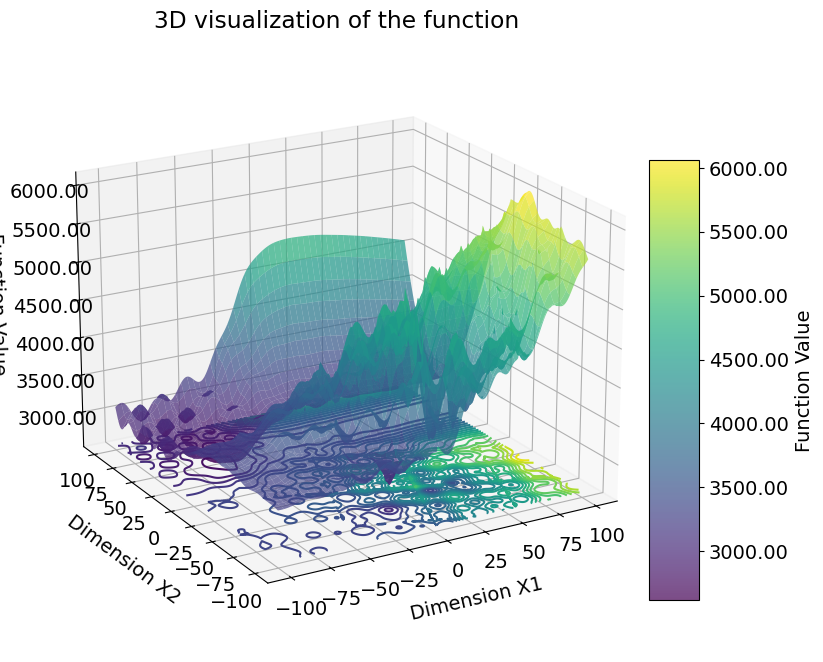

In [130]:
ObjectiveFunction(ndim=2).plot_3d(500)

## Base

In [131]:
Base = pd.read_csv(f'./Dim_2/Base/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Base.__name__ = f'F{NumberFunction} Base'
Base.head(10)

0            1            2            3            4   \
0  2644.931204  2644.931204  2644.931204  2644.931204  2631.216824   
1  2622.019261  2622.019261  2622.019261  2622.019261  2622.019261   
2  2623.681939  2623.681939  2622.135703  2622.135703  2622.135703   
3  2647.985597  2647.985597  2647.985597  2647.985597  2647.985597   
4  2717.164053  2717.164053  2640.145912  2640.145912  2624.175130   
5  2750.337279  2691.638748  2691.638748  2656.919113  2656.919113   
6  2643.835375  2643.835375  2643.835375  2643.835375  2643.835375   
7  2637.205520  2637.205520  2637.205520  2637.205520  2615.167637   
8  2691.265550  2691.265550  2657.426879  2657.426879  2657.426879   
9  2714.186059  2714.186059  2714.186059  2607.553360  2607.553360   

            5            6            7            8            9   ...  \
0  2631.216824  2631.216824  2627.933495  2627.933495  2621.404893  ...   
1  2622.019261  2619.989016  2614.189569  2614.189569  2609.468626  ...   
2  2622.135703  2603.892823  2603.892823  2603.892823  2603.892823  ...   
3  2618.992751  2618.436966  2618.436966  2618.436966  2618.436966  ...   
4  2624.175130  2624.175130  2619.248575  2603.316190  2603.316190  ...   
5  2631.838977  2631.838977  2623.691045  2622.291864  2611.822656  ...   
6  2620.945130  2620.945130  2605.472446  2605.472446  2605.472446  ...   
7  2615.167637  2615.167637  2615.167637  2615.167637  2615.167637  ...   
8  2657.426879  2645.112782  2645.112782  2634.102081  2632.565963  ...   
9  2607.553360  2607.553360  2607.553360  2607.553360  2607.553360  ...   

            41           42           43           44           45  \
0  2600.088357  2600.088357  2600.087264  2600.087264  2600.087264   
1  2600.021865  2600.021865  2600.021865  2600.021865  2600.021865   
2  2600.038833  2600.038833  2600.038833  2600.038833  2600.038833   
3  2600.157854  2600.091253  2600.091253  2600.091253  2600.050646   
4  2600.094354  2600.094354  2600.094354  2600.089698  2600.059301   
5  2600.188530  2600.164567  2600.079296  2600.076608  2600.076608   
6  2600.038045  2600.038045  2600.038045  2600.038045  2600.038045   
7  2600.039956  2600.039956  2600.038069  2600.038069  2600.038069   
8  2600.039531  2600.039531  2600.039531  2600.039531  2600.039531   
9  2600.099294  2600.099294  2600.092416  2600.090641  2600.081725   

            46           47           48           49           50  
0  2600.087264  2600.026764  2600.026764  2600.026764  2600.026764  
1  2600.021865  2600.021500  2600.021500  2600.021500  2600.021500  
2  2600.038833  2600.038833  2600.038833  2600.038833  2600.017302  
3  2600.050646  2600.050646  2600.050646  2600.050646  2600.050646  
4  2600.059301  2600.059301  2600.037493  2600.037493  2600.009699  
5  2600.054148  2600.054148  2600.054148  2600.015632  2600.015632  
6  2600.038045  2600.038045  2600.038045  2600.038045  2600.038045  
7  2600.027342  2600.027342  2600.027342  2600.027342  2600.027342  
8  2600.039531  2600.039531  2600.039531  2600.039531  2600.039531  
9  2600.081725  2600.062764  2600.062764  2600.036036  2600.036036  

[10 rows x 51 columns]

In [132]:
Base.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2695.165031  2666.594438  2650.055231  2638.099599  2630.299950   
std      56.151966    41.000640    30.707158    23.464207    18.309860   
min    2603.668013  2603.668013  2603.646754  2601.361546  2601.361546   
25%    2651.137207  2633.827218  2625.335488  2620.877857  2617.577334   
50%    2688.618089  2658.913219  2643.532201  2632.784336  2626.115972   
75%    2733.816932  2692.985097  2668.710326  2650.578221  2638.194659   
max    2898.335546  2877.059093  2765.859277  2732.427552  2707.190273   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean   2624.486073  2619.837672  2616.331239  2613.632523  2611.411299  ...   
std      14.388151    11.169776     8.280083     6.833044     5.323007  ...   
min    2600.832496  2600.832496  2600.832496  2600.832496  2600.832496  ...   
25%    2614.359377  2612.028929  2610.502913  2608.834849  2607.587183  ...   
50%    2621.695730  2617.780304  2615.040211  2612.482624  2610.704558  ...   
75%    2630.729183  2625.057801  2620.789523  2616.923624  2614.370131  ...   
max    2693.732856  2691.306226  2667.762198  2667.762198  2639.471377  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2600.085433  2600.076559  2600.068006  2600.061485  2600.055765   
std       0.037255     0.033276     0.030052     0.027111     0.024382   
min    2600.005293  2600.005293  2600.005293  2600.005293  2600.005293   
25%    2600.058358  2600.052055  2600.046026  2600.042081  2600.038656   
50%    2600.081733  2600.073193  2600.065078  2600.058095  2600.052949   
75%    2600.107136  2600.096100  2600.086391  2600.077097  2600.069434   
max    2600.286737  2600.215702  2600.205006  2600.190547  2600.153796   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean   2600.050339  2600.045768  2600.041221  2600.037149  2600.033887  
std       0.021644     0.019936     0.017778     0.015802     0.014250  
min    2600.005293  2600.005293  2600.003036  2600.003036  2600.003036  
25%    2600.035126  2600.031547  2600.028875  2600.026074  2600.023545  
50%    2600.046888  2600.042761  2600.038734  2600.035505  2600.032363  
75%    2600.063357  2600.057866  2600.051479  2600.046316  2600.041890  
max    2600.135292  2600.135292  2600.112899  2600.112078  2600.099365  

[8 rows x 51 columns]

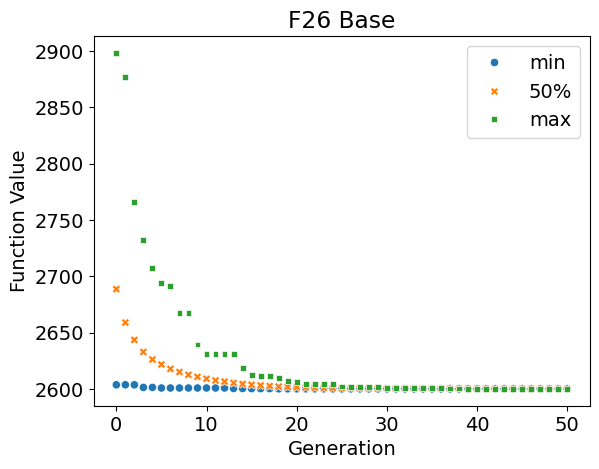

In [133]:
Plot_Min50Max(Base,Scale)

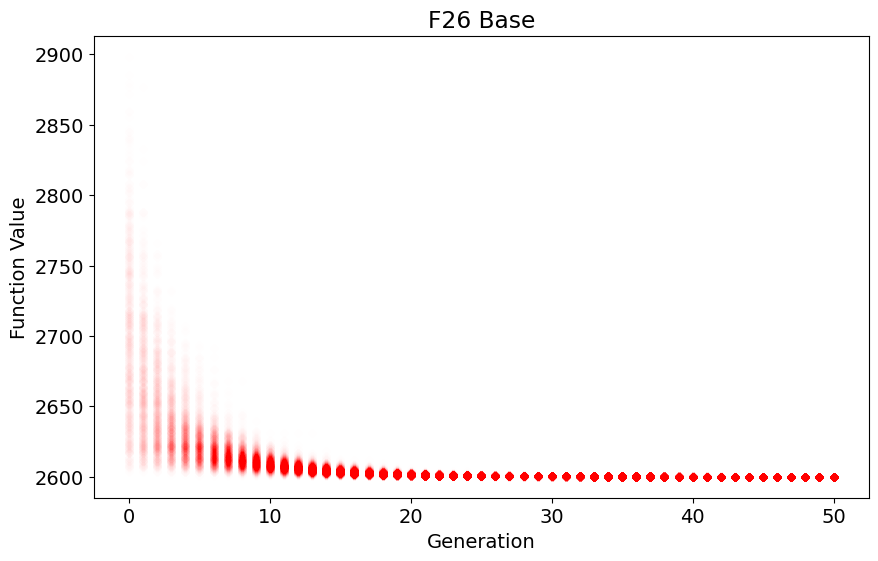

In [134]:
Plot_Generation_FunctionValues(Base,Scale)

In [135]:
InteractivePlot(Base,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…

## Random Sample

In [146]:
RandomSample = pd.read_csv(f'./Dim_2/RandomSample/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomSample.__name__ = f'F{NumberFunction} Random Sample'
RandomSample.head(10)

0            1            2            3            4    \
0  2691.572068  2686.062410  2686.062410  2661.827150  2647.872960   
1  2683.341675  2614.002439  2614.002439  2614.002439  2614.002439   
2  2610.553686  2610.553686  2610.553686  2610.553686  2610.553686   
3  2646.443014  2646.443014  2646.443014  2618.119384  2618.119384   
4  2774.123935  2712.030034  2704.231096  2616.448371  2604.435141   
5  2743.178975  2629.541949  2629.541949  2629.541949  2629.541949   
6  2732.637165  2729.254352  2638.119392  2638.119392  2614.554112   
7  2612.263750  2612.263750  2612.263750  2612.263750  2612.263750   
8  2610.092691  2610.092691  2610.092691  2610.092691  2610.092691   
9  2792.665160  2760.219221  2754.993830  2647.180509  2647.180509   

           5            6            7            8            9    ...  125  \
0  2611.856878  2611.856878  2611.856878  2611.856878  2611.856878  ...  NaN   
1  2614.002439  2614.002439  2614.002439  2614.002439  2614.002439  ...  NaN   
2  2610.553686  2610.553686  2610.553686  2609.811028  2609.811028  ...  NaN   
3  2618.119384  2618.119384  2618.119384  2618.119384  2607.845310  ...  NaN   
4  2604.435141  2604.435141  2604.435141  2604.435141  2604.435141  ...  NaN   
5  2611.310394  2611.310394  2605.686805  2605.686805  2605.686805  ...  NaN   
6  2614.554112  2614.554112  2614.554112  2614.554112  2609.286106  ...  NaN   
7  2612.263750  2612.263750  2612.263750  2612.263750  2612.263750  ...  NaN   
8  2610.092691  2610.092691  2610.092691  2606.040406  2601.977960  ...  NaN   
9  2627.017405  2622.498953  2622.498953  2617.873050  2610.815488  ...  NaN   

   126  127  128  129  130  131  132  133  134  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 135 columns]

In [147]:
RandomSample.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2696.508354  2668.578870  2650.874348  2639.105102  2630.347832   
std      54.362498    40.477409    30.670939    24.801195    18.609573   
min    2605.066471  2603.979802  2603.979802  2603.910467  2603.623671   
25%    2654.318617  2635.853782  2627.100194  2620.308181  2616.957395   
50%    2690.774702  2662.364655  2644.456012  2633.183764  2625.470037   
75%    2728.240001  2694.727139  2668.947637  2651.519508  2639.089623   
max    2976.291896  2826.074811  2782.705610  2745.220561  2724.319186   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean   2624.524441  2620.044911  2616.281576  2613.547973  2611.281024  ...   
std      14.156169    10.645163     8.324577     6.992653     5.439602  ...   
min    2602.205442  2602.205442  2601.304375  2601.304375  2601.304375  ...   
25%    2614.560700  2612.260640  2610.381754  2608.827472  2607.793302  ...   
50%    2621.126197  2618.020502  2614.822654  2612.235082  2610.588348  ...   
75%    2630.929653  2624.914277  2620.378012  2617.177262  2614.041040  ...   
max    2698.602151  2673.685383  2657.265819  2657.265819  2654.249502  ...   

               125          126          127          128          129  \
count    28.000000    10.000000    10.000000    10.000000    10.000000   
mean   2600.000070  2600.000060  2600.000056  2600.000054  2600.000052   
std       0.000057     0.000028     0.000030     0.000032     0.000033   
min    2600.000005  2600.000016  2600.000016  2600.000005  2600.000005   
25%    2600.000042  2600.000049  2600.000043  2600.000041  2600.000033   
50%    2600.000053  2600.000053  2600.000049  2600.000049  2600.000044   
75%    2600.000074  2600.000070  2600.000067  2600.000067  2600.000067   
max    2600.000312  2600.000123  2600.000123  2600.000123  2600.000123   

               130          131          132          133          134  
count    10.000000     3.000000     3.000000     3.000000     3.000000  
mean   2600.000052  2600.000045  2600.000045  2600.000043  2600.000039  
std       0.000033     0.000012     0.000012     0.000012     0.000017  
min    2600.000005  2600.000033  2600.000033  2600.000033  2600.000022  
25%    2600.000033  2600.000040  2600.000040  2600.000036  2600.000031  
50%    2600.000044  2600.000047  2600.000047  2600.000040  2600.000040  
75%    2600.000067  2600.000051  2600.000051  2600.000048  2600.000048  
max    2600.000123  2600.000056  2600.000056  2600.000056  2600.000056  

[8 rows x 135 columns]

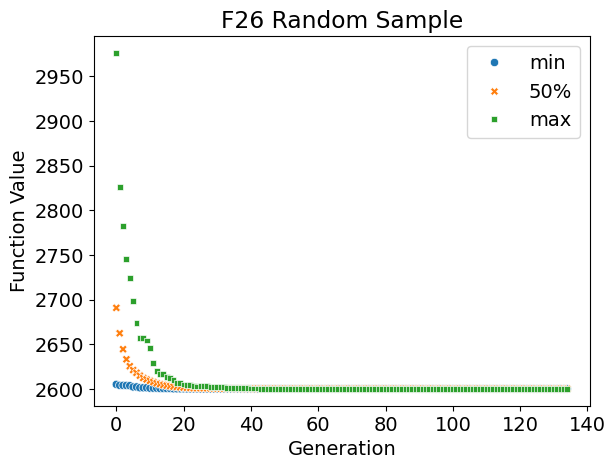

In [148]:
Plot_Min50Max(RandomSample,Scale)

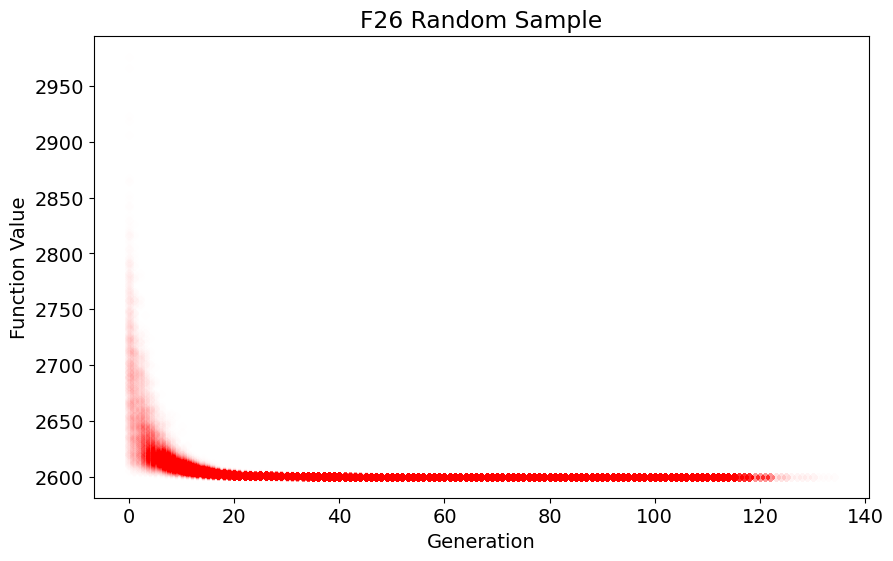

In [149]:
Plot_Generation_FunctionValues(RandomSample,Scale)

In [150]:
InteractivePlot(RandomSample,Scale)

interactive(children=(IntSlider(value=67, description='generation', max=134), Output()), _dom_classes=('widget…

## Agglomerative

In [141]:
Agglomerative = pd.read_csv(f'./Dim_2/Agglomerative/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
Agglomerative.__name__ = f'F{NumberFunction} Agglomerative'
Agglomerative.head(10)

0            1            2            3            4    \
0  2699.173076  2662.150149  2656.449038  2656.449038  2642.497142   
1  2806.434281  2719.809706  2607.345437  2607.345437  2607.345437   
2  2724.860139  2679.433729  2640.765881  2640.765881  2640.765881   
3  2634.253601  2629.783968  2629.783968  2629.004704  2618.357820   
4  2736.306691  2694.737663  2661.110671  2653.764801  2653.764801   
5  2725.244298  2700.313621  2671.276934  2637.974552  2626.822891   
6  2641.022479  2641.022479  2627.015535  2627.015535  2627.015535   
7  2675.379276  2641.245685  2641.245685  2627.765203  2627.765203   
8  2658.342244  2631.584821  2625.510946  2621.623271  2621.623271   
9  2716.104410  2637.371957  2628.158176  2623.639331  2623.639331   

           5            6            7            8            9    ...  \
0  2642.497142  2614.899324  2614.899324  2609.651376  2609.651376  ...   
1  2607.345437  2606.464914  2606.464914  2606.464914  2606.464914  ...   
2  2640.765881  2610.889437  2610.889437  2610.889437  2610.556064  ...   
3  2618.357820  2618.357820  2609.781803  2609.726760  2609.726760  ...   
4  2609.175540  2609.175540  2609.175540  2609.175540  2609.175540  ...   
5  2626.822891  2626.822891  2607.549288  2607.549288  2607.549288  ...   
6  2627.015535  2609.104715  2609.104715  2609.104715  2609.104715  ...   
7  2621.838063  2621.838063  2621.838063  2621.838063  2621.838063  ...   
8  2618.314668  2618.314668  2618.314668  2617.716319  2617.716319  ...   
9  2612.430314  2612.430314  2610.039479  2610.039479  2610.039479  ...   

           184          185          186          187          188  \
0  2600.000001  2600.000001  2600.000001  2600.000001  2600.000000   
1  2600.000001  2600.000001  2600.000001  2600.000000  2600.000000   
2  2600.000002  2600.000001  2600.000001  2600.000001  2600.000001   
3  2600.000002  2600.000001  2600.000001  2600.000001  2600.000001   
4  2600.000001  2600.000001  2600.000001  2600.000001  2600.000001   
5  2600.000028  2600.000028  2600.000026  2600.000026  2600.000026   
6  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
7  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
8  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
9  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   

           189          190          191          192          193  
0  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
1  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
2  2600.000001  2600.000001  2600.000001  2600.000001  2600.000001  
3  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
4  2600.000001  2600.000001  2600.000001  2600.000001  2600.000001  
5  2600.000026  2600.000025  2600.000025  2600.000025  2600.000025  
6  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
7  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
8  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
9  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  

[10 rows x 194 columns]

In [142]:
Agglomerative.describe()

0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2696.494068  2668.572057  2650.400455  2638.841047  2630.582842   
std      55.284794    41.288794    30.997664    23.707972    18.231530   
min    2604.525124  2604.166165  2601.904961  2601.904961  2601.904961   
25%    2651.914827  2635.855375  2627.015142  2621.522921  2617.580860   
50%    2688.701315  2659.565233  2643.503355  2632.928723  2626.579688   
75%    2732.449114  2694.315191  2668.070678  2651.869223  2638.784863   
max    2908.376316  2842.429864  2787.033800  2726.062483  2709.022318   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean   2625.021945  2619.866348  2616.310529  2613.451831  2611.261333  ...   
std      14.657838    11.306969     8.689344     6.474200     5.068512  ...   
min    2601.904961  2601.358023  2601.358023  2601.242777  2601.242777  ...   
25%    2614.478342  2612.432212  2610.261601  2609.101341  2607.771186  ...   
50%    2621.958554  2617.831508  2615.068128  2612.625168  2610.726113  ...   
75%    2631.413443  2624.864051  2620.644133  2616.850977  2613.891846  ...   
max    2707.749580  2698.453975  2684.694910  2662.841421  2639.534083  ...   

               184          185          186          187          188  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2600.000009  2600.000009  2600.000009  2600.000009  2600.000009   
std       0.000051     0.000051     0.000051     0.000050     0.000050   
min    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
25%    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
50%    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
75%    2600.000001  2600.000001  2600.000001  2600.000001  2600.000001   
max    2600.000779  2600.000779  2600.000777  2600.000777  2600.000776   

               189          190          191          192          193  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean   2600.000009  2600.000009  2600.000009  2600.000008  2600.000008  
std       0.000049     0.000049     0.000049     0.000049     0.000049  
min    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
25%    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
50%    2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  
75%    2600.000001  2600.000001  2600.000001  2600.000000  2600.000000  
max    2600.000775  2600.000775  2600.000775  2600.000775  2600.000775  

[8 rows x 194 columns]

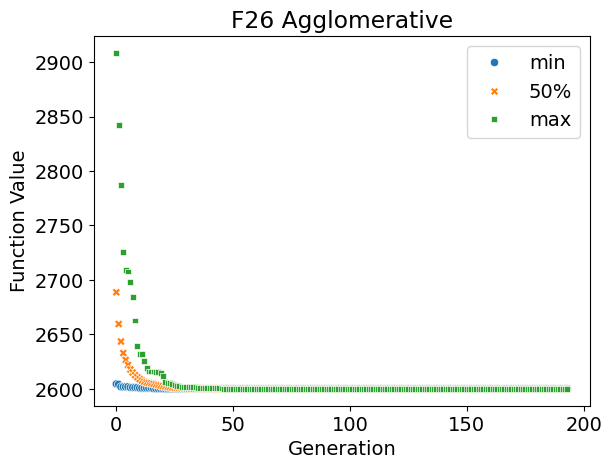

In [143]:
Plot_Min50Max(Agglomerative,Scale)

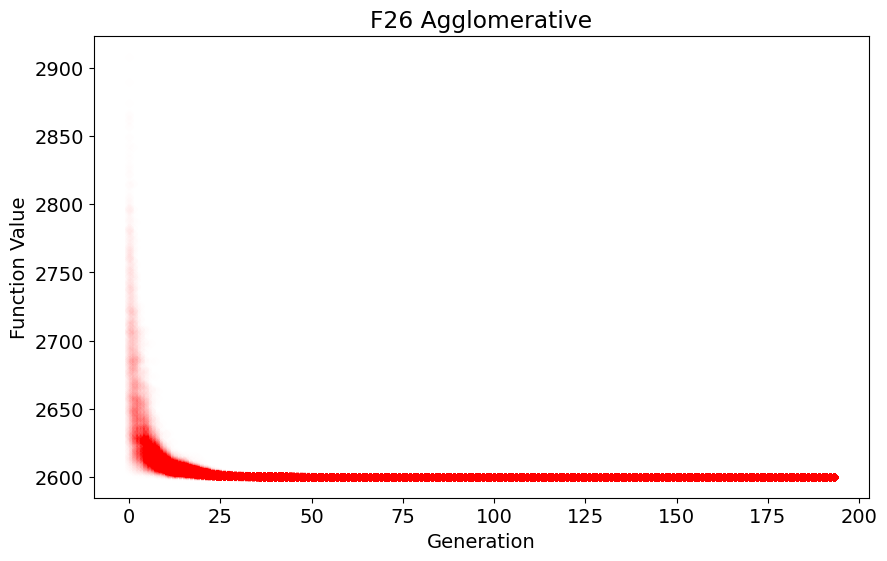

In [144]:
Plot_Generation_FunctionValues(Agglomerative,Scale)

In [145]:
InteractivePlot(Agglomerative,Scale)

interactive(children=(IntSlider(value=96, description='generation', max=193), Output()), _dom_classes=('widget…

## Random Parameters

In [136]:
RandomParameters = pd.read_csv(f'./Dim_2/RandomParameters/Optimals_F{NumberFunction}.csv',index_col=None,header=None)
RandomParameters.__name__ = f'F{NumberFunction} Random Parameters'
RandomParameters.head(10)

0            1            2            3            4   \
0  2693.272990  2616.951897  2616.951897  2616.951897  2616.951897   
1  2624.258869  2617.144494  2617.144494  2611.791705  2611.791705   
2  2695.511585  2695.511585  2666.148662  2666.148662  2631.702303   
3  2900.542537  2751.011287  2631.320963  2621.386973  2621.386973   
4  2620.144727  2620.144727  2620.144727  2620.144727  2620.144727   
5  2710.481200  2632.682780  2632.682780  2632.682780  2632.682780   
6  2849.818807  2686.833856  2643.254868  2635.495298  2611.652760   
7  2643.890597  2629.282427  2629.282427  2629.282427  2626.557680   
8  2654.245577  2654.245577  2654.245577  2654.245577  2647.274703   
9  2768.810289  2677.680268  2637.692438  2616.766491  2616.766491   

            5            6            7            8            9   ...  \
0  2616.951897  2616.951897  2616.951897  2615.475644  2607.393197  ...   
1  2611.791705  2611.453156  2611.453156  2611.453156  2611.453156  ...   
2  2608.217316  2608.217316  2608.217316  2607.857219  2607.857219  ...   
3  2621.386973  2621.386973  2616.462318  2616.462318  2616.462318  ...   
4  2620.144727  2620.144727  2620.144727  2620.144727  2609.264159  ...   
5  2616.738414  2616.738414  2616.738414  2616.738414  2610.746228  ...   
6  2611.652760  2611.652760  2610.505832  2610.505832  2610.505832  ...   
7  2626.557680  2607.321268  2607.321268  2607.321268  2607.321268  ...   
8  2634.103553  2608.206050  2608.206050  2608.206050  2608.206050  ...   
9  2611.566701  2611.566701  2611.566701  2606.789169  2606.789169  ...   

            41           42           43           44           45  \
0  2600.119955  2600.113015  2600.113015  2600.113015  2600.108870   
1  2600.118729  2600.118729  2600.118729  2600.118729  2600.115044   
2  2600.030636  2600.030636  2600.030636  2600.030636  2600.030636   
3  2600.087476  2600.087476  2600.087476  2600.087476  2600.070749   
4  2600.092040  2600.092040  2600.092040  2600.092040  2600.052028   
5  2600.062024  2600.062024  2600.062024  2600.062024  2600.062024   
6  2600.132049  2600.132049  2600.132049  2600.073491  2600.037358   
7  2600.113588  2600.113588  2600.113588  2600.113588  2600.070386   
8  2600.034956  2600.034956  2600.034956  2600.034956  2600.034956   
9  2600.105825  2600.085400  2600.007818  2600.007818  2600.007818   

            46           47           48           49           50  
0  2600.077104  2600.038318  2600.030958  2600.030958  2600.030958  
1  2600.065729  2600.065729  2600.017954  2600.017954  2600.017954  
2  2600.030636  2600.030636  2600.030636  2600.030636  2600.030636  
3  2600.040211  2600.040211  2600.040211  2600.008611  2600.008611  
4  2600.052028  2600.014137  2600.014137  2600.014137  2600.014137  
5  2600.062024  2600.062024  2600.062024  2600.053170  2600.053170  
6  2600.037358  2600.037358  2600.037358  2600.037059  2600.037059  
7  2600.070386  2600.070386  2600.046201  2600.046201  2600.046201  
8  2600.034956  2600.034956  2600.034956  2600.014305  2600.014305  
9  2600.007818  2600.007818  2600.007818  2600.007818  2600.007818  

[10 rows x 51 columns]

In [137]:
RandomParameters.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2693.260020  2666.788594  2648.999059  2637.922073  2630.195262   
std      54.226138    41.500074    30.547058    23.655780    18.623086   
min    2601.497557  2601.497557  2601.497557  2601.497557  2601.497557   
25%    2648.068068  2633.707758  2625.146406  2620.335881  2616.922110   
50%    2687.265065  2659.003647  2642.967038  2632.558634  2625.935172   
75%    2729.416965  2692.607365  2665.304717  2649.684429  2638.150127   
max    2900.542537  2868.838918  2786.611383  2739.205076  2735.576644   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean   2623.693068  2619.124645  2615.943783  2613.423894  2611.273411  ...   
std      13.863227    10.552321     8.220525     6.694038     5.423396  ...   
min    2601.497557  2601.497557  2601.495215  2600.903353  2600.903353  ...   
25%    2614.371089  2612.157628  2610.138975  2608.801442  2607.625473  ...   
50%    2620.493861  2617.177481  2614.713781  2612.450774  2610.425271  ...   
75%    2630.144738  2624.158429  2619.913948  2616.891305  2614.278386  ...   
max    2719.502642  2689.540057  2660.876141  2648.937435  2648.132349  ...   

                41           42           43           44           45  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2600.083673  2600.075214  2600.067551  2600.060492  2600.054431   
std       0.034861     0.031724     0.028325     0.025584     0.023156   
min    2600.011773  2600.004550  2600.004550  2600.004473  2600.004473   
25%    2600.058044  2600.052533  2600.046976  2600.041722  2600.037750   
50%    2600.080761  2600.072790  2600.064790  2600.058494  2600.052724   
75%    2600.104684  2600.093521  2600.085157  2600.075278  2600.068612   
max    2600.273374  2600.212517  2600.185334  2600.160131  2600.160131   

                46           47           48           49           50  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean   2600.048743  2600.044442  2600.039611  2600.035917  2600.032480  
std       0.020213     0.018436     0.016720     0.015273     0.013951  
min    2600.004473  2600.004473  2600.002809  2600.002809  2600.002809  
25%    2600.034339  2600.030774  2600.027523  2600.025128  2600.022050  
50%    2600.047128  2600.042663  2600.038072  2600.034697  2600.030924  
75%    2600.062084  2600.056361  2600.050585  2600.045557  2600.040693  
max    2600.127671  2600.114969  2600.107328  2600.107328  2600.088707  

[8 rows x 51 columns]

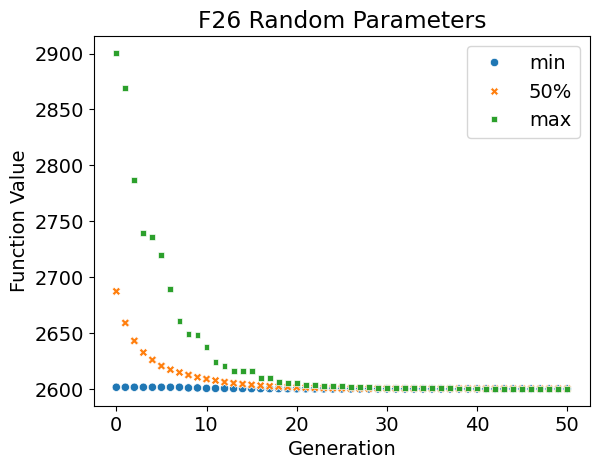

In [138]:
Plot_Min50Max(RandomParameters,Scale)

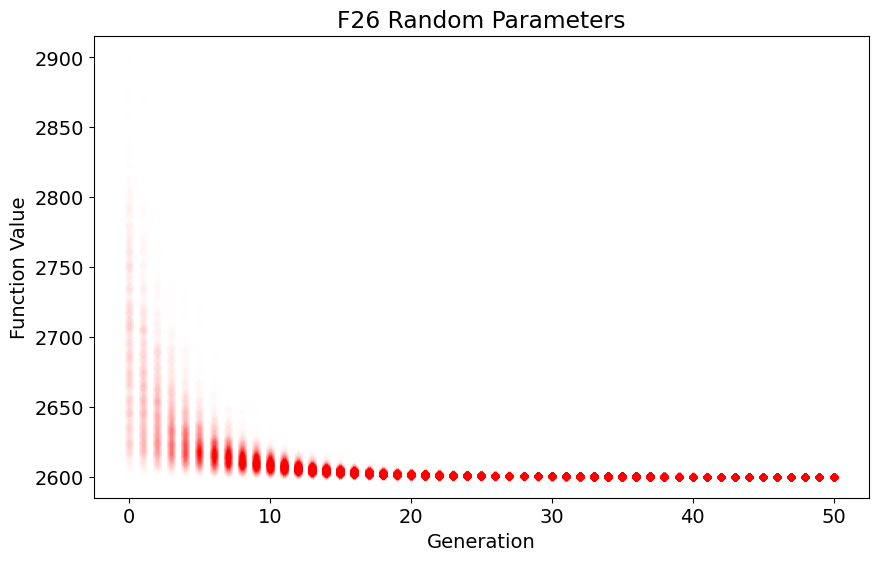

In [139]:
Plot_Generation_FunctionValues(RandomParameters,Scale)

In [140]:
InteractivePlot(RandomParameters,Scale)

interactive(children=(IntSlider(value=25, description='generation', max=50), Output()), _dom_classes=('widget-…